# Fantasy Premier League - Moneyball project

## Context
Fantasy Premier League is well-known online game were each week managers try to pick the best team from players in the English Premier League. Points are attributed to players based on their actuel performance on the pitch.

## Objectives
* Identify key statistics and metrics behind FPL
* Predict weekly game points of each players
* Pick best team (maximum points) per game weeks

## Index <a name='top'/> 

1. **<a href=#import_data> Import data <a>**
2. **<a href=#eda> EDA and data cleaning <a>**
    * <a href=#eda_manager> API: Manager History (myself) <a>
    * <a href=#eda_general> API: General Information <a>
        * <a href=#eda_teams> Teams <a> *(e.g.: Arsenal)*
        * <a href=#eda_elements> Elements <a> *(e.g.: Salah)*
            * Players with most goals, assists or bonus points?
            * Players with most dream team selection or minutes played?
            * Players with most points per cost or best transfer delta?
        * <a href=#eda_elements_types> Element types <a> *(e.g.: Middfielder)*
        * <a href=#eda_events> Events <a> *(e.g.: Gameweek 38)*
            * When are each chips played the most? When do most transfers happen?
            * What players has been the most captained or top scorer?
    * <a href=#eda_fixtures> API: Fixtures <a> *(e.g.: Game 4 -> ARS vs. MUC)*
        * How many games per gameweek (double, triple gameweeks)?
    * <a href=#eda_players> API: Players <a> *('Future Fixtures',<a href=#eda_players_past_fix> 'Past Fixtures' <a>,<a href=#eda_players_past_season> 'Past Seasons' <a>)*
        * Players with most FPL feasons or total points?
    * <a href=#eda_lp> Linear Programming <a>
        * How much points would I have reached picking team based on previous season?
        * Which team shall I have picked (without transfers)? Where would I rank?
    * <a href=#eda_corr> Correlations and key features <a>
3. **<a href=#data_prep> Data preparation <a>**
    * <a href=#data_prep_eng> Feature engineering <a>
    * <a href=#data_prep_enc> Feature encoding <a>
    * <a href=#data_prep_base> Baseline (all players) <a>
4. **<a href=#model> Modelling ('21/22 season) <a>**
    * <a href=#model_mid> Midfielders <a>
        * <a href=#model_mid_lr> LinearRegression <a>
        * <a href=#model_mid_knn> KNN Regressor <a>
        * <a href=#model_mid_rf> RandomForest <a>
    * <a href=#model_def> Defenders <a>
    * <a href=#model_fwd> Forwards <a>
    * <a href=#model_gkp> Goalkeepers <a>
5. **<a href=#pred> Predictions '22/23 season 1st Half <a>**
    * <a href=#pred_data> Import and clean data <a>
    * <a href=#pred_lp> Linear Programming based on previous season <a>
    * <a href=#pred_feature> Feature engineering and data preparation <a>
    * <a href=#pred_rounds> Predict points for each rounds <a>
        * Rounds 4 to 16: 
            * Predict points for each positions *(Defenders, Midfielders, Forwards and Goalkeepers)*
            * <a href=#pred_r_lp> Linear programming <a> to identify best 11 players teams
        * Rounds 1 to 3: based on 11 players select as per previous season
    * <a href=#pred_final> Final results <a>(worst than expected!)
6. **<a href=#annex> Annex** <a> *(Notes, Dictionary, Ressources)*
***
***

## 1) Import Data <a name='import_data'/>
<a href=#top> Back to top <a>

In [382]:
# import necessary packages
import pandas as pd
import numpy as np
import json
import requests
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

***
***
## 2) Exploratory data analysis of API end-points <a name='eda'/>
<a href=#top> Back to top <a>

In [383]:
# Define a function to get info from the FPL API and save to the specified file_path
# Navigate to the link in a browser to get an idea of what the data looks like
def get_json(file_path):
    #r = requests.get('https://fantasy.premierleague.com/api/entry/4292129/history/')
    r = requests.get(file)
    jsonResponse = r.json()
    with open(file_path, 'w') as outfile: 
        json.dump(jsonResponse, outfile)

### MANAGER HISTORY - 'entry/team_id/history' <a name='eda_manager'/>
<a href=#top> Back to top <a>
* Greg (myself): a quick view of my poor performances over the last seasons, and the reason for this work :) 

In [3]:
# Run the function and choose where to save the json file
file_url = 'https://fantasy.premierleague.com/api/entry/4949131/history/'
path_url = r'C:\Users\glaurent\OneDrive - Expedia Group\Desktop\EPFL ML\fpl_moneyball_greg_history'
# pages = np.arange(1,8)

In [4]:
file = file_url
print(file)
get_json(path_url + ".json'")
print(path_url + ".json")

https://fantasy.premierleague.com/api/entry/4949131/history/
C:\Users\glaurent\OneDrive - Expedia Group\Desktop\EPFL ML\fpl_moneyball_greg_history.json


In [5]:
with open(path_url + ".json'") as json_data:
            d = json.load(json_data)
            # print(list(d.keys()))
            df = json_normalize(d['past'])
            df_past = df

In [6]:
df_past.sort_values(by='season_name', ascending=False)

,season_name,total_points,rank
8,2021/22,1990,2881751
7,2020/21,1365,7126388
6,2019/20,2104,881316
5,2018/19,2012,1734814
4,2017/18,2115,414621
3,2016/17,1833,1606440
2,2015/16,1987,717989
1,2013/14,2086,697588
0,2012/13,1565,1915083


### GENERAL INFORMATION - *'bootstrap-static'* <a name='eda_general'/>
<a href=#top> Back to top <a>
    
Includes all general information about teams, players and gameweeks. For more details need to check other end-points (e.g.: 'fixtures' and 'players') descirbed further down.
* Teams
* Elements
* Element types
* Events

In [7]:
# Run the function and choose where to save the json file
# file = 'https://fantasy.premierleague.com/api/entry/4292129/history/'
file_url = "https://fantasy.premierleague.com/api/bootstrap-static/"
path_url = r'C:\Users\glaurent\OneDrive - Expedia Group\Desktop\EPFL ML\fpl_moneyball_general_info'
# pages = np.arange(1,8)

In [8]:
# only run when importing data / don't run anymore now that 2021/2022 season is over
# file = file_url
# print(file)
# get_json(path_url + ".json'")
# print(path_url + ".json")

#### Teams <a name='eda_teams'/>
<a href=#top> Back to top <a>

In [9]:
with open(path_url + ".json'") as json_data:
            d = json.load(json_data)
            #print(list(d.keys()))
            df = json_normalize(d['teams'])
            df_teams = df

In [10]:
df_teams.shape

(20, 21)

In [11]:
df_teams.head(5)

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1250,1270,1150,1210,1190,1220,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1100,1100,1140,1110,1090,1090,2
2,94,0,None,3,0,Brentford,0,0,0,BRE,2,None,False,0,1060,1070,1120,1150,1080,1120,130
3,36,0,None,4,0,Brighton,0,0,0,BHA,3,None,False,0,1100,1090,1160,1160,1100,1120,131
4,90,0,None,5,0,Burnley,0,0,0,BUR,2,None,False,0,1060,1060,1080,1130,1060,1100,43


In [12]:
df_teams.dtypes

code                      int64
draw                      int64
form                     object
id                        int64
loss                      int64
name                     object
played                    int64
points                    int64
position                  int64
short_name               object
strength                  int64
team_division            object
unavailable                bool
win                       int64
strength_overall_home     int64
strength_overall_away     int64
strength_attack_home      int64
strength_attack_away      int64
strength_defence_home     int64
strength_defence_away     int64
pulse_id                  int64
dtype: object

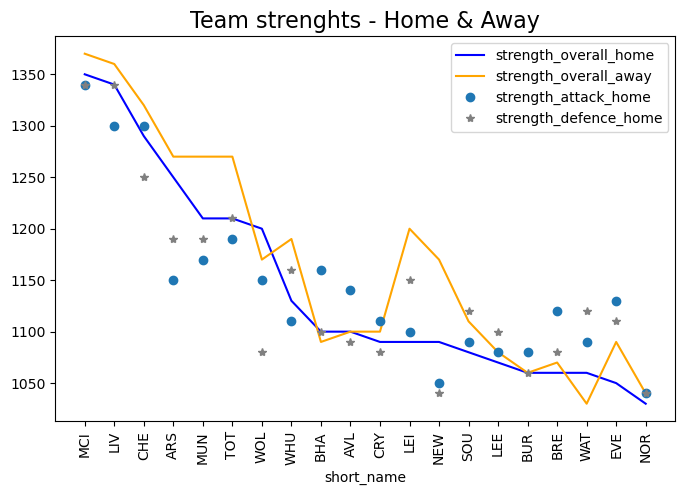

In [13]:
plt.figure(figsize=(8,5))
df_teams.set_index('short_name').sort_values(by='strength_overall_home', ascending=False)['strength_overall_home'].plot(kind='line', color='blue')
df_teams.set_index('short_name').sort_values(by='strength_overall_home', ascending=False)['strength_overall_away'].plot(kind='line', color='orange')
df_teams.set_index('short_name').sort_values(by='strength_overall_home', ascending=False)['strength_attack_home'].plot(kind='line', style='o')
# df_teams.set_index('short_name').sort_values(by='strength_overall_home', ascending=False)['strength_attack_away'].plot(kind='line', style='o')
df_teams.set_index('short_name').sort_values(by='strength_overall_home', ascending=False)['strength_defence_home'].plot(kind='line', style='*', color='grey')
# df_teams.set_index('short_name').sort_values(by='strength_overall_home', ascending=False)['strength_defence_away'].plot(kind='line', style='*', color='orange')
plt.xticks(ticks=np.arange(0,20), labels=df_teams.sort_values(by='strength_overall_home', ascending=False)['short_name'], rotation=90)
plt.xlim(-1,20)
plt.title('Team strenghts - Home & Away', size=16)
plt.legend()
plt.show()

#### Elements <a name='eda_elements'/>
<a href=#top> Back to top <a>

In [14]:
with open(path_url + ".json'") as json_data:
            d = json.load(json_data)
            #print(list(d.keys()))
            df = json_normalize(d['elements'])
            df_elements = df

In [15]:
df_elements.shape

(737, 67)

In [17]:
df_elements.dtypes

chance_of_playing_next_round            float64
chance_of_playing_this_round            float64
code                                      int64
cost_change_event                         int64
cost_change_event_fall                    int64
cost_change_start                         int64
cost_change_start_fall                    int64
dreamteam_count                           int64
element_type                              int64
ep_next                                  object
ep_this                                  object
event_points                              int64
first_name                               object
form                                     object
id                                        int64
in_dreamteam                               bool
news                                     object
news_added                               object
now_cost                                  int64
photo                                    object
points_per_game                         

In [18]:
# update data type
df_elements['creativity'] = df_elements['creativity'].astype(float)
df_elements['form'] = df_elements['form'].astype(float)
df_elements['ict_index'] = df_elements['ict_index'].astype(float)
df_elements['influence'] = df_elements['influence'].astype(float)
df_elements['selected_by_percent'] = df_elements['selected_by_percent'].astype(float)
df_elements['threat'] = df_elements['threat'].astype(float)
df_elements['value_form'] = df_elements['value_form'].astype(float)
df_elements['value_season'] = df_elements['value_season'].astype(float)

In [384]:
# create new column with easier to read/interpret features
df_elements['element_type_name'] = df_elements['element_type'].replace({1:'GKP',2:'DEF',3:'MID',4:'FWD'})
df_elements['team_name'] = df_elements['team']
for t in np.arange(1,21):
    df_elements['team_name'].replace(to_replace=(df_teams[['id','short_name']].to_dict()['id'][t-1]), value=(df_teams[['id','short_name']].to_dict()['short_name'][t-1]), inplace=True)

In [385]:
# adding new features
df_elements['pts_per_minute'] = round(df_elements['total_points'] / df_elements['minutes'],4)
df_elements['cost_start'] = df_elements['now_cost'] - df_elements['cost_change_start']
df_elements['pts_per_cost_start'] = round(df_elements['total_points'] / df_elements['cost_start'],4)
df_elements['transfer_delta'] = df_elements['transfers_in'] - df_elements['transfers_out']

In [386]:
df_elements.sort_values(by='cost_change_start', ascending=False)[['assists','bonus','bps','cost_change_start','web_name','goals_scored','now_cost','total_points']].head(5)

,assists,bonus,bps,cost_change_start,web_name,goals_scored,now_cost,total_points
415,11,27,829,12,Cancelo,1,72,201
584,10,27,819,12,Son,23,112,258
217,9,26,573,10,James,5,65,141
386,12,32,864,9,Alexander-Arnold,2,84,208
389,7,8,483,8,Jota,15,83,175


In [387]:
print('High correlation with total_points - all element_types together')
print('***')
round(df_elements.corr()['total_points'].sort_values(ascending=False),3).head(20)

High correlation with total_points - all element_types together
***


total_points           1.000
pts_per_cost_start     0.949
bps                    0.949
value_season           0.944
influence              0.942
ict_index              0.926
minutes                0.912
clean_sheets           0.912
bonus                  0.884
points_per_game        0.856
dreamteam_count        0.776
threat                 0.769
creativity             0.762
form                   0.748
goals_conceded         0.731
assists                0.727
goals_scored           0.722
selected_by_percent    0.720
transfers_in           0.717
ep_next                0.712
Name: total_points, dtype: float64

In [25]:
# player with the most goals
df_elements.sort_values(by='goals_scored', ascending=False)[['assists','bonus','bps','first_name','second_name','goals_scored','total_points','element_type_name']].head()

,assists,bonus,bps,first_name,second_name,goals_scored,total_points,element_type_name
382,14,29,756,Mohamed,Salah,23,265,MID
584,10,27,819,Heung-Min,Son,23,258,MID
466,3,29,608,Cristiano Ronaldo,dos Santos Aveiro,18,159,FWD
582,11,23,684,Harry,Kane,17,192,FWD
379,5,10,526,Sadio,Mané,16,183,MID


In [26]:
# player with the most assists
df_elements.sort_values(by='assists', ascending=False)[['assists','bonus','bps','first_name','second_name','total_points','element_type_name']].head()

,assists,bonus,bps,first_name,second_name,total_points,element_type_name
681,17,24,586,Jarrod,Bowen,206,MID
382,14,29,756,Mohamed,Salah,265,MID
386,12,32,864,Trent,Alexander-Arnold,208,DEF
317,12,10,377,Harvey,Barnes,137,MID
383,11,23,770,Andrew,Robertson,186,DEF


In [27]:
# player with highest bonus points
df_elements.sort_values(by='bonus', ascending=False)[['assists','bonus','bps','goals_scored','first_name','second_name','total_points','minutes','pts_per_minute','element_type_name']].head()

,assists,bonus,bps,goals_scored,first_name,second_name,total_points,minutes,pts_per_minute,element_type_name
410,8,33,732,15,Kevin,De Bruyne,196,2196,0.0893,MID
386,12,32,864,2,Trent,Alexander-Arnold,208,2853,0.0729,DEF
382,14,29,756,23,Mohamed,Salah,265,2758,0.0961,MID
466,3,29,608,18,Cristiano Ronaldo,dos Santos Aveiro,159,2454,0.0648,FWD
584,10,27,819,23,Heung-Min,Son,258,3009,0.0857,MID


In [28]:
# player with highest minutes played
df_elements.sort_values(by='minutes', ascending=False)[['bonus','bps','first_name','second_name','minutes','total_points','pts_per_minute','element_type_name']].head()

,bonus,bps,first_name,second_name,minutes,total_points,pts_per_minute,element_type_name
579,11,703,Hugo,Lloris,3420,158,0.0462,GKP
441,7,667,David,de Gea,3420,132,0.0386,GKP
351,8,713,Illan,Meslier,3384,106,0.0313,GKP
60,11,623,Matthew,Cash,3377,147,0.0435,DEF
702,10,688,Conor,Coady,3361,138,0.0411,DEF


In [29]:
# player in most dream teams
df_elements.sort_values(by='dreamteam_count', ascending=False)[['dreamteam_count','bonus','bps','first_name','second_name','minutes','total_points','pts_per_minute','element_type_name']].head()

,dreamteam_count,bonus,bps,first_name,second_name,minutes,total_points,pts_per_minute,element_type_name
466,8,29,608,Cristiano Ronaldo,dos Santos Aveiro,2454,159,0.0648,FWD
382,8,29,756,Mohamed,Salah,2758,265,0.0961,MID
584,8,27,819,Heung-Min,Son,3009,258,0.0857,MID
582,7,23,684,Harry,Kane,3231,192,0.0594,FWD
314,6,24,637,James,Maddison,2454,181,0.0738,MID


In [30]:
# player with most positive transfer delta
df_elements.sort_values(by='transfer_delta', ascending=False)[['transfer_delta','bonus','bps','first_name','second_name','minutes','total_points','pts_per_minute','element_type_name']].head()

,transfer_delta,bonus,bps,first_name,second_name,minutes,total_points,pts_per_minute,element_type_name
415,2822169,27,829,João Pedro Cavaco,Cancelo,3227,201,0.0623,DEF
645,1478177,21,425,Emmanuel,Dennis,2579,134,0.0520,FWD
410,1404780,33,732,Kevin,De Bruyne,2196,196,0.0893,MID
19,1381775,18,566,Bukayo,Saka,2978,179,0.0601,MID
584,1379316,27,819,Heung-Min,Son,3009,258,0.0857,MID


In [31]:
# player with most points per minute played (at least 90 minutes)
df_elements[df_elements['minutes'] > 90].sort_values(by='pts_per_minute', ascending=False)[['first_name','second_name','minutes','total_points','pts_per_minute','element_type_name']].head()

,first_name,second_name,minutes,total_points,pts_per_minute,element_type_name
384,Divock,Origi,126,22,0.1746,FWD
385,Takumi,Minamino,178,28,0.1573,MID
210,Benjamin,Chilwell,541,55,0.1017,DEF
593,Steven,Bergwijn,548,55,0.1004,MID
736,Francisco Jorge,Tomás Oliveira,203,20,0.0985,MID


In [32]:
# player with most points per cost (best value for money)
df_elements.sort_values(by='pts_per_cost_start', ascending=False)[['first_name','second_name','minutes','total_points','pts_per_minute','cost_start','now_cost','pts_per_cost_start','element_type_name']].head()

,first_name,second_name,minutes,total_points,pts_per_minute,cost_start,now_cost,pts_per_cost_start,element_type_name
373,Joel,Matip,2790,170,0.0609,50,53,3.4000,DEF
415,João Pedro Cavaco,Cancelo,3227,201,0.0623,60,72,3.3500,DEF
681,Jarrod,Bowen,2987,206,0.0690,65,69,3.1692,MID
702,Conor,Coady,3361,138,0.0411,45,47,3.0667,DEF
32,Aaron,Ramsdale,3060,135,0.0441,45,51,3.0000,GKP


In [33]:
# player with highest ict_index
df_elements.sort_values(by='ict_index', ascending=False)[['ict_index','creativity','threat','influence','first_name','second_name','minutes','total_points','pts_per_minute','now_cost','pts_per_cost_start','element_type_name']].head()

,ict_index,creativity,threat,influence,first_name,second_name,minutes,total_points,pts_per_minute,now_cost,pts_per_cost_start,element_type_name
382,417.0,874.1,2091.0,1203.8,Mohamed,Salah,2758,265,0.0961,131,2.1200,MID
584,338.2,1037.8,1211.0,1128.6,Heung-Min,Son,3009,258,0.0857,112,2.5800,MID
582,330.4,637.9,1701.0,969.4,Harry,Kane,3231,192,0.0594,125,1.5360,FWD
19,311.8,942.5,1404.0,774.2,Bukayo,Saka,2978,179,0.0601,67,2.7538,MID
448,303.3,1275.5,853.0,901.0,Bruno Miguel,Borges Fernandes,3110,151,0.0486,116,1.2583,MID


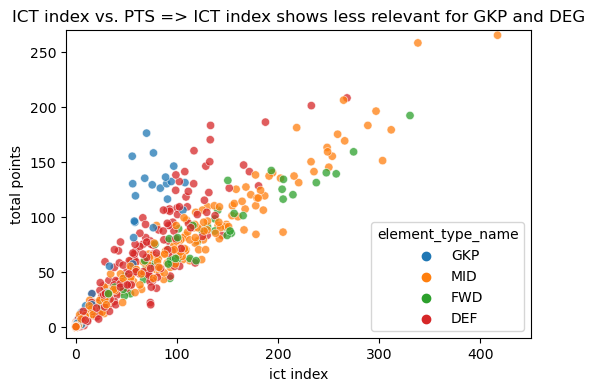

In [409]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='ict_index', y='total_points', data=df_elements, hue='element_type_name', alpha=0.75)
plt.ylabel('total points')
plt.xlabel('ict index')
plt.xlim(-10,450)
plt.ylim(-10,270)
plt.title('ICT index vs. PTS => ICT index shows less relevant for GKP and DEG')
plt.show()

#### Element types <a name='eda_elements_types'/>
<a href=#top> Back to top <a>

In [35]:
with open(path_url + ".json'") as json_data:
            d = json.load(json_data)
            #print(list(d.keys()))
            df = json_normalize(d['element_types'])
            df_elements_types = df

In [36]:
df_elements_types.shape

(4, 11)

In [37]:
df_elements_types.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],83
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],247
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],309
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],98


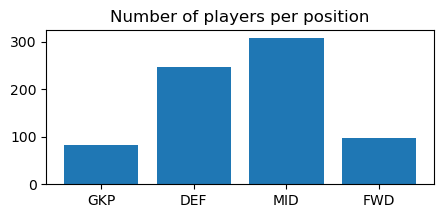

In [399]:
plt.figure(figsize=(5,2))
plt.bar(x='singular_name_short', height='element_count', data=df_elements_types)
plt.title('Number of players per position')
plt.show()

*(Skip)* **Combinations/Permutations to get best team** *(Skip)*
<br>*=> Decided to work with Linear Programming instead as would be to intense computation to calculate all permutations and combinations (check lower section)*

In [39]:
# https://www.geeksforgeeks.org/permutation-and-combination-in-python/
# https://www.geeksforgeeks.org/python-program-to-get-all-unique-combinations-of-two-lists/#:~:text=The%20unique%20combination%20of%20two,elements%20of%20the%20second%20list.&text=Method%201%20%3A%20Using%20permutation(),and%20initialize%20list_1%20and%20list_2.

In [40]:
from itertools import permutations

perm = permutations([1,2,3], 3)

for i in perm:
    print(i)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


In [41]:
from itertools import combinations

comb = combinations([1,2,3], 2)

for i in comb:
    print(i)

(1, 2)
(1, 3)
(2, 3)


In [42]:
# initialize lists
list_1 = ["a", "b", "c","d"]
list_2 = [1,4,9]

print(len(list_2))
 
# create empty list to store the
# combinations
unique_combinations = []
 
# Getting all permutations of list_1
# with length of list_2
permut = permutations(list_1, len(list_2))
 
# zip() is called to pair each permutation
# and shorter list element into combination
for comb in permut:
    zipped = zip(comb, list_2)
    unique_combinations.append(list(zipped))
 
# printing unique_combination list
print(unique_combinations)

3
[[('a', 1), ('b', 4), ('c', 9)], [('a', 1), ('b', 4), ('d', 9)], [('a', 1), ('c', 4), ('b', 9)], [('a', 1), ('c', 4), ('d', 9)], [('a', 1), ('d', 4), ('b', 9)], [('a', 1), ('d', 4), ('c', 9)], [('b', 1), ('a', 4), ('c', 9)], [('b', 1), ('a', 4), ('d', 9)], [('b', 1), ('c', 4), ('a', 9)], [('b', 1), ('c', 4), ('d', 9)], [('b', 1), ('d', 4), ('a', 9)], [('b', 1), ('d', 4), ('c', 9)], [('c', 1), ('a', 4), ('b', 9)], [('c', 1), ('a', 4), ('d', 9)], [('c', 1), ('b', 4), ('a', 9)], [('c', 1), ('b', 4), ('d', 9)], [('c', 1), ('d', 4), ('a', 9)], [('c', 1), ('d', 4), ('b', 9)], [('d', 1), ('a', 4), ('b', 9)], [('d', 1), ('a', 4), ('c', 9)], [('d', 1), ('b', 4), ('a', 9)], [('d', 1), ('b', 4), ('c', 9)], [('d', 1), ('c', 4), ('a', 9)], [('d', 1), ('c', 4), ('b', 9)]]


In [43]:
from itertools import combinations

comb_gkp = combinations(list(df_elements[df_elements['element_type_name'] == 'GKP']['id']),2)
#for i in comb_fwd:
#    print(i)
x = 0
data = []
for i in comb_gkp:
    x = x+1
    for a in [0,1]:
        data.append({
            'gkp_comb_id':x,
            'gkp_comb_list':i,
        
            'gkp_id':i[a],
            'gkp_web_name':df_elements[df_elements['id'] == i[a]]['web_name'].sum(),
            'gkp_cost_start':df_elements[df_elements['id'] == i[a]]['cost_start'].sum(),
            'gkp_total_points':df_elements[df_elements['id'] == i[a]]['total_points'].sum(),
        
    })
    
gkp_pts = pd.DataFrame(data)

In [44]:
gkp_pts_agg = gkp_pts.groupby(['gkp_comb_id','gkp_comb_list'])[['gkp_total_points','gkp_cost_start']].sum().sort_values(by='gkp_total_points', ascending=False).reset_index()

In [45]:
gkp_pts.head()

,gkp_comb_id,gkp_comb_list,gkp_id,gkp_web_name,gkp_cost_start,gkp_total_points
0,1,"(1, 2)",1,Leno,50,10
1,1,"(1, 2)",2,Rúnarsson,40,0
2,2,"(1, 532)",1,Leno,50,10
3,2,"(1, 532)",532,Hein,40,0
4,3,"(1, 559)",1,Leno,50,10


In [46]:
gkp_pts_agg.head()

,gkp_comb_id,gkp_comb_list,gkp_total_points,gkp_cost_start
0,2685,"(231, 353)",334,115
1,2665,"(231, 257)",331,120
2,2698,"(231, 475)",322,110
3,2793,"(257, 353)",313,115
4,2693,"(231, 408)",312,110


In [47]:
gkp_pts['gkp_comb_id'].max()

3403

#### Events <a name='eda_events'/>
<a href=#top> Back to top <a>

In [51]:
with open(path_url + ".json'") as json_data:
            d = json.load(json_data)
            #print(list(d.keys()))
            df = json_normalize(d['events'])
            df_events = df

In [52]:
df_events.shape

(38, 24)

In [411]:
df_events.head(3)

,id,name,deadline_time,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,highest_score,is_previous,is_current,is_next,cup_leagues_created,h2h_ko_matches_created,chip_plays,most_selected,most_transferred_in,top_element,transfers_made,most_captained,most_vice_captained,top_element_info.id,top_element_info.points
0,1,Gameweek 1,2021-08-13T17:30:00Z,69,True,True,5059647,1628875800,0,150,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 145658}...",275,1,Fernandes,0,Salah,Fernandes,277,20
1,2,Gameweek 2,2021-08-21T10:00:00Z,56,True,True,6882931,1629540000,0,146,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 95038},...",277,272,James,12038724,Salah,Fernandes,142,18
2,3,Gameweek 3,2021-08-28T10:00:00Z,54,True,True,7516002,1630144800,0,119,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 94049},...",277,419,Torres,15553648,Fernandes,Fernandes,268,18


In [54]:
df_elements.head(1)

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,element_type_name,team_name,pts_per_minute,cost_start,pts_per_cost_start,transfer_delta
0,100.0,100.0,80201,0,0,-5,5,1,1,1.0,1.0,0,Bernd,0.0,1,False,,2022-02-11T08:00:15.144286Z,45,80201.jpg,2.5,Leno,0.8,False,None,a,1,3,10,80974,0,205566,0,0.0,2.2,Leno,360,0,0,1,9,0,0,0,0,0,10,0,69,85.0,0.0,0.0,8.5,400,29,614,69,598,60,442,30,NaN,,NaN,,NaN,,GKP,ARS,0.0278,50,0.2,-124592


In [413]:
players_dict = pd.Series(df_elements['web_name'].values, index=df_elements['id']).to_dict()

In [412]:
# replace ids by web names
df_events['most_captained'] = df_events['most_captained'].replace(players_dict)
df_events['most_vice_captained'] = df_events['most_vice_captained'].replace(players_dict)
df_events['top_element'] = df_events['top_element'].replace(players_dict)

In [414]:
df_events['chip_plays'][0]

[{'chip_name': 'bboost', 'num_played': 145658},
 {'chip_name': '3xc', 'num_played': 225749}]

In [415]:
# loops to extract info from json column
data = []
for d in df_events['id'].unique():
    for x in [0,1,2,3]:
        try:
            # print(d)
            # print(df_events['chip_plays'][d][x]['chip_name'])
            # print(df_events['chip_plays'][d][x]['num_played'])
            data.append({
                'gameweek':d,
                'chip_name':df_events['chip_plays'][d][x]['chip_name'],
                'num_played':df_events['chip_plays'][d][x]['num_played']
            })
        except:
            pass
df_events_chips = pd.DataFrame(data)

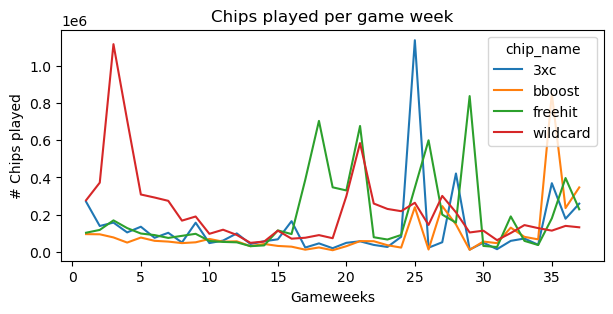

In [426]:
df_events_chips_pivot = df_events_chips.pivot(index='gameweek', columns='chip_name', values='num_played')
df_events_chips_pivot.plot(figsize=(7,3))
plt.xlabel('Gameweeks')
plt.ylabel('# Chips played')
plt.title('Chips played per game week')
plt.show()
# Bench Boost: most players keeping for end of season
# Wildcard: a lot of managers using early in the season as realized team is a bad fit
# freehit and 3xc used probably for double gameweeks or Xmas-NYE period
# 2021/22 Double Gameweek (DGW): 22,23,26,28,29,31,33,34,36,37
# https://www.fantasyfootballpundit.com/double-gameweek-schedule/

In [419]:
df_events_final = pd.merge(left=df_events, right=df_events_chips_pivot, how='left', left_on='id', right_on='gameweek')

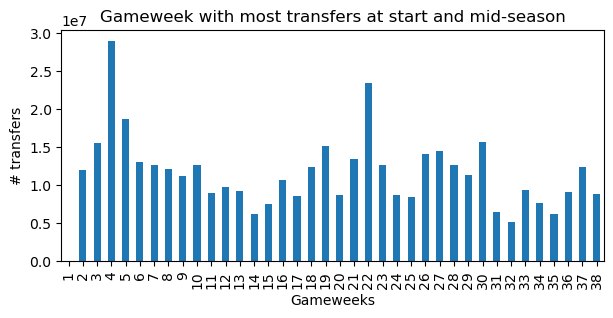

In [427]:
plt.figure(figsize=(7,3))
df_events_final['transfers_made'].plot(kind='bar')
plt.title('Gameweek with most transfers at start and mid-season')
plt.xlabel('Gameweeks')
plt.ylabel('# transfers')
plt.xticks(ticks=np.arange(0,38), labels=np.arange(1,39))
plt.show()

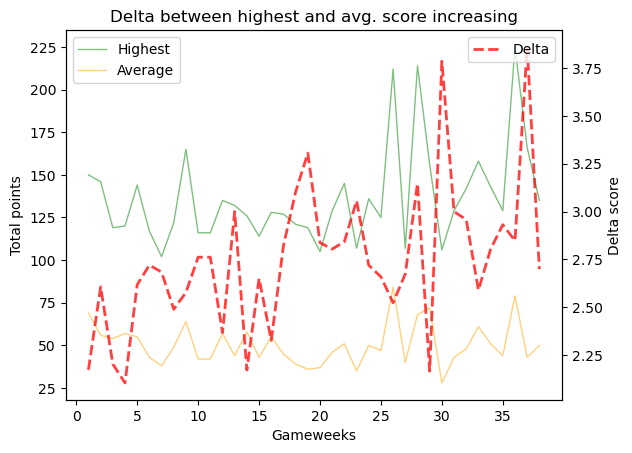

In [439]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_events_final['id'], df_events_final['highest_score'], color='green', label='Highest', linewidth=1, alpha=0.5)
ax.plot(df_events_final['id'], df_events_final['average_entry_score'], color='orange', label='Average', linewidth=1, alpha=0.5)
# set x-axis label
ax.set_xlabel('Gameweeks')
ax.set_ylabel('Total points')

plt.legend()

# twin object for two different y-axis on the same plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_events_final['id'], (df_events_final['highest_score'] / df_events_final['average_entry_score']), color='red', label='Delta', alpha=0.75, linestyle='--', linewidth=2)
ax2.set_ylabel('Delta score')

plt.legend(loc='upper right')
plt.title('Delta between highest and avg. score increasing') # could be due to managers taking more risks or/and top managers gaining experience from the season
plt.show()

In [432]:
df_events_final['highest_scoring_entry'].value_counts().max()
# no manager scored highest number of points more than once

1

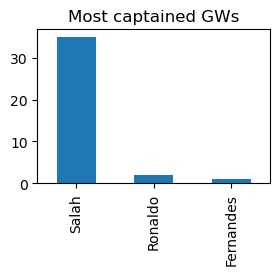

In [449]:
plt.figure(figsize=(3,2))
df_events_final['most_captained'].value_counts().head().plot(kind='bar')
plt.title('Most captained GWs')
plt.show()

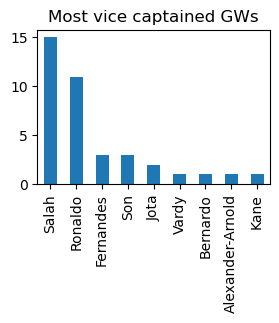

In [450]:
plt.figure(figsize=(3,2))
df_events_final['most_vice_captained'].value_counts().plot(kind='bar')
plt.title('Most vice captained GWs')
plt.show()

In [451]:
df_events_final.groupby(['most_vice_captained','most_captained']).size().sort_values(ascending=False)

most_vice_captained  most_captained
Salah                Salah             13
Ronaldo              Salah             11
Son                  Salah              3
Fernandes            Salah              2
Jota                 Salah              2
Salah                Ronaldo            2
Alexander-Arnold     Salah              1
Bernardo             Salah              1
Fernandes            Fernandes          1
Kane                 Salah              1
Vardy                Salah              1
dtype: int64

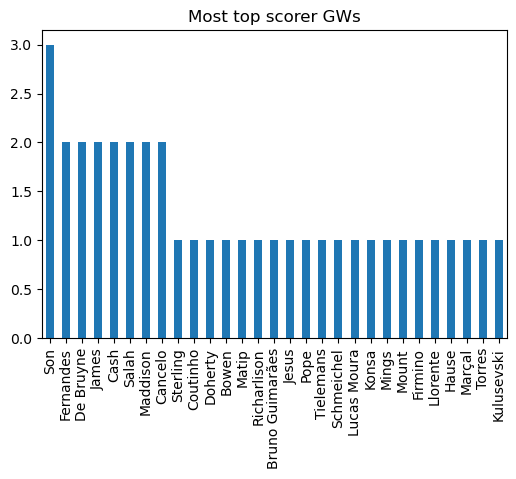

In [454]:
plt.figure(figsize=(6,4))
df_events_final['top_element'].value_counts().plot(kind='bar')
plt.title('Most top scorer GWs')
plt.show()

In [455]:
(df_events_final['most_captained'] == df_events_final['top_element']).sort_values(ascending=False).head()
print('only in 2 Gameweeks was the top element the element the most captained')

only in 2 Gameweeks was the top element the element the most captained


In [457]:
df_events_final.head(3)

,id,name,deadline_time,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,highest_score,is_previous,is_current,is_next,cup_leagues_created,h2h_ko_matches_created,chip_plays,most_selected,most_transferred_in,top_element,transfers_made,most_captained,most_vice_captained,top_element_info.id,top_element_info.points,3xc,bboost,freehit,wildcard
0,1,Gameweek 1,2021-08-13T17:30:00Z,69,True,True,5059647,1628875800,0,150,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 145658}...",275,1,Fernandes,0,Salah,Fernandes,277,20,269514.0,95038.0,102410.0,277209.0
1,2,Gameweek 2,2021-08-21T10:00:00Z,56,True,True,6882931,1629540000,0,146,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 95038},...",277,272,James,12038724,Salah,Fernandes,142,18,138714.0,94049.0,117627.0,372083.0
2,3,Gameweek 3,2021-08-28T10:00:00Z,54,True,True,7516002,1630144800,0,119,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 94049},...",277,419,Torres,15553648,Fernandes,Fernandes,268,18,157121.0,77204.0,168976.0,1117718.0


***
### FIXTURES - *'fixtures'* <a name='eda_fixtures'/>
<a href=#top> Back to top <a>

In [70]:
# Run the function and choose where to save the json file
#file = 'https://fantasy.premierleague.com/api/entry/4292129/history/'
file_url = "https://fantasy.premierleague.com/api/fixtures/"
path_url = r'C:\Users\glaurent\OneDrive - Expedia Group\Desktop\EPFL ML\fpl_moneyball_fixture'
# pages = np.arange(1,8)

In [71]:
# only run when importing data / don't run anymore now that 2021/2022 season is over
# file = file_url
# print(file)
# get_json(path_url + ".json'")
# print(path_url + ".json")

In [72]:
with open(path_url + ".json'") as json_data:
            d = json.load(json_data)
            #print(list(d.keys()))
            #df = json_normalize(d['events'])
            df = json_normalize(d)
            df_fixture = df

In [73]:
df_fixture.shape

(380, 17)

In [458]:
df_fixture.head(3)

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,team_a,team_a_score,team_h,team_h_score,stats,team_h_difficulty,team_a_difficulty,pulse_id
0,2210271,1,True,True,1,2021-08-13T19:00:00Z,90,False,True,1,0,3,2,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",4,2,66342
1,2210276,1,True,True,6,2021-08-14T11:30:00Z,90,False,True,10,1,13,5,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,4,66347
2,2210272,1,True,True,2,2021-08-14T14:00:00Z,90,False,True,4,2,5,1,"[{'identifier': 'goals_scored', 'a': [{'value'...",2,2,66343


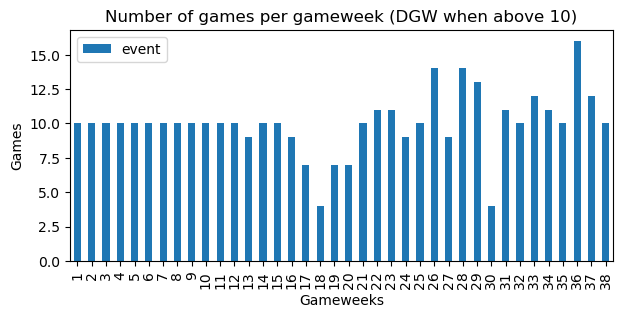

In [461]:
df_fixture['event'].value_counts().reset_index().sort_values(by='index').set_index('index').plot(kind='bar', figsize=(7,3))
#plt.plot(y=10, x=np.arange(1,39), color='red')
plt.title('Number of games per gameweek (DGW when above 10)')
plt.xlabel('Gameweeks')
plt.ylabel('Games')
plt.show()
# important data to keep in mind in modelling

In [76]:
df_events_final = pd.merge(left=df_events_final, right=df_fixture.groupby('event')[['code']].count().reset_index().rename(columns=({'code':'games'})), left_on='id', right_on='event')
df_events_final['highest_score'] / df_events_final['games']

0     15.000000
1     14.600000
2     11.900000
3     12.000000
4     14.400000
5     11.700000
6     10.200000
7     12.200000
8     16.500000
9     11.600000
10    11.600000
11    13.500000
12    14.666667
13    12.600000
14    11.400000
15    14.222222
16    18.142857
17    30.250000
18    17.000000
19    15.000000
20    12.900000
21    13.181818
22     9.727273
23    15.111111
24    12.500000
25    15.142857
26    11.888889
27    15.285714
28    12.000000
29    26.500000
30    11.727273
31    14.200000
32    13.166667
33    13.000000
34    12.900000
35    14.062500
36    13.833333
37    13.500000
dtype: float64

In [77]:
# 0 to 9
df_fixture['stats'][0]
# df_fixture['stats'][0][0]['identifier']
# df_fixture['stats'][0][0]['h']
# probably data which can get from players directly but otherwise could loop to get data
# match most most yellow/red cards? march with most saves? match with most bonus points?

[{'identifier': 'goals_scored',
  'a': [],
  'h': [{'value': 1, 'element': 77}, {'value': 1, 'element': 81}]},
 {'identifier': 'assists', 'a': [], 'h': [{'value': 1, 'element': 91}]},
 {'identifier': 'own_goals', 'a': [], 'h': []},
 {'identifier': 'penalties_saved', 'a': [], 'h': []},
 {'identifier': 'penalties_missed', 'a': [], 'h': []},
 {'identifier': 'yellow_cards', 'a': [], 'h': []},
 {'identifier': 'red_cards', 'a': [], 'h': []},
 {'identifier': 'saves',
  'a': [{'value': 1, 'element': 1}],
  'h': [{'value': 4, 'element': 80}]},
 {'identifier': 'bonus',
  'a': [],
  'h': [{'value': 3, 'element': 81},
   {'value': 2, 'element': 91},
   {'value': 1, 'element': 80}]},
 {'identifier': 'bps',
  'a': [{'value': 17, 'element': 16},
   {'value': 14, 'element': 8},
   {'value': 14, 'element': 10},
   {'value': 13, 'element': 7},
   {'value': 13, 'element': 21},
   {'value': 13, 'element': 478},
   {'value': 12, 'element': 67},
   {'value': 11, 'element': 1},
   {'value': 9, 'element': 17}

In [78]:
most_bps = []
for x in np.arange(0,df_fixture.shape[0]):
    # print(x)
    
    away = 0
    home = 0
    for a in np.arange(0,len(df_fixture['stats'][x][9]['a'])):
        away = away + df_fixture['stats'][x][9]['a'][a-1]['value']
    for h in np.arange(0,len(df_fixture['stats'][x][9]['h'])):
        home = home + df_fixture['stats'][x][9]['h'][h-1]['value']
    # print(away)
    # print(home)
    # print(away + home)

    most_bps.append({
        'game_id': df_fixture['id'][x],
        'away_score': df_fixture['team_a_score'][x],
        'home_score': df_fixture['team_h_score'][x],
        'away': away,
        'home': home,
        'total': away + home
    })
    
df_most_bps = pd.DataFrame(data=most_bps, columns=['game_id','home_score','away_score','home','away','total'])
df_most_bps.sort_values(by='total', ascending=False).head()

,game_id,home_score,away_score,home,away,total
159,170,7,0,389,116,505
169,185,6,3,292,207,499
310,324,3,2,286,210,496
246,184,6,0,372,118,490
8,9,2,4,220,269,489


In [79]:
df_fixture[df_fixture['id'] == 170]

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,team_a,team_a_score,team_h,team_h_score,stats,team_h_difficulty,team_a_difficulty,pulse_id
159,2210440,17,True,True,170,2021-12-14T20:00:00Z,90,False,True,10,0,12,7,"[{'identifier': 'goals_scored', 'a': [], 'h': ...",2,5,66511


In [80]:
round(df_most_bps[['away','home','total','away_score','home_score']].describe(),2)
# team playing away make on average (and median) less bonus points + and score less goals

,away,home,total,away_score,home_score
count,380.00,380.00,380.00,380.00,380.00
mean,175.28,185.15,360.43,1.31,1.51
std,57.06,59.22,48.39,1.26,1.33
min,65.00,87.00,226.00,0.00,0.00
25%,133.00,138.75,327.75,0.00,1.00
50%,164.00,178.00,360.00,1.00,1.00
75%,209.25,220.00,391.00,2.00,2.00
max,386.00,393.00,505.00,6.00,7.00


***
### PLAYERS - *'element-summary'* <a name='eda_players'/>
<a href=#top> Back to top <a>
* Future fixtures
* Past fixtures
* Past seasons

#### Future fixtures

In [81]:
# Run the function and choose where to save the json file
#file = 'https://fantasy.premierleague.com/api/entry/4292129/history/'
file_url = "https://fantasy.premierleague.com/api/element-summary/"
path_url = r'C:\Users\glaurent\OneDrive - Expedia Group\Desktop\EPFL ML\Fantasy\Players\fpl_moneyball_players'
pages = np.arange(1,750)

In [82]:
# only run when importing data / don't run anymore now that 2021/2022 season is over
# for page in pages:
    # file = file_url + page.astype(str) + "/"
    # print(file)
    # get_json(path_url + page.astype(str) + ".json'")
    # print(path_url + page.astype(str) + ".json")

In [83]:
# Open the json file and print a list of the keys
for page in pages:
    try:
        # print(page)
        if page == 1:
            with open(path_url + page.astype(str) + ".json'") as json_data:
                d = json.load(json_data)
                #print(list(d.keys()))
                df = json_normalize(d['fixtures'])
                df['player'] = page
                df_players_fix = df
                continue
        with open(path_url + page.astype(str) + ".json'") as json_data:
            d = json.load(json_data)
            #print(list(d.keys()))
            df = json_normalize(d['fixtures'])
            df['player'] = page
            df_players_fix = pd.concat([df_players_fix,df]).reset_index(drop=True)
            # print(df_players_fix.shape)
    except:
        pass
#print(d)
# return error when went through list of all players (e.g.: on 25th Oct 2021, 618 players)

In [84]:
df_players_fix.shape

(0, 1)

#### Past fixtures <a name='eda_players_past_fix'/>
<a href=#top> Back to top <a>

In [88]:
# Open the json file and print a list of the keys
for page in pages:
    try:
        if page == 1:
            with open(path_url + page.astype(str) + ".json'") as json_data:
                d = json.load(json_data)
                #print(list(d.keys()))
                df = json_normalize(d['history'])
                df['player'] = page
                df_players_hist = df
                continue
        with open(path_url + page.astype(str) + ".json'") as json_data:
            d = json.load(json_data)
            #print(list(d.keys()))
            df = json_normalize(d['history'])
            df['player'] = page
            df_players_hist = pd.concat([df_players_hist,df]).reset_index(drop=True)
    except:
        pass
#print(d)
# return error when went through list of all players (e.g.: on 25th Oct 2021, 618 players)

In [89]:
df_players_hist.shape

(25447, 32)

In [90]:
df_players_hist['player'].max()

737

In [92]:
df_players_hist.dtypes

element               int64
fixture               int64
opponent_team         int64
total_points          int64
was_home               bool
kickoff_time         object
team_h_score          int64
team_a_score          int64
round                 int64
minutes               int64
goals_scored          int64
assists               int64
clean_sheets          int64
goals_conceded        int64
own_goals             int64
penalties_saved       int64
penalties_missed      int64
yellow_cards          int64
red_cards             int64
saves                 int64
bonus                 int64
bps                   int64
influence            object
creativity           object
threat               object
ict_index            object
value                 int64
transfers_balance     int64
selected              int64
transfers_in          int64
transfers_out         int64
player                int32
dtype: object

In [93]:
feature_to_change = ['creativity','ict_index','influence','threat']
for f in feature_to_change:
    df_players_hist[f] = df_players_hist[f].astype(float)
df_players_hist['was_home'] = df_players_hist['was_home']*1

In [94]:
# augment data set with players information
df_elements[['id','element_type','element_type_name','team','team_name','web_name']].head()

,id,element_type,element_type_name,team,team_name,web_name
0,1,1,GKP,1,ARS,Leno
1,2,1,GKP,1,ARS,Rúnarsson
2,3,3,MID,1,ARS,Willian
3,4,4,FWD,1,ARS,Aubameyang
4,5,2,DEF,1,ARS,Cédric


In [95]:
df_players_hist = pd.merge(left=df_players_hist, right=df_elements[['id','element_type_name','team','team_name','web_name']],  how='left', left_on='element', right_on='id').rename(columns={'id':'id_player'})

In [96]:
# augment data set with team strenght info
df_teams.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1250,1270,1150,1210,1190,1220,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1100,1100,1140,1110,1090,1090,2
2,94,0,None,3,0,Brentford,0,0,0,BRE,2,None,False,0,1060,1070,1120,1150,1080,1120,130
3,36,0,None,4,0,Brighton,0,0,0,BHA,3,None,False,0,1100,1090,1160,1160,1100,1120,131
4,90,0,None,5,0,Burnley,0,0,0,BUR,2,None,False,0,1060,1060,1080,1130,1060,1100,43


In [97]:
df_players_hist.shape

(25447, 37)

In [98]:
df_players_hist = pd.merge(left=df_players_hist, right=df_teams[['short_name','strength']], how='left', left_on='team_name', right_on='short_name')\
.rename(columns={'strength':'team_strength'}).drop(columns='short_name')

In [99]:
df_players_hist.shape

(25447, 38)

In [100]:
# augment data set with fixture and teams information
df_fixture[['id','team_a','team_a_difficulty','team_h','team_h_difficulty']].head()

,id,team_a,team_a_difficulty,team_h,team_h_difficulty
0,1,1,2,3,4
1,6,10,4,13,2
2,2,4,2,5,2
3,3,7,4,6,2
4,4,16,2,8,2


In [101]:
# adding fixture difficulty for team away
df_players_hist = pd.merge(left=df_players_hist, right=df_fixture[['id','team_a','team_a_difficulty']],  how='left', left_on=['fixture','team'], right_on=['id','team_a']).rename(columns={'id':'id_fixture_a'})
# adding fixture difficulty for team home
df_players_hist = pd.merge(left=df_players_hist, right=df_fixture[['id','team_h','team_h_difficulty']],  how='left', left_on=['fixture','team'], right_on=['id','team_h']).rename(columns={'id':'id_fixture_h'})

In [102]:
# merge both fixture difficulty columns
df_players_hist['fixture_difficulty'] = df_players_hist['team_h_difficulty'].fillna(0) + df_players_hist['team_a_difficulty'].fillna(0)

In [103]:
# drop duplicates columns
df_players_hist.drop(columns=['player','id_player','id_fixture_a','team_a','team_a_difficulty','id_fixture_h','team_h','team_h_difficulty','team'], inplace=True)

In [104]:
df_players_hist[df_players_hist['element'] == 200].head(10).transpose()

,7561,7562,7563,7564,7565,7566,7567,7568,7569,7570
element,200,200,200,200,200,200,200,200,200,200
fixture,5,20,26,37,42,57,64,75,82,93
opponent_team,20,19,15,12,4,5,7,13,3,1
total_points,9,1,3,4,2,1,1,2,3,2
was_home,1,0,0,1,0,1,0,1,0,1
kickoff_time,2021-08-14T14:00:00Z,2021-08-23T19:00:00Z,2021-08-28T14:00:00Z,2021-09-11T14:00:00Z,2021-09-19T13:00:00Z,2021-09-25T14:00:00Z,2021-10-03T13:00:00Z,2021-10-16T14:00:00Z,2021-10-24T13:00:00Z,2021-10-30T11:30:00Z
team_h_score,1,4,1,0,2,2,2,4,1,0
team_a_score,0,1,2,1,1,2,2,2,2,2
round,1,2,3,4,5,6,7,8,9,10
minutes,90,90,90,90,90,90,90,90,90,90


In [462]:
df_players_hist.head(5)

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out,element_type_name,team_name,web_name,team_strength,fixture_difficulty,cards,total_points_max
0,1,1,3,1,0,2021-08-13T19:00:00Z,2,0,1,90,0,0,0,2,0,0,0,0,0,1,0,11,11.8,0.0,0.0,1.2,50,0,153122,0,0,GKP,ARS,Leno,4,2.0,0,1
1,1,18,6,2,1,2021-08-22T15:30:00Z,0,2,2,90,0,0,0,2,0,0,0,0,0,3,0,17,24.2,0.0,0.0,2.4,50,-25816,144885,2627,28443,GKP,ARS,Leno,4,4.0,0,2
2,1,24,12,1,0,2021-08-28T11:30:00Z,5,0,3,90,0,0,0,5,0,0,0,0,0,5,0,20,43.0,0.0,0.0,4.3,49,-14559,136757,5164,19723,GKP,ARS,Leno,4,5.0,0,1
3,1,31,15,0,1,2021-09-11T14:00:00Z,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,49,6564,153130,35360,28796,GKP,ARS,Leno,4,2.0,0,0
4,1,43,5,0,0,2021-09-18T14:00:00Z,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,49,-23847,129851,4822,28669,GKP,ARS,Leno,4,2.0,0,0


In [474]:
df_players_hist.groupby('web_name').agg({'total_points':[np.mean, np.median, np.std, np.min, np.max]}).sort_values(by=('total_points','mean'), ascending=False).head(15)

total_points                           
                         mean median       std amin amax
web_name                                                
Salah                6.973684    6.0  5.952455    0   24
Son                  6.789474    7.0  5.173518    0   21
Kulusevski           5.500000    4.0  4.475423    0   16
Alexander-Arnold     5.473684    6.0  4.272709    0   15
Bowen                5.421053    3.0  4.717028    0   16
Cancelo              5.289474    5.0  4.435166    0   18
De Bruyne            5.157895    3.0  5.702187    0   24
Kane                 5.052632    2.0  4.267713    0   13
Robertson            4.894737    6.0  4.488962    0   15
van Dijk             4.815789    6.0  3.755035    0   15
Mané                 4.815789    3.0  4.099145    0   19
Maddison             4.763158    2.0  4.750159    0   16
Saka                 4.710526    3.0  4.033025    0   16
Alisson              4.631579    6.0  3.052877   -1   10
Jota                 4.605263    3.0  4.142982    0   16

In [509]:
df_players_hist.groupby('web_name')['total_points'].quantile(0.5).sort_values(ascending=False).head(10)

web_name
Son                 7.0
van Dijk            6.0
Salah               6.0
Matip               6.0
Robertson           6.0
Alexander-Arnold    6.0
Alisson             6.0
Ederson             5.5
Cancelo             5.0
Laporte             5.0
Name: total_points, dtype: float64

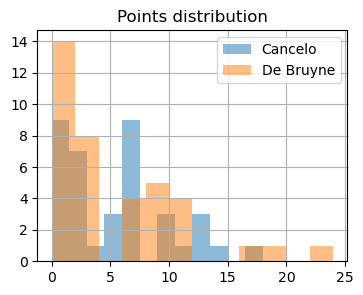

In [481]:
plt.figure(figsize=(4,3))
df_players_hist[df_players_hist['web_name'] == 'Cancelo']['total_points'].hist(bins=12, alpha=0.5, label='Cancelo')
df_players_hist[df_players_hist['web_name'] == 'De Bruyne']['total_points'].hist(bins=12, alpha=0.5, label='De Bruyne')
plt.legend()
plt.title('Points distribution')
plt.show()

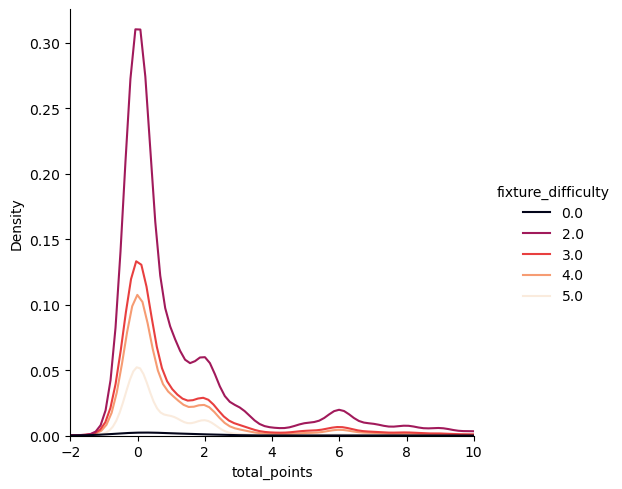

In [484]:
sns.displot(data=df_players_hist, x='total_points', kind='kde', hue='fixture_difficulty', palette='rocket')
plt.xlim(-2,10)
plt.show()

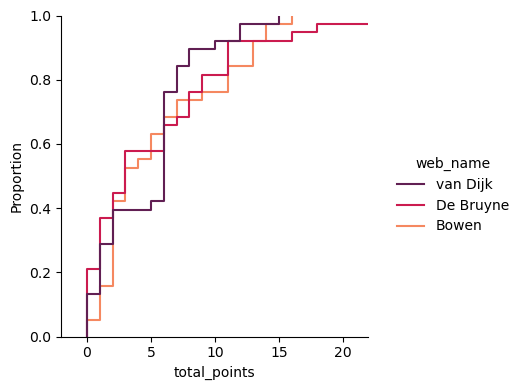

In [511]:
sns.displot(data=df_players_hist[(df_players_hist['web_name'] == 'van Dijk') |  (df_players_hist['web_name'] == 'De Bruyne') |  (df_players_hist['web_name'] == 'Bowen')]\
            , x='total_points', kind='ecdf', hue='web_name', palette='rocket', height=4)
plt.xlim(-2,22)
plt.show()

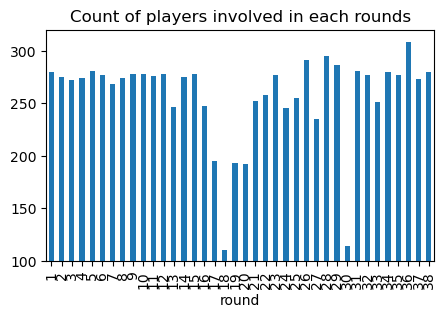

In [486]:
plt.figure(figsize=(5,3))
df_players_hist[df_players_hist['minutes'] > 0].groupby('round')['element'].nunique().plot(kind='bar')
plt.title('Count of players involved in each rounds')
plt.ylim(100,320)
plt.show()
# There are more players invovled in gameweeks later in the season (more injuries, etc..)

#### Past seasons <a name='eda_players_past_season'/>
<a href=#top> Back to top <a>

In [113]:
# Open the json file and print a list of the keys
for page in pages:
    try:
        if page == 1:
            with open(path_url + page.astype(str) + ".json'") as json_data:
                d = json.load(json_data)
                #print(list(d.keys()))
                df = json_normalize(d['history_past'])
                df['player'] = page
                df_players_hist_past = df
                continue
        with open(path_url + page.astype(str) + ".json'") as json_data:
            d = json.load(json_data)
            #print(list(d.keys()))
            df = json_normalize(d['history_past'])
            df['player'] = page
            df_players_hist_past = pd.concat([df_players_hist_past,df]).reset_index(drop=True)
    except:
        pass
print('done')
#print(d)
# return error when went through list of all players (e.g.: on 25th Oct 2021, 618 players)

done


In [114]:
df_players_hist_past.shape

(2243, 23)

In [115]:
df_players_hist_past.columns

Index(['season_name', 'element_code', 'start_cost', 'end_cost', 'total_points',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'player'],
      dtype='object')

In [116]:
df_players_hist_past['web_name'] = df_players_hist_past['player'].replace(players_dict)

In [117]:
df_players_hist_past['player'].nunique()

535

In [118]:
df_players_hist_past[df_players_hist_past['player'] == 200].transpose()

,733,734,735,736,737,738,739,740,741,742
season_name,2006/07,2007/08,2008/09,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21
element_code,17745.0,17745.0,17745.0,17745.0,17745.0,17745.0,17745.0,17745.0,17745.0,17745.0
start_cost,35.0,40.0,40.0,45.0,45.0,50.0,50.0,50.0,50.0,55.0
end_cost,35.0,40.0,39.0,45.0,50.0,49.0,51.0,50.0,55.0,54.0
total_points,0.0,41.0,2.0,83.0,147.0,109.0,123.0,120.0,156.0,128.0
minutes,0.0,630.0,72.0,2160.0,3420.0,2666.0,2965.0,3420.0,3420.0,3420.0
goals_scored,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
assists,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clean_sheets,0.0,0.0,0.0,6.0,15.0,8.0,8.0,10.0,13.0,11.0
goals_conceded,0.0,5.0,1.0,37.0,36.0,47.0,47.0,48.0,41.0,50.0


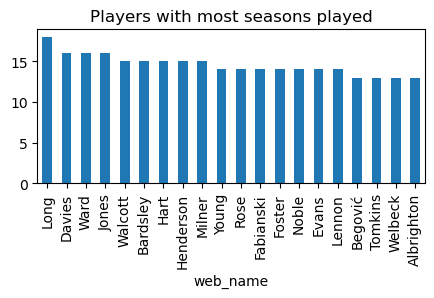

In [515]:
plt.figure(figsize=(5,2))
df_players_hist_past.groupby('web_name')['season_name'].count().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Players with most seasons played')
plt.show()

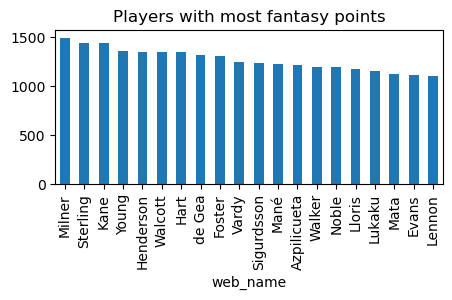

In [516]:
plt.figure(figsize=(5,2))
df_players_hist_past.groupby('web_name')['total_points'].sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Players with most fantasy points')
plt.show()

In [121]:
df_players_hist_last = df_players_hist_past[df_players_hist_past['season_name'] == '2020/21']

In [122]:
df_players_hist_last.head()

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,player,web_name
2,2020/21,80201.0,50.0,50.0,131.0,3131.0,0.0,0.0,11.0,37.0,1.0,1.0,0.0,0.0,1.0,86.0,11.0,625.0,702.2,0.0,2.0,70.3,1,Leno
3,2020/21,115918.0,45.0,44.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8.0,16.6,0.0,0.0,1.7,2,Rúnarsson
11,2020/21,47431.0,80.0,75.0,78.0,1398.0,1.0,7.0,3.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,306.0,256.2,534.8,228.0,102.3,3,Willian
15,2020/21,54694.0,120.0,113.0,131.0,2330.0,10.0,3.0,10.0,26.0,1.0,0.0,0.0,2.0,0.0,0.0,11.0,358.0,493.8,361.5,823.0,167.4,4,Aubameyang
21,2020/21,58822.0,50.0,46.0,28.0,744.0,0.0,1.0,2.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,125.0,110.8,114.8,66.0,29.2,5,Cédric


In [123]:
df_players_hist_last['pts_per_cost'] = df_players_hist_last['total_points'] / df_players_hist_last['start_cost']

C:\Users\glaurent\AppData\Local\Temp\ipykernel_17144\3323109069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_hist_last['pts_per_cost'] = df_players_hist_last['total_points'] / df_players_hist_last['start_cost']


In [124]:
df_players_hist_last.sort_values(by='pts_per_cost', ascending=False).head(10)

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,player,web_name,pts_per_cost
117,2020/21,98980.0,45.0,53.0,186.0,3420.0,0.0,0.0,15.0,46.0,0.0,1.0,0.0,1.0,0.0,142.0,27.0,825.0,1067.2,20.0,0.0,108.5,30,Martínez,4.133333
715,2020/21,87873.0,45.0,55.0,171.0,3410.0,8.0,3.0,12.0,53.0,0.0,0.0,0.0,7.0,0.0,0.0,15.0,726.0,756.8,454.6,527.0,174.2,188,Dallas,3.800000
718,2020/21,106617.0,55.0,66.0,194.0,3052.0,17.0,11.0,10.0,50.0,0.0,0.0,0.0,3.0,0.0,0.0,26.0,631.0,867.2,371.0,1512.0,274.6,189,Bamford,3.527273
732,2020/21,437495.0,45.0,48.0,154.0,3150.0,0.0,0.0,11.0,52.0,1.0,1.0,0.0,0.0,0.0,140.0,20.0,774.0,1026.0,10.0,0.0,103.7,199,Meslier,3.422222
151,2020/21,169359.0,45.0,50.0,138.0,3404.0,0.0,4.0,16.0,44.0,0.0,0.0,0.0,7.0,0.0,0.0,9.0,710.0,690.4,607.0,122.0,142.2,39,Targett,3.066667
1718,2020/21,55459.0,50.0,57.0,153.0,3170.0,0.0,11.0,11.0,41.0,0.0,0.0,0.0,3.0,0.0,0.0,21.0,730.0,669.4,898.6,96.0,166.8,411,Cresswell,3.060000
1766,2020/21,215439.0,50.0,52.0,147.0,3420.0,10.0,2.0,11.0,47.0,1.0,0.0,0.0,7.0,1.0,0.0,16.0,555.0,889.8,271.1,925.0,208.8,422,Soucek,2.940000
1069,2020/21,221399.0,55.0,56.0,160.0,2846.0,8.0,10.0,11.0,45.0,0.0,0.0,0.0,2.0,0.0,0.0,15.0,542.0,759.2,821.7,666.0,225.2,267,Harrison,2.909091
989,2020/21,59859.0,55.0,55.0,157.0,2025.0,13.0,4.0,12.0,16.0,0.0,0.0,1.0,1.0,0.0,0.0,22.0,620.0,754.6,688.4,712.0,215.7,250,Gündogan,2.854545
1755,2020/21,164555.0,45.0,48.0,128.0,3054.0,0.0,9.0,9.0,43.0,0.0,0.0,0.0,3.0,0.0,0.0,12.0,625.0,693.8,670.9,220.0,158.7,418,Coufal,2.844444


In [125]:
df_players_hist_last.sort_values(by='total_points', ascending=False).head(5)

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,player,web_name,pts_per_cost
1127,2020/21,141746.0,105.0,113.0,244.0,3101.0,18.0,14.0,13.0,36.0,0.0,0.0,1.0,6.0,0.0,0.0,36.0,870.0,1292.6,1414.9,1253.0,396.2,277,Fernandes,2.323810
1481,2020/21,78830.0,105.0,119.0,242.0,3083.0,23.0,14.0,12.0,39.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0,880.0,1318.2,659.1,1585.0,355.9,357,Kane,2.304762
928,2020/21,118748.0,120.0,129.0,231.0,3077.0,22.0,6.0,11.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,657.0,1056.0,825.7,1980.0,385.8,233,Salah,1.925000
1491,2020/21,85971.0,90.0,96.0,228.0,3119.0,17.0,11.0,13.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,777.0,1052.2,1049.9,1046.0,315.2,359,Son,2.533333
718,2020/21,106617.0,55.0,66.0,194.0,3052.0,17.0,11.0,10.0,50.0,0.0,0.0,0.0,3.0,0.0,0.0,26.0,631.0,867.2,371.0,1512.0,274.6,189,Bamford,3.527273


In [126]:
df_elements[df_elements['code'] == 59859]

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,element_type_name,team_name,pts_per_minute,cost_start,pts_per_cost_start,transfer_delta
409,100.0,100.0,59859,0,0,-4,4,2,3,2.8,5.4,14,Ilkay,4.4,250,False,,2021-12-11T22:30:16.837568Z,71,59859.jpg,4.6,Gündogan,2.6,False,None,a,12,43,124,735419,0,1198893,0,0.6,17.5,Gündogan,1851,8,5,14,10,0,0,0,1,0,0,10,488,484.0,612.0,728.0,182.6,125,46,36,25,41,25,38,25,4.0,,3.0,,5.0,,MID,MCI,0.067,75,1.6533,-463474


In [127]:
df_elements_last = pd.merge(left=df_players_hist_last[['element_code','total_points','web_name']],\
         right=df_elements[['code','web_name','team_name','element_type_name','total_points','cost_start']],\
         how='left', left_on='element_code', right_on='code', suffixes=('_past','_current'))

In [128]:
df_elements_last.head()

,element_code,total_points_past,web_name_past,code,web_name_current,team_name,element_type_name,total_points_current,cost_start
0,80201.0,131.0,Leno,80201,Leno,ARS,GKP,10,50
1,115918.0,1.0,Rúnarsson,115918,Rúnarsson,ARS,GKP,0,40
2,47431.0,78.0,Willian,47431,Willian,ARS,MID,0,65
3,54694.0,131.0,Aubameyang,54694,Aubameyang,ARS,FWD,44,100
4,58822.0,28.0,Cédric,58822,Cédric,ARS,DEF,48,45


#### LINEAR PROGRAMMING <a name='eda_lp'/>
<a href=#top> Back to top <a>

In [129]:
from pulp import *

#### Best team which could have been picked based on previous season?
* No Chips used (no transfer, no triple captain, no bench boost, no wildcard)
* Same captain for all Gameweeks
* Based on costs at start of the season
* 15 players

In [130]:
# columns used to build either contrains or objective
df_elements_last[['web_name_past','team_name','element_type_name','total_points_past','cost_start']].head()

,web_name_past,team_name,element_type_name,total_points_past,cost_start
0,Leno,ARS,GKP,131.0,50
1,Rúnarsson,ARS,GKP,1.0,40
2,Willian,ARS,MID,78.0,65
3,Aubameyang,ARS,FWD,131.0,100
4,Cédric,ARS,DEF,28.0,45


In [131]:
# Helper variables
POS = df_elements_last['element_type_name'].unique()
CLUBS = df_elements_last['team_name'].unique()
BUDGET = 1000
pos_available = {
    'DEF':5,
    'MID':5,
    'FWD':3,
    'GKP':2
}

# Initilize Variables
names = [df_elements_last['web_name_past'][i] for i in df_elements_last.index]
teams = [df_elements_last['team_name'][i] for i in df_elements_last.index]
positions = [df_elements_last['element_type_name'][i] for i in df_elements_last.index]
prices = [df_elements_last['cost_start'][i] for i in df_elements_last.index]
points = [df_elements_last['total_points_past'][i] for i in df_elements_last.index]
players = [LpVariable("player_" + str(i), cat="Binary") for i in df_elements_last.index]

In [132]:
# Initialize the problem
prob_last = LpProblem("FLP_Player_Choices_last", LpMaximize)

# Define the objective
prob_last += lpSum(players[i] * points[i] for i in range(len(df_elements_last)))

In [133]:
# Build the constraints
prob_last += lpSum(players[i] * df_elements_last['cost_start'][df_elements_last.index[i]] for i in range(len(df_elements_last))) <= BUDGET # Budget Limit

for pos in POS:
    prob_last += lpSum(players[i] for i in range(len(df_elements_last)) if positions[i] == pos) <= pos_available[pos] # Position Limit
    
for club in CLUBS:
    prob_last += lpSum(players[i] for i in range(len(df_elements_last)) if teams[i] == club) <= 3 # Club Limit

In [134]:
# Solve the problem
prob_last.solve()

1

In [135]:
total_cost_start = 0
total_points_last = 0
total_points_current = 0

lp_results = []

for v in prob_last.variables():
    if v.varValue != 0:
        name = df_elements_last['web_name_past'][int(v.name.split("_")[1])]
        club = df_elements_last['team_name'][int(v.name.split("_")[1])]
        position = df_elements_last['element_type_name'][int(v.name.split("_")[1])]
        point_last = df_elements_last['total_points_past'][int(v.name.split("_")[1])]
        point_current = df_elements_last['total_points_current'][int(v.name.split("_")[1])]
        price_start = df_elements_last['cost_start'][int(v.name.split("_")[1])]
        # print(name, position, club, point_last, point_current, price_start, sep = " | ")
        
        lp_results.append({
            'web_name':name,
            'position':position,
            'team_name':club,
            'pts_last_season':point_last,
            'pts_current_season':point_current,
            'price':price_start
        })
        
        total_cost_start = total_cost_start + price_start
        total_points_last = total_points_last + point_last
        total_points_current = total_points_current + point_current

# print('***')    
print('total costs start', total_cost_start)
print('total points last', total_points_last)
print('total points current', total_points_current)
print('***') 

# Convert results to DataFrame
df_results = pd.DataFrame(lp_results)
df_results.sort_values(by='position')

total costs start 1000
total points last 2508.0
total points current 1856
***


,web_name,position,team_name,pts_last_season,pts_current_season,price
2,Dias,DEF,MCI,142.0,141,60
4,Wan-Bissaka,DEF,MUN,144.0,41,55
10,Cresswell,DEF,WHU,153.0,115,55
12,Targett,DEF,NEW,138.0,101,50
14,Dunk,DEF,BHA,130.0,92,50
1,Bamford,FWD,LEE,194.0,28,80
8,Kane,FWD,TOT,242.0,192,125
13,Watkins,FWD,AVL,168.0,131,75
5,Martínez,GKP,AVL,186.0,129,55
7,Lloris,GKP,TOT,149.0,158,55


**Comments:** 
* Performing worst than expected
* Several players largely under-perfroming compare to previous seasons *(e.g.: Dallas, Bamford, Wan-Bissaka, Dunk)* - potentially look at form or injuries at start of the season to exclude those players
* For some reasos no Liverpool players in the list

#### Best team which could have been picked at start of the season?
* No Chips used (no transfer, no triple captain, no bench boost, no wildcard)
* Same captain for all Gameweeks
* Based on costs at start of the season
* 15 players

In [136]:
df_elements.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,element_type_name,team_name,pts_per_minute,cost_start,pts_per_cost_start,transfer_delta
0,100.0,100.0,80201,0,0,-5,5,1,1,1.0,1.0,0,Bernd,0.0,1,False,,2022-02-11T08:00:15.144286Z,45,80201.jpg,2.5,Leno,0.8,False,None,a,1,3,10,80974,0,205566,0,0.0,2.2,Leno,360,0,0,1,9,0,0,0,0,0,10,0,69,85.0,0.0,0.0,8.5,400,29,614,69,598,60,442,30,NaN,,NaN,,NaN,,GKP,ARS,0.0278,50,0.2000,-124592
1,0.0,0.0,115918,0,0,0,0,0,1,0.0,0.0,0,Rúnar Alex,0.0,2,False,Joined OH Leuven on a season-long loan - Expec...,2021-08-31T22:00:09.069158Z,40,115918.jpg,0.0,Rúnarsson,0.5,False,None,u,1,3,0,19017,0,81363,0,0.0,0.0,Rúnarsson,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,537,55,523,34,490,19,541,55,NaN,,NaN,,NaN,,GKP,ARS,NaN,40,0.0000,-62346
2,0.0,0.0,47431,0,0,-2,2,0,3,0.0,0.0,0,Willian,0.0,3,False,Transferred to Corinthians,2021-08-20T09:30:14.065783Z,63,47431.jpg,0.0,Borges Da Silva,0.1,False,None,u,1,3,0,914,0,20541,0,0.0,0.0,Willian,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,733,307,733,307,733,307,733,307,NaN,,NaN,,NaN,,MID,ARS,NaN,65,0.0000,-19627
3,0.0,0.0,54694,0,0,-4,4,0,4,0.0,0.0,0,Pierre-Emerick,0.0,4,False,Left club by mutual consent,2022-02-02T08:21:28.428217Z,96,54694.jpg,3.1,Aubameyang,1.2,False,None,u,1,3,44,742898,0,900060,0,0.0,4.6,Aubameyang,1036,4,1,6,16,0,0,2,3,0,0,7,131,217.6,132.4,582.0,92.9,294,36,249,39,57,25,176,33,NaN,,NaN,,NaN,,FWD,ARS,0.0425,100,0.4400,-157162
4,100.0,100.0,58822,0,0,-3,3,1,2,2.2,4.6,14,Cédric,3.6,5,False,,2022-01-13T23:00:13.573747Z,42,58822.jpg,2.3,Soares,0.4,False,None,a,1,3,48,66997,0,55154,0,0.9,11.4,Cédric,1481,1,1,3,27,0,0,0,3,0,0,3,292,246.0,306.5,76.0,63.0,274,103,131,28,322,105,263,87,2.0,,3.0,,NaN,,DEF,ARS,0.0324,45,1.0667,11843


In [137]:
# columns used to build either contrains or objective
df_elements[['web_name','team_name','element_type_name','total_points','cost_start']].head()

,web_name,team_name,element_type_name,total_points,cost_start
0,Leno,ARS,GKP,10,50
1,Rúnarsson,ARS,GKP,0,40
2,Willian,ARS,MID,0,65
3,Aubameyang,ARS,FWD,44,100
4,Cédric,ARS,DEF,48,45


In [138]:
# Helper variables
POS = df_elements['element_type_name'].unique()
CLUBS = df_elements['team_name'].unique()
BUDGET = 1000
pos_available = {
    'DEF':5,
    'MID':5,
    'FWD':3,
    'GKP':2
}

# Initilize Variables
names = [df_elements['web_name'][i] for i in df_elements.index]
teams = [df_elements['team_name'][i] for i in df_elements.index]
positions = [df_elements['element_type_name'][i] for i in df_elements.index]
prices = [df_elements['cost_start'][i] for i in df_elements.index]
points = [df_elements['total_points'][i] for i in df_elements.index]
players = [LpVariable("player_" + str(i), cat="Binary") for i in df_elements.index]

In [139]:
# Initialize the problem
prob = LpProblem("FLP_Player_Choices", LpMaximize)

# Define the objective
prob += lpSum(players[i] * points[i] for i in range(len(df_elements)))

In [140]:
# Build the constraints
prob += lpSum(players[i] * df_elements['cost_start'][df_elements.index[i]] for i in range(len(df_elements))) <= BUDGET # Budget Limit

for pos in POS:
    prob += lpSum(players[i] for i in range(len(df_elements)) if positions[i] == pos) <= pos_available[pos] # Position Limit
    
for club in CLUBS:
    prob += lpSum(players[i] for i in range(len(df_elements)) if teams[i] == club) <= 3 # Club Limit

In [141]:
# Solve the problem
prob.solve()

1

In [142]:
total_cost_start = 0
total_cost_end = 0
total_points = 0

lp_results_start = []

for v in prob.variables():
    if v.varValue != 0:
        name = df_elements['web_name'][int(v.name.split("_")[1])]
        club = df_elements['team_name'][int(v.name.split("_")[1])]
        position = df_elements['element_type_name'][int(v.name.split("_")[1])]
        point = df_elements['total_points'][int(v.name.split("_")[1])]
        price_start = df_elements['cost_start'][int(v.name.split("_")[1])]
        price_end = df_elements['now_cost'][int(v.name.split("_")[1])]
        # print(name, position, club, point, price_start, sep = " | ")
        
        lp_results_start.append({
            'web_name':name,
            'position':position,
            'total_pts':point,
            'team_name':club,
            'price':price_start
        })
        
        total_cost_start = total_cost_start + price_start
        total_cost_end = total_cost_end + price_end
        total_points = total_points + point
        
#print('***')    
print('total costs start', total_cost_start)
print('total costs end', total_cost_end)
print('total points', total_points)
print('***')


# Convert results to DataFrame
df_results_start = pd.DataFrame(lp_results_start)
df_results_start.sort_values(by='position')

total costs start 1000
total costs end 1073
total points 2697
***


,web_name,position,total_pts,team_name,price
1,Rüdiger,DEF,150,CHE,55
3,Matip,DEF,170,LIV,50
5,Alexander-Arnold,DEF,208,LIV,75
6,Cancelo,DEF,201,MCI,60
7,Laporte,DEF,160,MCI,55
8,Pukki,FWD,142,NOR,60
11,Dennis,FWD,134,WAT,50
14,Toney,FWD,139,BRE,65
9,Lloris,GKP,158,TOT,55
13,Sá,GKP,146,WOL,50


In [143]:
max_p = df_results_start['total_pts'].idxmax(axis=0) # index of player with highest 'total_pts'
max_pts = df_results_start.loc[max_p]['total_pts'] # max pts
df_results_start[max_p:max_p+1].replace(max_pts,max_pts*2, inplace=True) # double max pts
print('Team total pts (incl. 2x captain):',df_results_start['total_pts'].sum())

Team total pts (incl. 2x captain): 2962


C:\Users\glaurent\AppData\Local\Temp\ipykernel_17144\2238906888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_start[max_p:max_p+1].replace(max_pts,max_pts*2, inplace=True) # double max pts


#### Best team which could have been picked at start of the season (11 players)?
* No Chips used (no transfer, no triple captain, no bench boost, no wildcard)
* Same captain for all Gameweeks
* Based on costs at start of the season
* 15 players

In [144]:
df_elements.groupby('element_type_name')[['cost_start']].min()
# => 15 players but 11 on pitch => 4*4.5 on bench, 18? => 82 on pitch?

,cost_start
element_type_name,
DEF,40
FWD,45
GKP,40
MID,45


In [145]:
comb = ([1,5,4,1],[1,5,3,2],[1,5,2,3],
    [1,4,5,1],[1,4,4,2],[1,4,3,3],
    [1,3,5,2],[1,3,4,3])
print('Number of 11 players combinations:',len(comb))

Number of 11 players combinations: 8


In [520]:
# Helper variables
POS = df_elements['element_type_name'].unique()
CLUBS = df_elements['team_name'].unique()
BUDGET = 820

lp_results_x = []

for c in comb:
    print(c)
    pos_available = {
        'GKP':c[0],
        'DEF':c[1],
        'MID':c[2],
        'FWD':c[3]
    }

    # Initilize Variables
    names = [df_elements['web_name'][i] for i in df_elements.index]
    teams = [df_elements['team_name'][i] for i in df_elements.index]
    positions = [df_elements['element_type_name'][i] for i in df_elements.index]
    prices = [df_elements['cost_start'][i] for i in df_elements.index]
    points = [df_elements['total_points'][i] for i in df_elements.index]
    players = [LpVariable("player_" + str(i), cat="Binary") for i in df_elements.index]

    # Initialize the problem
    prob_x = LpProblem("FLP_Player_Choices", LpMaximize)

    # Define the objective
    prob_x += lpSum(players[i] * points[i] for i in range(len(df_elements)))

    # Build the constraints
    prob_x += lpSum(players[i] * df_elements['cost_start'][df_elements.index[i]] for i in range(len(df_elements))) <= BUDGET # Budget Limit

    for pos in POS:
        prob_x += lpSum(players[i] for i in range(len(df_elements)) if positions[i] == pos) <= pos_available[pos] # Position Limit
    
    for club in CLUBS:
        prob_x += lpSum(players[i] for i in range(len(df_elements)) if teams[i] == club) <= 3 # Club Limit
    
    # Solve the problem
    prob_x.solve()
    
    total_cost_start = 0
    total_cost_end = 0
    total_points = 0

    for v in prob_x.variables():
        if v.varValue != 0:
            name = df_elements['web_name'][int(v.name.split("_")[1])]
            club = df_elements['team_name'][int(v.name.split("_")[1])]
            position = df_elements['element_type_name'][int(v.name.split("_")[1])]
            point = df_elements['total_points'][int(v.name.split("_")[1])]
            price_start = df_elements['cost_start'][int(v.name.split("_")[1])]
            price_end = df_elements['now_cost'][int(v.name.split("_")[1])]
            # print(name, position, club, point, price_start, sep = " | ")
        
            lp_results_x.append({
                'combination':c,
                'web_name':name,
                'position':position,
                'total_pts':point,
                'team_name':club,
                'price':price_start
            })
        
            total_cost_start = total_cost_start + price_start
            total_cost_end = total_cost_end + price_end
            total_points = total_points + point
        
    #print('***')    
    print('total costs start', total_cost_start)
    print('total costs end', total_cost_end)
    print('total points', total_points)
    print('***')


# Convert results to DataFrame
df_results_x = pd.DataFrame(lp_results_x)
df_results_x.sort_values(by='position').head()

[1, 5, 4, 1]
total costs start 820
total costs end 875
total points 2135
***
[1, 5, 3, 2]
total costs start 820
total costs end 875
total points 2107
***
[1, 5, 2, 3]
total costs start 820
total costs end 879
total points 2048
***
[1, 4, 5, 1]
total costs start 800
total costs end 853
total points 2144
***
[1, 4, 4, 2]
total costs start 820
total costs end 883
total points 2119
***
[1, 4, 3, 3]
total costs start 820
total costs end 880
total points 2094
***
[1, 3, 5, 2]
total costs start 820
total costs end 866
total points 2124
***
[1, 3, 4, 3]
total costs start 820
total costs end 883
total points 2090
***


,combination,web_name,position,total_pts,team_name,price
58,"[1, 4, 3, 3]",Cancelo,DEF,201,MCI,60
81,"[1, 3, 4, 3]",Alexander-Arnold,DEF,208,LIV,75
20,"[1, 5, 3, 2]",Cash,DEF,147,AVL,50
47,"[1, 4, 4, 2]",Alexander-Arnold,DEF,208,LIV,75
22,"[1, 5, 2, 3]",van Dijk,DEF,183,LIV,65


In [521]:
df_results_x['combination'] = df_results_x[['combination']].astype(str)

In [522]:
df_results_x.groupby('combination')['total_pts'].sum().sort_values(ascending=False)
# interesting to see that forwards don't seem to be the driver of a good value for money team (for that season at least)

combination
[1, 4, 5, 1]    2144
[1, 5, 4, 1]    2135
[1, 3, 5, 2]    2124
[1, 4, 4, 2]    2119
[1, 5, 3, 2]    2107
[1, 4, 3, 3]    2094
[1, 3, 4, 3]    2090
[1, 5, 2, 3]    2048
Name: total_pts, dtype: int64

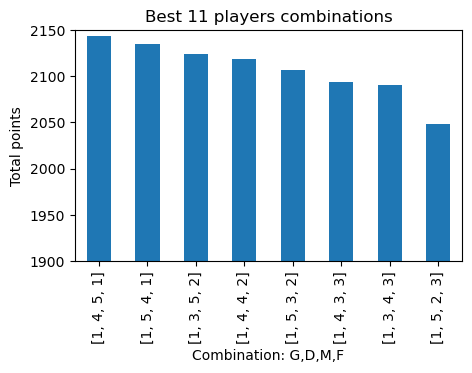

In [568]:
plt.figure(figsize=(5,3))
df_results_x.groupby('combination')['total_pts'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylim(1900,2150)
plt.xlabel('Combination: G,D,M,F')
plt.ylabel('Total points')
plt.title('Best 11 players combinations')
plt.show()

In [149]:
df_results_x[df_results_x['combination'] == '[1, 4, 5, 1]'].sort_values(by='total_pts', ascending=False)

,combination,web_name,position,total_pts,team_name,price
35,"[1, 4, 5, 1]",Salah,MID,265,LIV,125
42,"[1, 4, 5, 1]",Son,MID,258,TOT,100
37,"[1, 4, 5, 1]",Alexander-Arnold,DEF,208,LIV,75
43,"[1, 4, 5, 1]",Bowen,MID,206,WHU,65
38,"[1, 4, 5, 1]",Cancelo,DEF,201,MCI,60
36,"[1, 4, 5, 1]",Robertson,DEF,186,LIV,70
34,"[1, 4, 5, 1]",Maddison,MID,181,LEI,70
33,"[1, 4, 5, 1]",Saka,MID,179,ARS,65
39,"[1, 4, 5, 1]",Laporte,DEF,160,MCI,55
41,"[1, 4, 5, 1]",Lloris,GKP,158,TOT,55


In [150]:
df_results_x[df_results_x['combination'] == '[1, 4, 5, 1]'].sort_values(by='total_pts', ascending=False)['total_pts'].sum() + 265 # With Salah as Captain
# Midway between own performance (1990) and top managers (~2800)

2409

### CORRELATIONS AND KEY FEATURES <a name='eda_corr'/>
<a href=#top> Back to top <a>

In [152]:
feature_to_change = ['creativity','ep_next','ep_this','points_per_game','selected_by_percent','threat','value_form','value_season','ict_index','form','influence']
for f in feature_to_change:
    df_elements[f] = df_elements[f].astype(float)

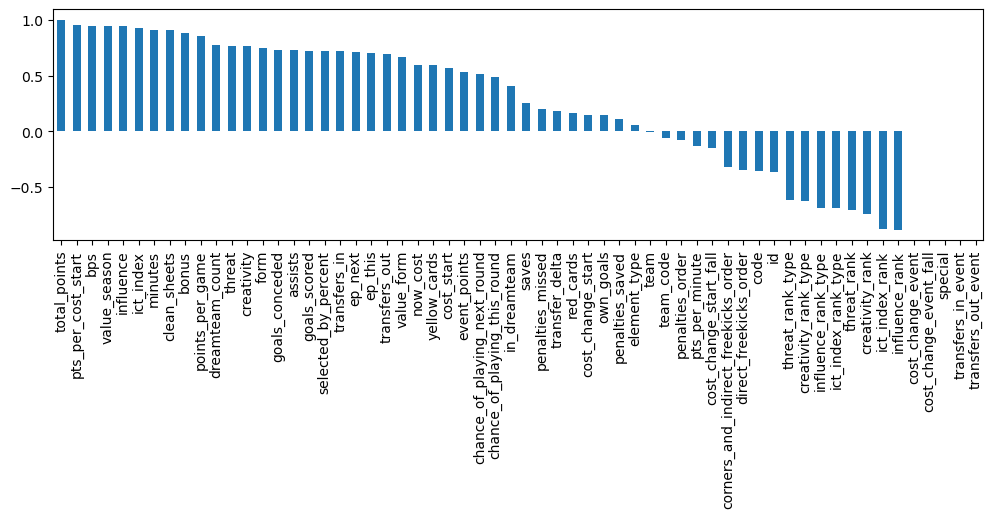

In [153]:
df_elements.corr().sort_values(by='total_points', ascending=False)['total_points'].plot(kind='bar', figsize=(12,3))
plt.xticks(rotation=90)
plt.show()
# checking which feature are more correlated to high total of points in the season so far

**Comments:**
* Highly positively correlated features (>0.5): influence, ict_index, minutes, clean_sheets, threat, creativity, goals_scored, assists, goals_conceded!
* Interesting correlation related to picks from managers: selected_by_percent, dreamteam_count, transfers_in, transfers_out!

***

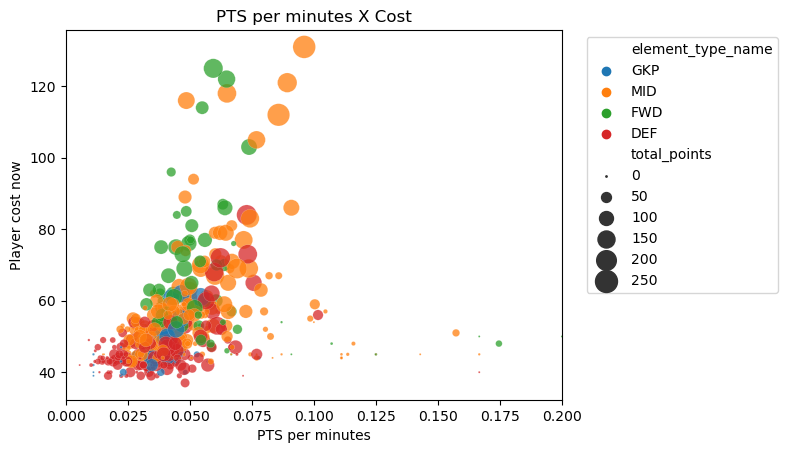

In [538]:
df_elements['points_per_min'] = df_elements['total_points'] / df_elements['minutes']
sns.scatterplot(x='points_per_min', y='now_cost', size='total_points', hue='element_type_name', palette='tab10', alpha=0.75, sizes=(0,df_elements['total_points'].max()),data=df_elements)
plt.xlabel('PTS per minutes')
plt.ylabel('Player cost now')
plt.xlim(left=0,right=0.2)
plt.title('PTS per minutes X Cost')
plt.legend(loc='upper right', bbox_to_anchor=(1.45,1))
plt.show()
# be careful as this is disadvantaging players playing more => not necessarly what we want

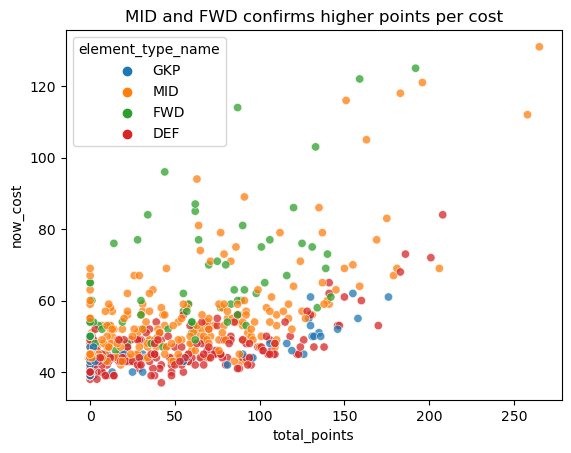

In [541]:
sns.scatterplot(x='total_points', y='now_cost', hue='element_type_name', palette='tab10', data=df_elements, alpha=0.75)
plt.title('MID and FWD confirms higher points per cost')
plt.show()

***

In [156]:
df_players_hist.groupby(['was_home'])[['total_points']].sum()
# testing if there is indeed points difference between home and away games

,total_points
was_home,
0,14952
1,16462


was_home           0           1        diff
count     737.000000  736.000000  736.000000
mean       20.287653   22.366848    2.051630
std        24.135797   26.480719   12.099589
min        -1.000000   -3.000000  -49.000000
25%         0.000000    0.000000   -1.000000
50%        11.000000   12.000000    0.000000
75%        34.000000   39.000000    5.000000
max       124.000000  153.000000   63.000000


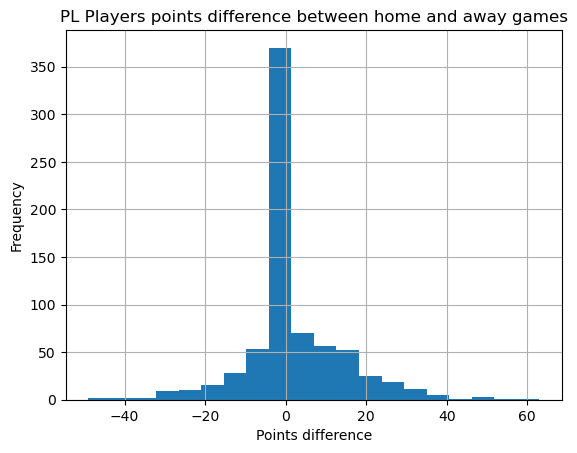

In [157]:
df_ha = df_players_hist.groupby(['element','was_home'])[['total_points']].sum().reset_index().pivot(index='element', columns='was_home', values='total_points')
df_ha['diff'] = df_ha[1] - df_ha[0]
df_ha['diff'].hist(bins=20)
print(df_ha.describe())
plt.title('PL Players points difference between home and away games')
plt.xlabel('Points difference')
plt.ylabel('Frequency')
plt.show()

**Comments:** There is indeed a minor difference between players performance in home and away games when looking at mean (22.4 vs 20.3) as well as distribution, especially higher percentiles (75% @ 39 vs 34)

***
***
## 3) Data preparation <a name='data_prep'/>
<a href=#top> Back to top <a>
* Feature engineering
* Feature encoding

In [158]:
# input and target features
# last 3 games stats (e.g.: 6,7,8)
# fixture info: home/away, difficulty score, ... (e.g.: 9)
# target: total points (e.g.: 9)

In [159]:
df_players_hist.head()

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out,element_type_name,team_name,web_name,team_strength,fixture_difficulty
0,1,1,3,1,0,2021-08-13T19:00:00Z,2,0,1,90,0,0,0,2,0,0,0,0,0,1,0,11,11.8,0.0,0.0,1.2,50,0,153122,0,0,GKP,ARS,Leno,4,2.0
1,1,18,6,2,1,2021-08-22T15:30:00Z,0,2,2,90,0,0,0,2,0,0,0,0,0,3,0,17,24.2,0.0,0.0,2.4,50,-25816,144885,2627,28443,GKP,ARS,Leno,4,4.0
2,1,24,12,1,0,2021-08-28T11:30:00Z,5,0,3,90,0,0,0,5,0,0,0,0,0,5,0,20,43.0,0.0,0.0,4.3,49,-14559,136757,5164,19723,GKP,ARS,Leno,4,5.0
3,1,31,15,0,1,2021-09-11T14:00:00Z,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,49,6564,153130,35360,28796,GKP,ARS,Leno,4,2.0
4,1,43,5,0,0,2021-09-18T14:00:00Z,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,49,-23847,129851,4822,28669,GKP,ARS,Leno,4,2.0


In [160]:
df_players_hist['round'].max() - 3
# potentially round is misleading as could have double gameweeks (or no data, but this would have less impact)

35

In [161]:
df_players_hist[(df_players_hist['web_name'] == 'Salah') & (df_players_hist['round'] == 26)]
# can have multiple games per round

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out,element_type_name,team_name,web_name,team_strength,fixture_difficulty
8839,233,256,15,10,1,2022-02-19T15:00:00Z,3,1,26,90,1,0,0,1,0,0,0,0,0,0,3,34,48.2,69.3,109.0,22.7,131,1256075,5419768,1263924,7849,MID,LIV,Salah,5,2.0
8840,233,184,10,18,1,2022-02-23T19:45:00Z,6,0,26,90,2,1,1,0,0,0,0,0,0,0,2,54,87.6,22.0,89.0,19.9,131,1256075,5419768,1263924,7849,MID,LIV,Salah,5,2.0


In [162]:
df_players_hist[(df_players_hist['web_name'] == 'Schmeichel') & (df_players_hist['round'] == 18)]
# ...or no games

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out,element_type_name,team_name,web_name,team_strength,fixture_difficulty


#### FEATURE ENGINEERING <a name='data_prep_eng'/>
<a href=#top> Back to top <a>

In this case most of the feature engineering has already been done in EDA section. The below part is more related to transformating the data in the right forward to be used in the model. More precisely we are planning on using performance of main features over last X games to predict number of points in following week.

In [163]:
df_players_hist['cards'] = df_players_hist['red_cards']*2 + df_players_hist['yellow_cards']
df_players_hist['total_points_max'] = df_players_hist['total_points']

In [164]:
# proof of concept with single game week
# not selecting very skewed features likt 'own_goals' or 'penalties_missed'
gameweeks = 3
last_games = df_players_hist[df_players_hist['round'] >= (df_players_hist['round'].max() - gameweeks)] # e.g.: gameweeks 36,36,37,38
target_gameweek = last_games[last_games['round'] == 38][['round','element','was_home','total_points','element_type_name','fixture_difficulty','team_strength']] # replaced team name by team strengh to have less bucket and have continuious variable
features = ['total_points','goals_scored','assists','bonus','bps','minutes','clean_sheets','saves','goals_conceded','ict_index','influence','creativity','threat','penalties_saved','cards','selected','transfers_balance','value','fixture_difficulty']
# input_gameweeks = last_games.groupby('element')[features].mean().reset_index()
input_gameweeks = last_games.groupby('element').agg({'total_points':'max',
                                                               'goals_scored':'max',
                                                               'assists':'max',
                                                               'bonus':'max',
                                                               'bps':'max',
                                                               'minutes':'mean',
                                                               'clean_sheets':'mean',
                                                               'saves':'max',
                                                               'goals_conceded':'mean',
                                                               'ict_index':'max',
                                                               'influence':'max',
                                                               'creativity':'max',
                                                               'threat':'max',
                                                               'penalties_saved':'max',
                                                               'cards':'max',
                                                               'selected':'mean',
                                                               'transfers_balance':'mean',
                                                               'value':'max',
                                                               'fixture_difficulty':'mean'}).reset_index()
df_ml_features = pd.merge(left=input_gameweeks, right=target_gameweek,  how='inner', on='element')
print(df_ml_features.shape)
df_ml_features.head()

(737, 26)


,element,total_points_x,goals_scored,assists,bonus,bps,minutes,clean_sheets,saves,goals_conceded,ict_index,influence,creativity,threat,penalties_saved,cards,selected,transfers_balance,value,fixture_difficulty_x,round,was_home,total_points_y,element_type_name,fixture_difficulty_y,team_strength
0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,77934.6,-760.4,45,2.8,38,1,0,GKP,2.0,4
1,2,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,47741.6,-309.2,40,2.8,38,1,0,GKP,2.0,4
2,3,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,6715.4,-6.8,63,2.8,38,1,0,MID,2.0,4
3,4,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,112833.2,-448.4,96,2.8,38,1,0,FWD,2.0,4
4,5,14,1,1,3,40,66.6,0.0,0,1.4,5.7,20.8,27.9,8.0,0,0,38861.6,-1726.0,42,2.8,38,1,14,DEF,2.0,4


In [165]:
gameweeks = 3  # rounds to avoid double gameweeks issue at this stage
features_past_gameweeks = ['total_points','goals_scored','assists','bonus','bps','minutes','clean_sheets','saves','goals_conceded','ict_index','influence','creativity','threat','penalties_saved','cards','selected','transfers_balance','value','fixture_difficulty']
features_target_gameweek = ['element','web_name','round','was_home','element_type_name','fixture_difficulty','team_name','team_strength','total_points']

loop = 0
for g in np.arange(1+gameweeks,df_players_hist['round'].max()+1): # will create prediction for each gameweeks after gameweek 4 as we need 3 gameweek for input
    print('Gameweek',g)
    df_gameweeks = df_players_hist[((df_players_hist['round'] >= (g - gameweeks)) & (df_players_hist['round'] <= g))]
    target_gameweek = df_gameweeks[df_gameweeks['round'] == g][features_target_gameweek]
    # input_gameweeks = df_gameweeks[~(df_gameweeks['round'] == g)].groupby('element')[features_past_gameweeks].mean().reset_index() # discussion on whether shall use mean or max (to better represent potential)
    input_gameweeks = df_gameweeks[~(df_gameweeks['round'] == g)].groupby('element').agg({'total_points':'mean',
                                                               'total_points_max':'max',
                                                               'goals_scored':'max',
                                                               'assists':'max',
                                                               'bonus':'max',
                                                               'bps':'max',
                                                               'minutes':'mean',
                                                               'clean_sheets':'mean',
                                                               'saves':'max',
                                                               'goals_conceded':'mean',
                                                               'ict_index':'max',
                                                               'influence':'max',
                                                               'creativity':'max',
                                                               'threat':'max',
                                                               'penalties_saved':'max',
                                                               'cards':'max',
                                                               'selected':'mean',
                                                               'transfers_balance':'mean',
                                                               'value':'max',
                                                               'fixture_difficulty':'mean'}).reset_index()
    df_ml_features = pd.merge(left=input_gameweeks, right=target_gameweek,  how='inner', on='element').rename(columns={'total_points_max':'total_points_max_x'})
    if loop == 0:
        df_ml = df_ml_features
        loop = loop + 1
    elif loop > 0:
        df_ml = pd.concat([df_ml,df_ml_features])
    print(df_ml.shape)

Gameweek 4
(577, 29)
Gameweek 5
(1176, 29)
Gameweek 6
(1782, 29)
Gameweek 7
(2393, 29)
Gameweek 8
(3006, 29)
Gameweek 9
(3623, 29)
Gameweek 10
(4241, 29)
Gameweek 11
(4864, 29)
Gameweek 12
(5488, 29)
Gameweek 13
(6060, 29)
Gameweek 14
(6693, 29)
Gameweek 15
(7329, 29)
Gameweek 16
(7905, 29)
Gameweek 17
(8356, 29)
Gameweek 18
(8613, 29)
Gameweek 19
(9059, 29)
Gameweek 20
(9445, 29)
Gameweek 21
(10082, 29)
Gameweek 22
(10830, 29)
Gameweek 23
(11592, 29)
Gameweek 24
(12219, 29)
Gameweek 25
(12916, 29)
Gameweek 26
(13914, 29)
Gameweek 27
(14543, 29)
Gameweek 28
(15552, 29)
Gameweek 29
(16493, 29)
Gameweek 30
(16785, 29)
Gameweek 31
(17571, 29)
Gameweek 32
(18291, 29)
Gameweek 33
(19139, 29)
Gameweek 34
(19929, 29)
Gameweek 35
(20657, 29)
Gameweek 36
(21848, 29)
Gameweek 37
(22726, 29)
Gameweek 38
(23462, 29)


In [166]:
df_ml.head()

,element,total_points_x,total_points_max_x,goals_scored,assists,bonus,bps,minutes,clean_sheets,saves,goals_conceded,ict_index,influence,creativity,threat,penalties_saved,cards,selected,transfers_balance,value,fixture_difficulty_x,web_name,round,was_home,element_type_name,fixture_difficulty_y,team_name,team_strength,total_points_y
0,1,1.333333,2,0,0,0,20,90.0,0.0,5,3.000000,4.3,43.0,0.0,0.0,0,0,144921.333333,-13458.333333,50,3.666667,Leno,4,1,GKP,2.0,ARS,4,0
1,2,0.000000,0,0,0,0,0,0.0,0.0,0,0.000000,0.0,0.0,0.0,0.0,0,0,100575.666667,-629.666667,40,3.666667,Rúnarsson,4,1,GKP,2.0,ARS,4,0
2,3,0.000000,0,0,0,0,0,0.0,0.0,0,0.000000,0.0,0.0,0.0,0.0,0,0,17781.000000,-4362.000000,65,3.666667,Willian,4,1,MID,2.0,ARS,4,0
3,4,0.666667,1,0,0,0,5,29.0,0.0,0,1.333333,2.5,5.0,1.4,19.0,0,0,129206.333333,-39037.333333,100,3.666667,Aubameyang,4,1,FWD,2.0,ARS,4,9
4,5,0.000000,1,0,0,0,15,60.0,0.0,0,2.333333,3.8,17.0,20.8,0.0,0,1,17466.333333,-1338.666667,45,3.666667,Cédric,4,1,DEF,2.0,ARS,4,1


In [167]:
df_ml.reset_index(inplace=True, drop=True)
# reset index to get single index

In [168]:
df_ml = df_ml[['web_name','element','team_name','element_type_name','value','total_points_x','total_points_max_x','total_points_y',\
       'minutes','goals_scored','assists','bonus','bps','clean_sheets','penalties_saved','goals_conceded','saves',\
       'ict_index','influence','creativity','threat','fixture_difficulty_x',\
       'cards','selected','transfers_balance',\
       'was_home','fixture_difficulty_y','team_strength','round']]

In [169]:
df_ml[df_ml['element'] == 200].head()

,web_name,element,team_name,element_type_name,value,total_points_x,total_points_max_x,total_points_y,minutes,goals_scored,assists,bonus,bps,clean_sheets,penalties_saved,goals_conceded,saves,ict_index,influence,creativity,threat,fixture_difficulty_x,cards,selected,transfers_balance,was_home,fixture_difficulty_y,team_strength,round
199,Schmeichel,200,LEI,GKP,50,4.333333,9,4,90.0,0,0,2,31,0.333333,0,1.666667,3,2.6,26.0,0.0,0.0,2.666667,0,1.368671e+06,38118.000000,1,5.0,3,4
776,Schmeichel,200,LEI,GKP,50,2.666667,4,2,90.0,0,0,0,24,0.000000,0,2.000000,7,5.8,58.0,0.0,0.0,3.333333,0,1.504324e+06,24380.333333,0,2.0,3,5
1375,Schmeichel,200,LEI,GKP,50,3.000000,4,1,90.0,0,0,0,24,0.000000,0,1.333333,7,5.8,58.0,0.0,0.0,3.000000,0,1.553720e+06,10768.666667,1,2.0,3,6
1981,Schmeichel,200,LEI,GKP,51,2.333333,4,1,90.0,0,0,0,24,0.000000,0,1.666667,7,5.8,58.0,0.0,0.0,3.000000,0,1.594943e+06,12700.333333,0,2.0,3,7
2592,Schmeichel,200,LEI,GKP,51,1.333333,2,2,90.0,0,0,0,14,0.000000,0,2.000000,3,2.3,22.6,0.0,0.0,2.000000,0,1.611618e+06,666.000000,1,3.0,3,8


In [170]:
df_ml['total_points_max_x'].describe()

count    23462.000000
mean         2.286804
std          3.457569
min         -3.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         24.000000
Name: total_points_max_x, dtype: float64

In [171]:
df_ml[df_ml['total_points_max_x'] < 0]
# for leicester it is an edge case where they had only 1 game in previoius 3 rounds and did bad

,web_name,element,team_name,element_type_name,value,total_points_x,total_points_max_x,total_points_y,minutes,goals_scored,assists,bonus,bps,clean_sheets,penalties_saved,goals_conceded,saves,ict_index,influence,creativity,threat,fixture_difficulty_x,cards,selected,transfers_balance,was_home,fixture_difficulty_y,team_strength,round
9148,Schmeichel,200,LEI,GKP,48,-1.0,-1,15,90.0,0,0,0,8,0.0,0,6.0,2,1.1,11.0,0.0,0.0,5.0,0,1075203.0,-15057.0,1,4.0,3,20
9156,Amartey,208,LEI,DEF,38,-1.0,-1,8,90.0,0,0,0,16,0.0,0,6.0,0,2.4,23.8,0.1,0.0,5.0,0,802598.0,-13936.0,1,4.0,3,20
9167,Thomas,219,LEI,DEF,43,-1.0,-1,6,90.0,0,0,0,10,0.0,0,6.0,0,2.9,15.8,10.7,2.0,5.0,0,49255.0,755.0,1,4.0,3,20
9262,Vestergaard,340,LEI,DEF,47,-2.0,-2,0,90.0,0,0,0,12,0.0,0,6.0,0,2.1,21.2,0.2,0.0,5.0,1,41942.0,-819.0,1,4.0,3,20
9571,Mee,106,BUR,DEF,48,-1.0,-1,1,90.0,0,0,0,9,0.0,0,3.0,0,2.4,15.8,0.8,7.0,4.0,0,43327.0,45.0,0,2.0,2,21
9641,Koch,194,LEE,DEF,43,-1.0,-1,2,90.0,0,0,0,5,0.0,0,4.0,0,0.7,7.0,0.3,0.0,4.0,1,8146.0,127.0,1,2.0,3,21
10852,Gabriel,23,ARS,DEF,53,-3.0,-3,6,58.0,0,0,0,-1,0.0,0,2.0,0,0.2,1.6,0.2,0.0,5.0,2,531758.0,2892.0,1,2.0,4,23
17096,Maguire,273,MUN,DEF,54,-1.0,-1,2,90.0,0,0,0,11,0.0,0,3.0,0,2.5,23.8,0.9,0.0,4.0,1,428228.0,-20462.0,1,2.0,4,31


In [172]:
df_ml['total_points_max_x'] = df_ml['total_points_max_x'].apply(lambda x: 0 if x < 0 else x)
df_ml['total_points_x'] = df_ml['total_points_x'].apply(lambda x: 0 if x < 0 else x)

In [173]:
df_ml['total_points_x'].describe()

count    23462.000000
mean         1.229102
std          1.872990
min          0.000000
25%          0.000000
50%          0.250000
75%          2.000000
max         16.666667
Name: total_points_x, dtype: float64

#### FEATURE ENCODING <a name='data_prep_enc'/>
<a href=#top> Back to top <a>

In [174]:
# df_ml_encoded = pd.get_dummies(df_ml, columns=['was_home','element_type_name','team_name']) # removed 'element'
df_ml_encoded_type = pd.get_dummies(df_ml, columns=['was_home'], drop_first=True) # removed 'element' and 'element_type_name' | 'team_name' replaced by 'team_strength'

In [175]:
df_ml_encoded_type.head()

,web_name,element,team_name,element_type_name,value,total_points_x,total_points_max_x,total_points_y,minutes,goals_scored,assists,bonus,bps,clean_sheets,penalties_saved,goals_conceded,saves,ict_index,influence,creativity,threat,fixture_difficulty_x,cards,selected,transfers_balance,fixture_difficulty_y,team_strength,round,was_home_1
0,Leno,1,ARS,GKP,50,1.333333,2,0,90.0,0,0,0,20,0.0,0,3.000000,5,4.3,43.0,0.0,0.0,3.666667,0,144921.333333,-13458.333333,2.0,4,4,1
1,Rúnarsson,2,ARS,GKP,40,0.000000,0,0,0.0,0,0,0,0,0.0,0,0.000000,0,0.0,0.0,0.0,0.0,3.666667,0,100575.666667,-629.666667,2.0,4,4,1
2,Willian,3,ARS,MID,65,0.000000,0,0,0.0,0,0,0,0,0.0,0,0.000000,0,0.0,0.0,0.0,0.0,3.666667,0,17781.000000,-4362.000000,2.0,4,4,1
3,Aubameyang,4,ARS,FWD,100,0.666667,1,9,29.0,0,0,0,5,0.0,0,1.333333,0,2.5,5.0,1.4,19.0,3.666667,0,129206.333333,-39037.333333,2.0,4,4,1
4,Cédric,5,ARS,DEF,45,0.000000,1,1,60.0,0,0,0,15,0.0,0,2.333333,0,3.8,17.0,20.8,0.0,3.666667,1,17466.333333,-1338.666667,2.0,4,4,1


In [176]:
df_ml_encoded_type.columns

Index(['web_name', 'element', 'team_name', 'element_type_name', 'value',
       'total_points_x', 'total_points_max_x', 'total_points_y', 'minutes',
       'goals_scored', 'assists', 'bonus', 'bps', 'clean_sheets',
       'penalties_saved', 'goals_conceded', 'saves', 'ict_index', 'influence',
       'creativity', 'threat', 'fixture_difficulty_x', 'cards', 'selected',
       'transfers_balance', 'fixture_difficulty_y', 'team_strength', 'round',
       'was_home_1'],
      dtype='object')

In [177]:
df_ml_encoded_type.shape

(23462, 29)

#### BASELINE - rolling last 3 gameweeks <a name='data_prep_base'/>
<a href=#top> Back to top <a>

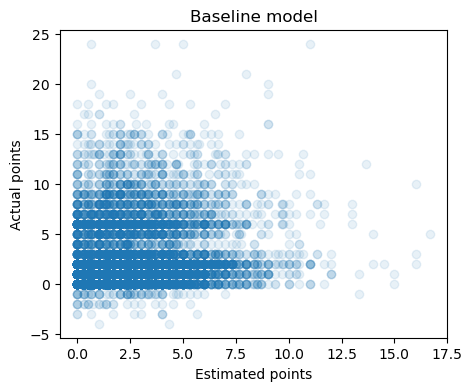

In [546]:
# plt.scatter(df_ml['total_points_x'] / gameweeks, df_ml['total_points_y'])
plt.figure(figsize=(5,4))
plt.scatter(df_ml['total_points_x'], df_ml['total_points_y'], alpha=0.1)
plt.title('Baseline model')
plt.xlabel('Estimated points')
plt.ylabel('Actual points')
#plt.xlim(0,25)
plt.show()

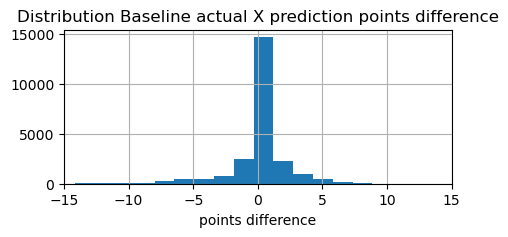

In [548]:
# ((df_ml['total_points_x'] / 3) - df_ml['total_points_y']).hist(bins=20)
plt.figure(figsize=(5,2))
(df_ml['total_points_x'] - df_ml['total_points_y']).hist(bins=25)
plt.title('Distribution Baseline actual X prediction points difference')
plt.xlabel('points difference')
plt.xlim((-15,15))
plt.show()

In [180]:
# print('Baseline - rolling last 3 gameweeks - MSE: {:.2f}'.format(mse(y_true=df_ml['total_points_y'], y_pred=df_ml['total_points_x'] / 3)))
# print('Baseline - rolling last 3 gameweeks - RMSE: {:.2f}'.format(np.sqrt(mse(y_true=df_ml['total_points_y'], y_pred=df_ml['total_points_x'] / 3))))
print('Baseline - rolling last 3 gameweeks - MSE: {:.2f}'.format(mse(y_true=df_ml['total_points_y'], y_pred=df_ml['total_points_x'])))
print('Baseline - rolling last 3 gameweeks - RMSE: {:.2f}'.format(np.sqrt(mse(y_true=df_ml['total_points_y'], y_pred=df_ml['total_points_x']))))
base_full_mse = mse(y_true=df_ml['total_points_y'], y_pred=df_ml['total_points_x'])
base_full_rmse = np.sqrt(mse(y_true=df_ml['total_points_y'], y_pred=df_ml['total_points_x']))
# on full set

Baseline - rolling last 3 gameweeks - MSE: 5.54
Baseline - rolling last 3 gameweeks - RMSE: 2.35


In [181]:
# diff_base = df_ml['total_points_y'] - (df_ml['total_points_x'] / 3)
diff_base_max = df_ml['total_points_max_x'] - (df_ml['total_points_y'])
diff_base = df_ml['total_points_x'] - (df_ml['total_points_y'])

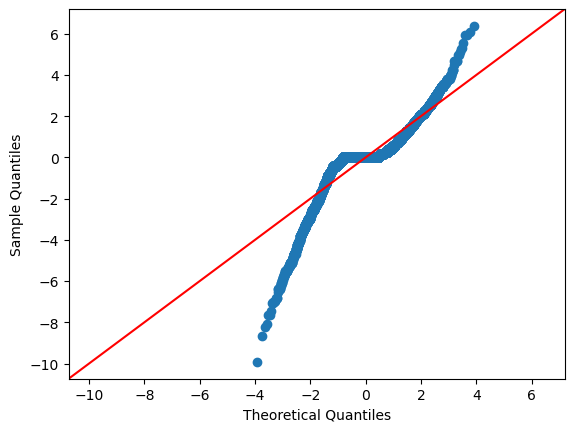

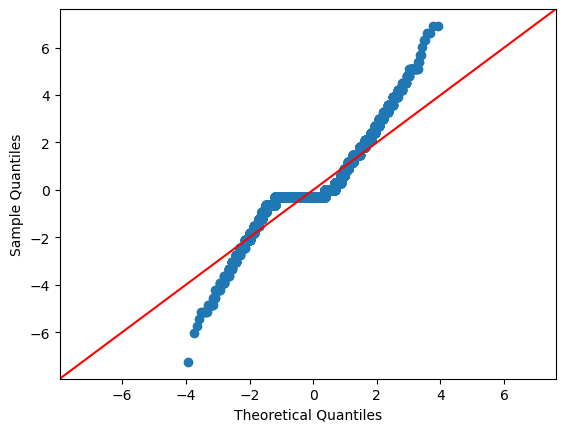

In [552]:
import statsmodels.api as sm
sm.qqplot(diff_base,fit=True,line='45')
sm.qqplot(diff_base_max,fit=True,line='45')
plt.show()
# we are doing a bad job a extreme value on both ends

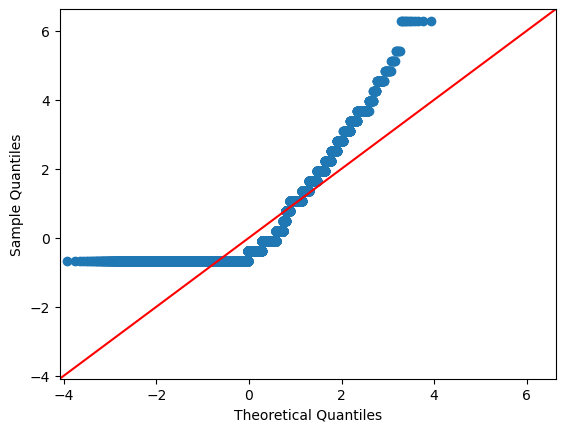

In [183]:
sm.qqplot(df_ml['total_points_max_x'], fit=True, line='45')
plt.show()
# typical of skewed right distribution (many players with 0)

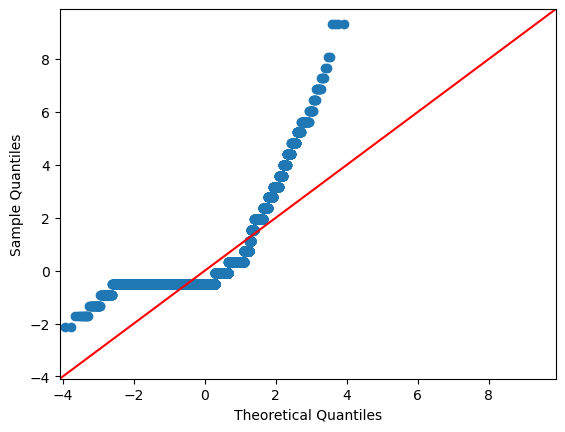

In [184]:
sm.qqplot(df_ml['total_points_y'], fit=True, line='45')
plt.show()
# typical of skewed right distribution (many players with 0)

In [185]:
df_ml.head()

,web_name,element,team_name,element_type_name,value,total_points_x,total_points_max_x,total_points_y,minutes,goals_scored,assists,bonus,bps,clean_sheets,penalties_saved,goals_conceded,saves,ict_index,influence,creativity,threat,fixture_difficulty_x,cards,selected,transfers_balance,was_home,fixture_difficulty_y,team_strength,round
0,Leno,1,ARS,GKP,50,1.333333,2,0,90.0,0,0,0,20,0.0,0,3.000000,5,4.3,43.0,0.0,0.0,3.666667,0,144921.333333,-13458.333333,1,2.0,4,4
1,Rúnarsson,2,ARS,GKP,40,0.000000,0,0,0.0,0,0,0,0,0.0,0,0.000000,0,0.0,0.0,0.0,0.0,3.666667,0,100575.666667,-629.666667,1,2.0,4,4
2,Willian,3,ARS,MID,65,0.000000,0,0,0.0,0,0,0,0,0.0,0,0.000000,0,0.0,0.0,0.0,0.0,3.666667,0,17781.000000,-4362.000000,1,2.0,4,4
3,Aubameyang,4,ARS,FWD,100,0.666667,1,9,29.0,0,0,0,5,0.0,0,1.333333,0,2.5,5.0,1.4,19.0,3.666667,0,129206.333333,-39037.333333,1,2.0,4,4
4,Cédric,5,ARS,DEF,45,0.000000,1,1,60.0,0,0,0,15,0.0,0,2.333333,0,3.8,17.0,20.8,0.0,3.666667,1,17466.333333,-1338.666667,1,2.0,4,4


***
***
## 4) Modelling <a name='model'/>
<a href=#top> Back to top <a>

### MIDFIELDERS <a name='model_mid'/>
<a href=#top> Back to top <a>

In [186]:
df_ml_mid = df_ml_encoded_type[df_ml_encoded_type['element_type_name'] == 'MID']
df_ml_mid.shape

(9694, 29)

In [187]:
df_ml_mid.head()
# keep same index as df_ml

,web_name,element,team_name,element_type_name,value,total_points_x,total_points_max_x,total_points_y,minutes,goals_scored,assists,bonus,bps,clean_sheets,penalties_saved,goals_conceded,saves,ict_index,influence,creativity,threat,fixture_difficulty_x,cards,selected,transfers_balance,fixture_difficulty_y,team_strength,round,was_home_1
2,Willian,3,ARS,MID,65,0.000000,0,0,0.000000,0,0,0,0,0.0,0,0.000000,0,0.0,0.0,0.0,0.0,3.666667,0,17781.000000,-4362.000000,2.0,4,4,1
6,Xhaka,7,ARS,MID,50,0.666667,2,0,71.333333,0,0,0,13,0.0,0,3.000000,0,4.8,18.0,26.0,5.0,3.666667,2,67392.000000,-4615.333333,2.0,4,4,1
11,Elneny,12,ARS,MID,45,0.333333,1,0,15.000000,0,0,0,2,0.0,0,0.666667,0,0.4,3.4,0.3,0.0,3.666667,0,46247.666667,-3097.666667,2.0,4,4,1
12,Maitland-Niles,13,ARS,MID,55,0.333333,1,3,6.333333,0,0,0,3,0.0,0,0.333333,0,0.1,0.4,0.1,0.0,3.666667,0,5896.000000,-737.333333,2.0,4,4,1
14,Partey,15,ARS,MID,50,0.000000,0,0,0.000000,0,0,0,0,0.0,0,0.000000,0,0.0,0.0,0.0,0.0,3.666667,0,4361.666667,-594.000000,2.0,4,4,1


#### Baseline - rolling last 3 gameweeks

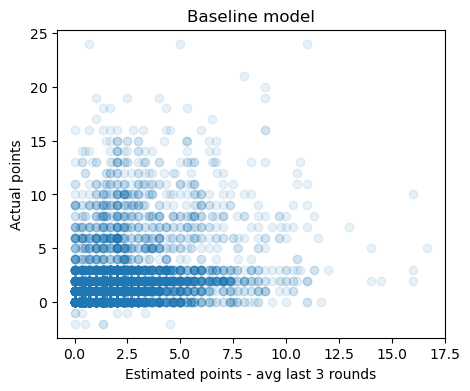

In [553]:
# plt.scatter(df_ml['total_points_x'] / gameweeks, df_ml['total_points_y'])
plt.figure(figsize=(5,4))
plt.scatter(df_ml_mid['total_points_x'], df_ml_mid['total_points_y'], alpha=0.1)
plt.title('Baseline model')
plt.xlabel('Estimated points - avg last 3 rounds')
plt.ylabel('Actual points')
#plt.xlim(0,25)
plt.show()

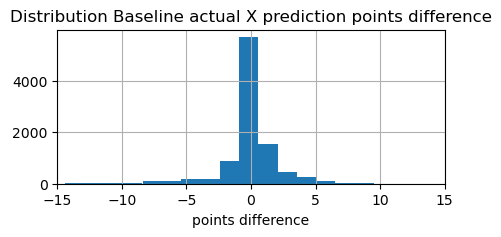

In [554]:
# ((df_ml['total_points_x'] / 3) - df_ml['total_points_y']).hist(bins=20)
plt.figure(figsize=(5,2))
(df_ml_mid['total_points_x'] - df_ml_mid['total_points_y']).hist(bins=25)
plt.title('Distribution Baseline actual X prediction points difference')
plt.xlabel('points difference')
plt.xlim((-15,15))
plt.show()

In [190]:
# print('Baseline - rolling last 3 gameweeks - MSE: {:.2f}'.format(mse(y_true=df_ml['total_points_y'], y_pred=df_ml['total_points_x'] / 3)))
# print('Baseline - rolling last 3 gameweeks - RMSE: {:.2f}'.format(np.sqrt(mse(y_true=df_ml['total_points_y'], y_pred=df_ml['total_points_x'] / 3))))
print('Baseline - rolling last 3 gameweeks - MSE: {:.2f}'.format(mse(y_true=df_ml_mid['total_points_y'], y_pred=df_ml_mid['total_points_x'])))
print('Baseline - rolling last 3 gameweeks - RMSE: {:.2f}'.format(np.sqrt(mse(y_true=df_ml_mid['total_points_y'], y_pred=df_ml_mid['total_points_x']))))
base_mid_full_mse = mse(y_true=df_ml_mid['total_points_y'], y_pred=df_ml_mid['total_points_x'])
base_mid_full_rmse = np.sqrt(mse(y_true=df_ml_mid['total_points_y'], y_pred=df_ml_mid['total_points_x']))
# on full set

Baseline - rolling last 3 gameweeks - MSE: 5.48
Baseline - rolling last 3 gameweeks - RMSE: 2.34


In [191]:
# diff_base = df_ml['total_points_y'] - (df_ml['total_points_x'] / 3)
diff_base_mid = df_ml_mid['total_points_x'] - (df_ml_mid['total_points_y'])
diff_base_mid_max = df_ml_mid['total_points_max_x'] - (df_ml_mid['total_points_y'])

In [192]:
base_mid_max = df_ml_mid['total_points_x'].max()

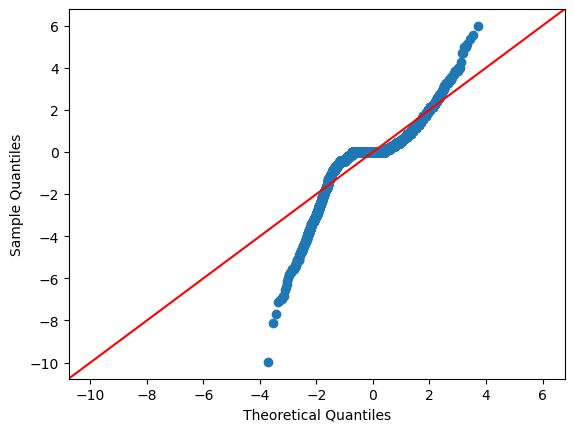

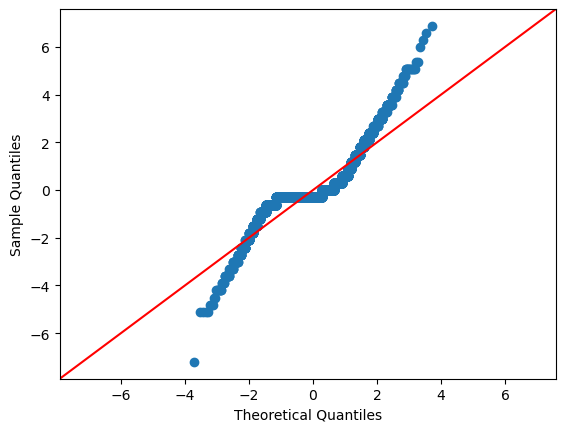

In [193]:
import statsmodels.api as sm
sm.qqplot(diff_base_mid,fit=True,line='45')
sm.qqplot(diff_base_mid_max,fit=True,line='45')
plt.show()
# we are doing a bad job a extreme value on both ends, especially situation where actual score much better than prediction

In [194]:
diff_base_mid.sort_values().head(10)

3143    -23.333333
21072   -19.000000
13237   -18.000000
13243   -16.666667
17708   -16.500000
14864   -16.333333
7516    -16.000000
8885    -16.000000
8091    -15.333333
18573   -15.000000
dtype: float64

In [195]:
diff_base_mid_max.sort_values().head()

3143    -23
7516    -16
13237   -16
8885    -16
17708   -16
dtype: int64

In [196]:
df_ml_mid[df_ml_mid.index == 3143]

,web_name,element,team_name,element_type_name,value,total_points_x,total_points_max_x,total_points_y,minutes,goals_scored,assists,bonus,bps,clean_sheets,penalties_saved,goals_conceded,saves,ict_index,influence,creativity,threat,fixture_difficulty_x,cards,selected,transfers_balance,fixture_difficulty_y,team_strength,round,was_home_1
3143,Mount,138,CHE,MID,74,0.666667,1,24,16.666667,0,0,0,7,0.0,0,0.0,0,5.9,10.4,27.5,21.0,3.0,0,779544.666667,-147101.666667,2.0,4,9,1


In [197]:
df_players_hist[df_players_hist['element'] == 138].sort_values(by='round')[4:12]

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out,element_type_name,team_name,web_name,team_strength,fixture_difficulty,cards,total_points_max
5210,138,48,17,1,0,2021-09-19T15:30:00Z,0,3,5,45,0,0,0,0,0,0,0,0,0,0,0,3,1.2,1.8,38.0,4.1,74,-243917,1155080,33910,277827,MID,CHE,Mount,4,4.0,0,1
5211,138,53,12,0,1,2021-09-25T11:30:00Z,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,74,-305307,858536,17365,322672,MID,CHE,Mount,4,5.0,0,0
5212,138,63,16,1,1,2021-10-02T14:00:00Z,3,1,7,25,0,0,0,0,0,0,0,0,0,0,0,7,10.4,27.5,21.0,5.9,74,-129599,738103,23380,152979,MID,CHE,Mount,4,2.0,0,1
5213,138,73,3,1,0,2021-10-16T16:30:00Z,0,1,8,25,0,0,0,0,0,0,0,0,0,0,0,4,7.0,1.0,6.0,1.4,74,-6399,741995,51906,58305,MID,CHE,Mount,4,2.0,0,1
5214,138,84,15,24,1,2021-10-23T11:30:00Z,7,0,9,90,3,1,1,0,0,0,0,0,0,0,3,80,123.8,41.3,61.0,22.6,74,15436,762255,62304,46868,MID,CHE,Mount,4,2.0,0,24
5215,138,96,14,0,0,2021-10-30T14:00:00Z,0,3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,76,773256,1594355,795302,22046,MID,CHE,Mount,4,3.0,0,0
5216,138,104,5,1,1,2021-11-06T15:00:00Z,1,1,11,5,0,0,0,0,0,0,0,0,0,0,0,4,2.2,18.3,0.0,2.1,76,-189176,1366777,74614,263790,MID,CHE,Mount,4,2.0,0,1
5217,138,113,9,3,0,2021-11-20T12:30:00Z,0,3,12,61,0,0,1,0,0,0,0,0,0,0,0,5,2.0,2.6,1.0,0.6,75,-152577,1224734,60849,213426,MID,CHE,Mount,4,3.0,0,3


#### Data Preparation - Midfielders

In [198]:
df_ml_mid.head()

,web_name,element,team_name,element_type_name,value,total_points_x,total_points_max_x,total_points_y,minutes,goals_scored,assists,bonus,bps,clean_sheets,penalties_saved,goals_conceded,saves,ict_index,influence,creativity,threat,fixture_difficulty_x,cards,selected,transfers_balance,fixture_difficulty_y,team_strength,round,was_home_1
2,Willian,3,ARS,MID,65,0.000000,0,0,0.000000,0,0,0,0,0.0,0,0.000000,0,0.0,0.0,0.0,0.0,3.666667,0,17781.000000,-4362.000000,2.0,4,4,1
6,Xhaka,7,ARS,MID,50,0.666667,2,0,71.333333,0,0,0,13,0.0,0,3.000000,0,4.8,18.0,26.0,5.0,3.666667,2,67392.000000,-4615.333333,2.0,4,4,1
11,Elneny,12,ARS,MID,45,0.333333,1,0,15.000000,0,0,0,2,0.0,0,0.666667,0,0.4,3.4,0.3,0.0,3.666667,0,46247.666667,-3097.666667,2.0,4,4,1
12,Maitland-Niles,13,ARS,MID,55,0.333333,1,3,6.333333,0,0,0,3,0.0,0,0.333333,0,0.1,0.4,0.1,0.0,3.666667,0,5896.000000,-737.333333,2.0,4,4,1
14,Partey,15,ARS,MID,50,0.000000,0,0,0.000000,0,0,0,0,0.0,0,0.000000,0,0.0,0.0,0.0,0.0,3.666667,0,4361.666667,-594.000000,2.0,4,4,1


In [199]:
round(df_ml_mid.corr()['total_points_y'].sort_values(ascending=False),3)

total_points_y          1.000
ict_index               0.465
minutes                 0.461
total_points_x          0.444
bps                     0.430
creativity              0.414
threat                  0.412
influence               0.412
total_points_max_x      0.410
value                   0.362
clean_sheets            0.330
selected                0.313
goals_conceded          0.293
goals_scored            0.285
bonus                   0.260
assists                 0.248
cards                   0.181
team_strength           0.134
transfers_balance       0.093
was_home_1              0.013
fixture_difficulty_x   -0.001
round                  -0.029
fixture_difficulty_y   -0.060
element                -0.136
penalties_saved           NaN
saves                     NaN
Name: total_points_y, dtype: float64

In [200]:
round(df_ml_mid.skew().sort_values(ascending=False).head(),3)
# was able to significantly remove skew by removing features like 'own_goals','red_cards','penalties_missed'

C:\Users\glaurent\AppData\Local\Temp\ipykernel_17144\2772444049.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  round(df_ml_mid.skew().sort_values(ascending=False).head(),3)


selected          6.524
total_points_y    3.245
goals_scored      3.154
assists           3.061
bonus             3.052
dtype: float64

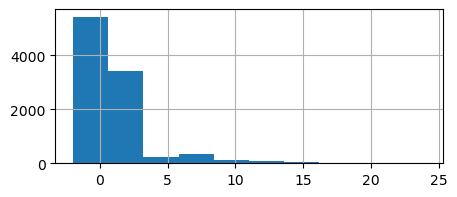

In [555]:
# target variable exploration
plt.figure(figsize=(5,2))
df_ml_mid['total_points_y'].hist()
plt.show()

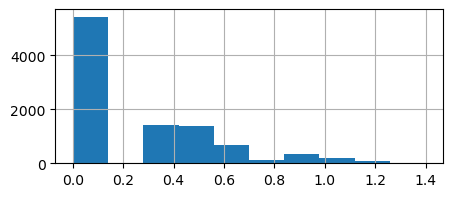

In [556]:
# log transformation to deal with skew...but still skewed as many of 0
plt.figure(figsize=(5,2))
np.log10(df_ml_mid['total_points_y'].apply(lambda x: 1 if x < 1 else x + 1)).hist(bins=10)
plt.show()

In [203]:
df_ml_mid['total_points_y_log'] = np.log10(df_ml_mid['total_points_y'].apply(lambda x: 1 if x < 1 else x + 1)) # log can only deal with positive numbers

C:\Users\glaurent\AppData\Local\Temp\ipykernel_17144\1278590091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml_mid['total_points_y_log'] = np.log10(df_ml_mid['total_points_y'].apply(lambda x: 1 if x < 1 else x + 1)) # log can only deal with positive numbers


In [204]:
# list of input varibale potentially benefitiating from log transform to avoid skew
# 'bps','creativity','goals_conceded'

In [205]:
# sns.pairplot(data=df_ml)

In [206]:
df_ml_mid.columns

Index(['web_name', 'element', 'team_name', 'element_type_name', 'value',
       'total_points_x', 'total_points_max_x', 'total_points_y', 'minutes',
       'goals_scored', 'assists', 'bonus', 'bps', 'clean_sheets',
       'penalties_saved', 'goals_conceded', 'saves', 'ict_index', 'influence',
       'creativity', 'threat', 'fixture_difficulty_x', 'cards', 'selected',
       'transfers_balance', 'fixture_difficulty_y', 'team_strength', 'round',
       'was_home_1', 'total_points_y_log'],
      dtype='object')

In [207]:
df_ml_mid.corr()['total_points_y'].sort_values(ascending=False).head(10).index

Index(['total_points_y', 'total_points_y_log', 'ict_index', 'minutes',
       'total_points_x', 'bps', 'creativity', 'threat', 'influence',
       'total_points_max_x'],
      dtype='object')

In [208]:
# data preparation
X = df_ml_mid.drop(columns=['web_name','element','team_name','element_type_name','total_points_y','total_points_y_log','round']).values
# X = df_ml_mid[['ict_index','minutes','total_points_x','bps','influence','creativity','threat','value','clean_sheets','selected']].values
# X = df_ml_mid[df_ml_mid.corr()['total_points_y'].sort_values(ascending=False).head(12).index].drop(columns=['total_points_y','total_points_y_log']).values
y = df_ml_mid['total_points_y']

# train_test_split
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.1, random_state=18)
# is it splitting top X rows? This could impact as we have latest gameweeks at the bottom grouped

# Scalers
scaler_mid = StandardScaler()
# scaler = MinMaxScaler()
# scaler = RobustScaler()
X_tr_rescaled = scaler_mid.fit_transform(X_tr)
X_va_rescaled = scaler_mid.transform(X_va)

print('Training set:',X_tr.shape)
print('validation set:',X_va.shape)

Training set: (8724, 23)
validation set: (970, 23)


In [209]:
np.linalg.matrix_rank(X)

21

In [210]:
#X_tr_rescaled[:,0].mean()

#### Linear Regression <a name='model_mid_lr'/>
<a href=#top> Back to top <a>

In [211]:
linreg_mid = LinearRegression()
linreg_mid.fit(X_tr_rescaled, y_tr)
print(round(linreg_mid.score(X_va_rescaled, y_va),4))
linreg_valid_r2 = linreg_mid.score(X_va_rescaled, y_va)
linreg_train_r2 = linreg_mid.score(X_tr_rescaled, y_tr)
# R2 is very low

0.2915


In [212]:
print(round(linreg_mid.score(X_tr_rescaled, y_tr),4))

0.2755


In [213]:
linreg_mid.coef_

array([ 3.77650333e-01,  2.84840428e-01,  3.46628975e-01,  6.10089589e-01,
       -2.31740017e-01, -1.16437426e-01, -1.84168048e-01,  6.06688551e-02,
       -4.30618065e-02,  5.55111512e-17, -5.33018851e-02, -4.16333634e-17,
        3.03779135e-01, -1.61398795e-01,  1.29580485e-02, -1.69307453e-02,
        4.13419530e-02,  3.44549765e-02,  1.33709926e-01,  3.03467292e-02,
       -1.28647913e-01,  5.23680766e-02,  1.35279367e-02])

In [214]:
from sklearn.linear_model import Lasso

# Lasso regression
lasso = Lasso(alpha=0.001, max_iter=1e5)
lasso.fit(X_tr_rescaled, y_tr)
round(lasso.score(X_va_rescaled, y_va),4)

0.2913

In [215]:
lasso.coef_

array([ 0.37868749,  0.26780639,  0.30228077,  0.60378448, -0.21805468,
       -0.10439354, -0.17073898,  0.05164482, -0.02688319,  0.        ,
       -0.04040976,  0.        ,  0.26528192, -0.11419511,  0.02313656,
        0.        ,  0.03970705,  0.02969423,  0.13304148,  0.02829114,
       -0.12805852,  0.05198592,  0.01262826])

In [216]:
# on validation set
print('Linear Regression without tuning - MSE: {:.2f}'.format(mse(y_va, linreg_mid.predict(X_va_rescaled))))
print('Linear Regression without tuning - RMSE: {:.2f}'.format(np.sqrt(mse(y_va, linreg_mid.predict(X_va_rescaled)))))
linreg_valid_mse = mse(y_va, linreg_mid.predict(X_va_rescaled))
linreg_valid_rmse = np.sqrt(mse(y_va, linreg_mid.predict(X_va_rescaled)))
# on full set
linreg_full_mse = mse(y, linreg_mid.predict(scaler_mid.transform(X)))
linreg_full_rmse = np.sqrt(mse(y, linreg_mid.predict(scaler_mid.transform(X))))

Linear Regression without tuning - MSE: 4.42
Linear Regression without tuning - RMSE: 2.10


In [217]:
#Q-Q plot
diff = linreg_mid.predict(X_va_rescaled) - y_va
diff.head()

11869    0.608480
16949    0.044174
6931     0.320939
10454    1.307270
19888    0.661533
Name: total_points_y, dtype: float64

In [218]:
linreg_valid_max = linreg_mid.predict(X_va_rescaled).max()
linreg_full_max = linreg_mid.predict(scaler_mid.transform(X)).max()
linreg_mid.predict(X_va_rescaled).max()

8.748744298384993

In [219]:
y_va.max()

24

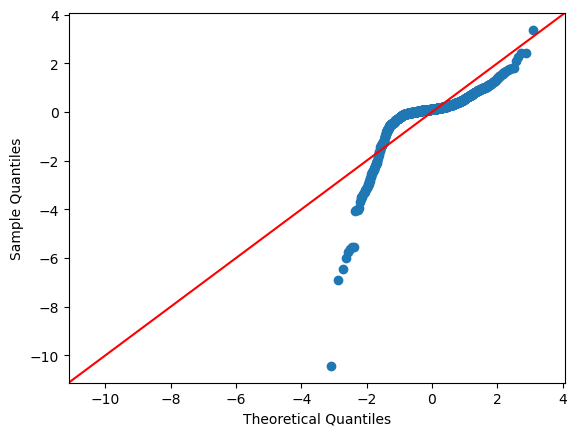

In [220]:
import statsmodels.api as sm
sm.qqplot(diff,fit=True,line='45')
plt.show()

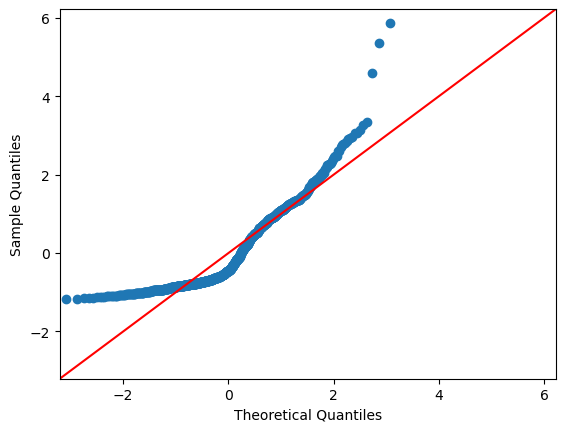

In [221]:
sm.qqplot(linreg_mid.predict(X_va_rescaled),fit=True,line='45')
plt.show()

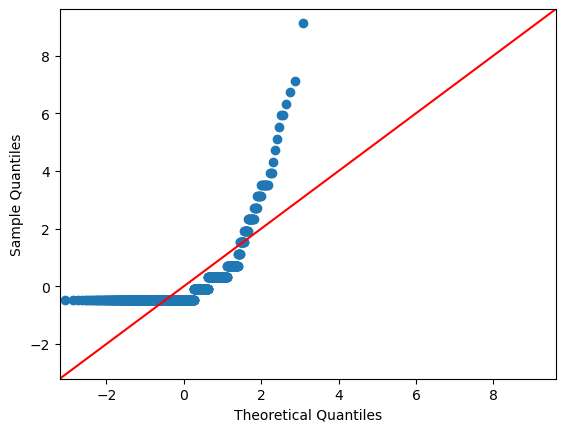

In [222]:
sm.qqplot(y_va,fit=True,line='45')
plt.show()

#### With CrossValidation and HyperParameters Tuning
https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linear-regression

In [223]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

In [224]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 20))}]


# step-3: perform grid search
# 3.1 specify model
lr = LinearRegression()
lr.fit(X_tr_rescaled, y_tr)
rfe = RFE(lr)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
# fit the model
model_cv.fit(X_tr_rescaled, y_tr) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19]}],
             return_train_score=True, scoring='r2', verbose=1)

In [225]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.sort_values(by='mean_test_score', ascending=False)[['mean_test_score','std_test_score','mean_train_score','mean_fit_time','param_n_features_to_select']].head(10)

,mean_test_score,std_test_score,mean_train_score,mean_fit_time,param_n_features_to_select
11,0.269062,0.018151,0.274976,0.060095,12
12,0.268707,0.017732,0.275355,0.060734,13
9,0.268605,0.018113,0.274668,0.068047,10
10,0.268505,0.018441,0.274755,0.059982,11
17,0.268367,0.017750,0.276131,0.036231,18
14,0.268267,0.017836,0.275778,0.052020,15
13,0.268234,0.017718,0.275531,0.049782,14
18,0.268204,0.017692,0.276181,0.034243,19
16,0.268200,0.017666,0.276094,0.039121,17
15,0.268060,0.017703,0.275930,0.043640,16


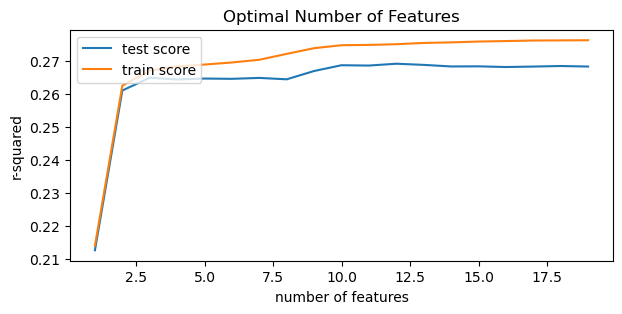

In [559]:
# plotting cv results
plt.figure(figsize=(7,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

#### KNN Regressor <a name='model_mid_knn'/>
<a href=#top> Back to top <a>

In [227]:
from sklearn.neighbors import KNeighborsRegressor

In [228]:
knn = KNeighborsRegressor()
knn.fit(X_tr_rescaled, y_tr)
print(round(knn.score(X_va_rescaled, y_va),5))
knn_valid_r2 = knn.score(X_va_rescaled, y_va)
knn_train_r2 = knn.score(X_tr_rescaled, y_tr)
# R2 is very low

0.23698


In [229]:
print(round(knn.score(X_tr_rescaled, y_tr),5))

0.44725


In [230]:
# on validation set
print('KNN without tuning - MSE: {:.2f}'.format(mse(y_va, knn.predict(X_va_rescaled))))
print('KNN without tuning - RMSE: {:.2f}'.format(np.sqrt(mse(y_va, knn.predict(X_va_rescaled)))))
knn_valid_mse = mse(y_va, knn.predict(X_va_rescaled))
knn_valid_rmse = np.sqrt(mse(y_va, knn.predict(X_va_rescaled)))
# on full set
knn_full_mse = mse(y, knn.predict(scaler_mid.transform(X)))
knn_full_rmse = np.sqrt(mse(y, knn.predict(scaler_mid.transform(X))))

KNN without tuning - MSE: 4.76
KNN without tuning - RMSE: 2.18


In [231]:
#Q-Q plot
diff_knn = knn.predict(X_va_rescaled) - y_va
diff_knn.sort_values(ascending=False).head()

17824    9.6
10335    9.4
20179    8.2
10585    5.6
4365     5.2
Name: total_points_y, dtype: float64

In [232]:
knn_valid_max = knn.predict(X_va_rescaled).max()
knn_full_max = knn.predict(scaler_mid.transform(X)).max()
knn.predict(X_va_rescaled).max()

10.6

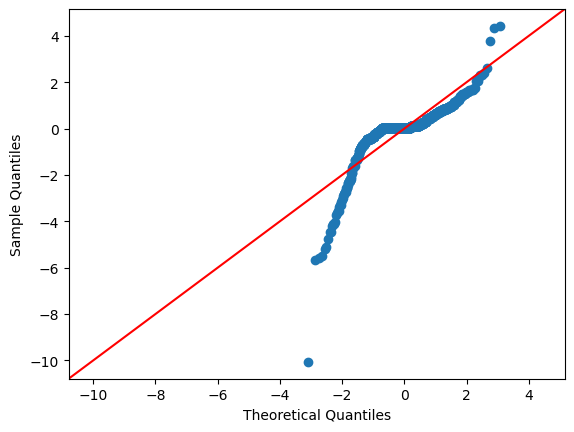

In [233]:
import statsmodels.api as sm
sm.qqplot(diff_knn,fit=True,line='45')
plt.show()
# relatively good at identifying lowest

#### RandomForest <a name='model_mid_rf'/>
<a href=#top> Back to top <a>

In [234]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

In [235]:
# create regressor object
rf = RandomForestRegressor(n_estimators = 150, random_state = 0)
rf.fit(X_tr_rescaled, y_tr)
print(round(rf.score(X_va_rescaled, y_va),5))
rf_valid_r2 = rf.score(X_va_rescaled, y_va)
rf_train_r2 = rf.score(X_tr_rescaled, y_tr)
# R2 is very low

0.27585


In [236]:
print(round(rf.score(X_tr_rescaled, y_tr),5))

0.88856


In [237]:
# on validation set
print('RandomForest without tuning - MSE: {:.2f}'.format(mse(y_va, rf.predict(X_va_rescaled))))
print('RandomForest without tuning - RMSE: {:.2f}'.format(np.sqrt(mse(y_va, rf.predict(X_va_rescaled)))))
rf_valid_mse = mse(y_va, rf.predict(X_va_rescaled))
rf_valid_rmse = np.sqrt(mse(y_va, rf.predict(X_va_rescaled)))
# on full set
rf_full_mse = mse(y, rf.predict(scaler_mid.transform(X)))
rf_full_rmse = np.sqrt(mse(y, rf.predict(scaler_mid.transform(X))))

RandomForest without tuning - MSE: 4.51
RandomForest without tuning - RMSE: 2.12


In [238]:
#Q-Q plot
diff_rf = rf.predict(X_va_rescaled) - y_va
round(diff_rf.head(5),2)

11869    0.59
16949    0.94
6931     0.52
10454    0.79
19888    0.45
Name: total_points_y, dtype: float64

In [239]:
y_va[:5]

11869    0
16949    3
6931     0
10454    0
19888    0
Name: total_points_y, dtype: int64

In [240]:
rf.predict(X_va_rescaled)[:5]

array([0.59      , 3.94      , 0.52      , 0.79333333, 0.44666667])

In [241]:
diff_rf.sort_values(ascending=False).head()

20179    7.280000
10335    6.840000
9158     5.721111
2607     5.400667
842      5.397778
Name: total_points_y, dtype: float64

In [242]:
df_ml.loc[20179]

web_name                    De Bruyne
element                           251
team_name                         MCI
element_type_name                 MID
value                             118
total_points_x                    8.0
total_points_max_x                  9
total_points_y                      0
minutes                          76.0
goals_scored                        1
assists                             2
bonus                               2
bps                                34
clean_sheets                 0.333333
penalties_saved                     0
goals_conceded                    1.0
saves                               0
ict_index                        12.2
influence                        47.0
creativity                       56.2
threat                           24.0
fixture_difficulty_x         2.666667
cards                               0
selected                733780.666667
transfers_balance             24230.0
was_home                            0
fixture_diff

In [243]:
rf_valid_max = rf.predict(X_va_rescaled).max()
rf_full_max = rf.predict(scaler_mid.transform(X)).max()
rf.predict(X_va_rescaled).max()

8.773333333333333

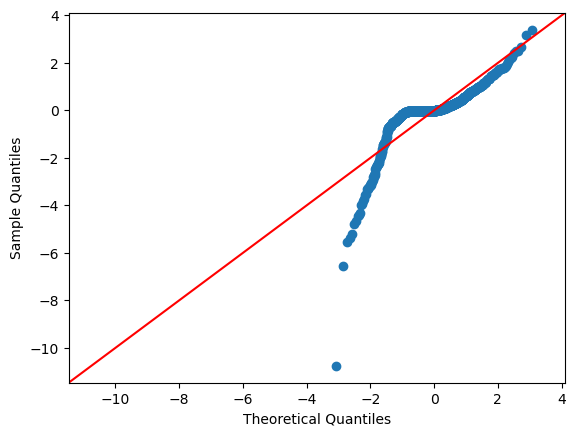

In [244]:
import statsmodels.api as sm
sm.qqplot(diff_rf,fit=True,line='45')
plt.show()

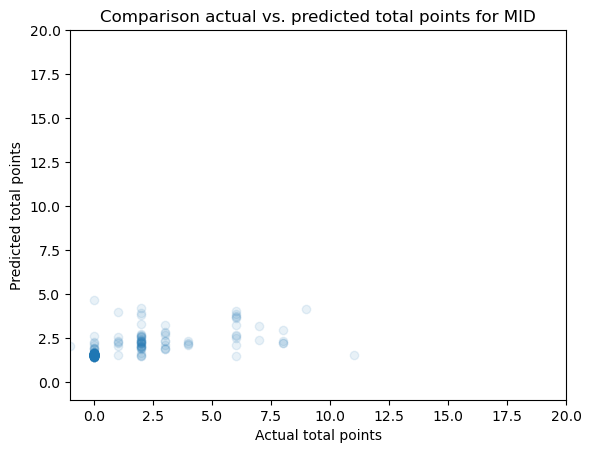

In [564]:
plt.scatter(y_va, rf.predict(X_va_rescaled), alpha=0.1)
plt.xlabel('Actual total points')
plt.ylabel('Predicted total points')
plt.xlim((-1,20))
plt.ylim((-1,20))
plt.title('Comparison actual vs. predicted total points for MID')
plt.show()

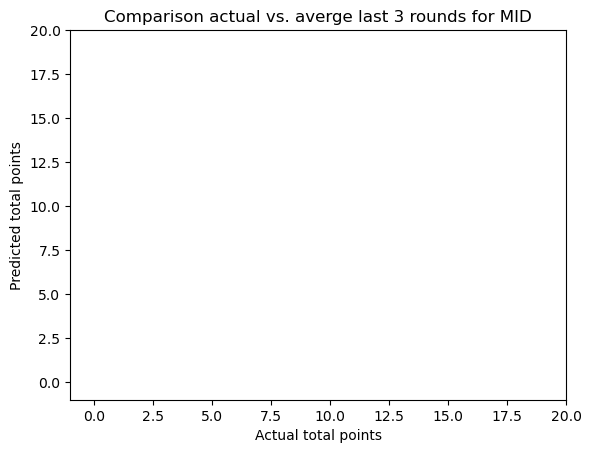

In [563]:
data_scatter = pd.merge(y_va, df_ml_mid.drop(columns=['web_name','element','team_name','element_type_name','total_points_y','total_points_y_log','round']), how='left', left_index=True, right_index=True)
plt.scatter(data_scatter['total_points_y'], data_scatter['total_points_x'], alpha=0.1)
plt.xlabel('Actual total points')
plt.ylabel('Predicted total points')
plt.xlim((-1,20))
plt.ylim((-1,20))
plt.title('Comparison actual vs. averge last 3 rounds for MID')
plt.show()

In [247]:
rf.predict(X_va_rescaled).max()

8.773333333333333

In [248]:
df_ml_mid.drop(columns=['web_name','element','team_name','element_type_name','total_points_y','total_points_y_log','round']).head()

,value,total_points_x,total_points_max_x,minutes,goals_scored,assists,bonus,bps,clean_sheets,penalties_saved,goals_conceded,saves,ict_index,influence,creativity,threat,fixture_difficulty_x,cards,selected,transfers_balance,fixture_difficulty_y,team_strength,was_home_1
2,65,0.000000,0,0.000000,0,0,0,0,0.0,0,0.000000,0,0.0,0.0,0.0,0.0,3.666667,0,17781.000000,-4362.000000,2.0,4,1
6,50,0.666667,2,71.333333,0,0,0,13,0.0,0,3.000000,0,4.8,18.0,26.0,5.0,3.666667,2,67392.000000,-4615.333333,2.0,4,1
11,45,0.333333,1,15.000000,0,0,0,2,0.0,0,0.666667,0,0.4,3.4,0.3,0.0,3.666667,0,46247.666667,-3097.666667,2.0,4,1
12,55,0.333333,1,6.333333,0,0,0,3,0.0,0,0.333333,0,0.1,0.4,0.1,0.0,3.666667,0,5896.000000,-737.333333,2.0,4,1
14,50,0.000000,0,0.000000,0,0,0,0,0.0,0,0.000000,0,0.0,0.0,0.0,0.0,3.666667,0,4361.666667,-594.000000,2.0,4,1


In [249]:
rf.feature_importances_

array([0.09246929, 0.18573716, 0.01335982, 0.09684505, 0.00268084,
       0.00960727, 0.00471821, 0.03759901, 0.01369669, 0.        ,
       0.03081449, 0.        , 0.06617652, 0.04434553, 0.06439556,
       0.04693589, 0.0384053 , 0.0063224 , 0.09334735, 0.09385171,
       0.02829839, 0.01574975, 0.01464379])

In [250]:
feature_names = df_ml_mid.drop(columns=['web_name','element','team_name','element_type_name','total_points_y','total_points_y_log','round']).columns

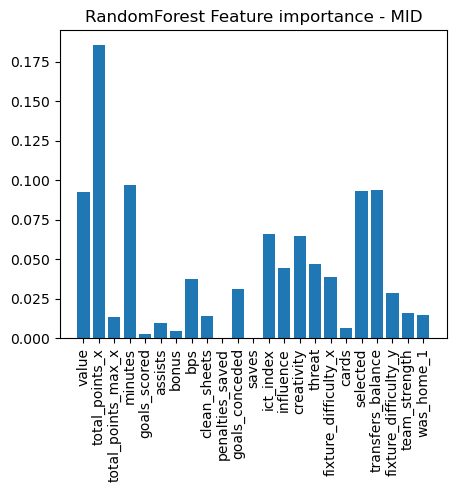

In [565]:
plt.figure(figsize=(5,4))
plt.bar(x=feature_names, height=rf.feature_importances_)
plt.xticks(rotation=90)
plt.title('RandomForest Feature importance - MID')
plt.show()

#### With CrossValidation and hyperparameter tuning
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [252]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [253]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_r = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_r, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1, return_train_score=True)
# Fit the random search model
rf_random.fit(X_tr, y_tr)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True, verbose=2)

In [254]:
# cv results
rf_cv_results = pd.DataFrame(rf_random.cv_results_)
rf_cv_results.sort_values(by='mean_test_score', ascending=False)[['mean_test_score','std_test_score','mean_train_score','mean_fit_time','param_n_estimators','param_max_features','param_max_depth','param_min_samples_split','param_min_samples_leaf','param_bootstrap']].head(10)

,mean_test_score,std_test_score,mean_train_score,mean_fit_time,param_n_estimators,param_max_features,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_bootstrap
7,0.277285,0.004694,0.565236,9.186433,200,sqrt,10,5,2,True
1,0.277256,0.005117,0.725580,25.655879,600,sqrt,90,10,4,False
0,0.277195,0.009469,0.637328,5.456824,200,sqrt,50,10,2,True
14,0.276303,0.004731,0.749667,82.942871,1600,sqrt,110,2,4,False
16,0.276026,0.008269,0.685013,37.234472,1000,sqrt,30,10,1,True
13,0.272025,0.007404,0.789842,69.008797,1200,sqrt,70,10,2,False
3,0.269999,0.007658,0.795454,57.076857,1400,sqrt,30,5,1,True
12,0.269074,0.007934,0.794757,39.317397,1000,sqrt,70,5,1,True
19,0.267891,0.008326,0.688164,153.611453,1600,auto,None,2,4,True
8,0.266989,0.008224,0.687671,185.130380,1200,auto,100,2,4,True


#### Models comparison

In [569]:
# Baseline
print('*** Baseline **')
print('Baseline all Element types full set - MSE: {:.2f}'.format(base_full_mse))
print('Baseline all Element types full set - RMSE: {:.2f}'.format(base_full_rmse))
print('Baseline MID full set - MSE: {:.2f}'.format(base_mid_full_mse))
print('Baseline MID full set - RMSE: {:.2f}'.format(base_mid_full_rmse))
print('Baseline MID full set - MAX: {:.2f}'.format(base_mid_max))
# LinearRegression
print('*** LinearRegression ***')
print('LinearRegression MID valid set - R2: {:.2f} (train set: {:.2f})'.format(linreg_valid_r2, linreg_train_r2))
print('LinearRegression MID valid set - MSE: {:.2f} (full set: {:.2f})'.format(linreg_valid_mse, linreg_full_mse))
print('LinearRegression MID valid set - RMSE: {:.2f} (full set: {:.2f})'.format(linreg_valid_rmse, linreg_full_rmse))
print('LinearRegression MID valid set - MAX: {:.2f} (full set: {:.2f})'.format(linreg_valid_max, linreg_full_max))
# KNN
print('*** KNN ***')
print('KNN MID valid set - R2: {:.2f} (train set: {:.2f})'.format(knn_valid_r2, knn_train_r2))
print('KNN MID valid set - MSE: {:.2f} (full set: {:.2f})'.format(knn_valid_mse, knn_full_mse))
print('KNN MID valid set - RMSE: {:.2f} (full set: {:.2f})'.format(knn_valid_rmse, knn_full_rmse))
print('KNN MID valid set - MAX: {:.2f} (full set: {:.2f})'.format(knn_valid_max, knn_full_max))
# RandomForest
print('*** RandomForest ***')
print('RandomForest MID valid set - R2: {:.2f} (train set: {:.2f})'.format(rf_valid_r2, rf_train_r2))
print('RandomForest MID valid set - MSE: {:.2f} (full set: {:.2f})'.format(rf_valid_mse, rf_full_mse))
print('RandomForest MID valid set - RMSE: {:.2f} (full set: {:.2f})'.format(rf_valid_rmse, rf_full_rmse))
print('RandomForest MID valid set - MAX: {:.2f} (full set: {:.2f})'.format(rf_valid_max, rf_full_max))
# Coments
print('')
print('*** COMMENTS ***')
print('Linear Regression seems like the best option for Midfielders at least with best R2 and MSE on validation set')
print('KNN and especially RandomForest seems to be largely overfitting on the train set')

*** Baseline **
Baseline all Element types full set - MSE: 5.54
Baseline all Element types full set - RMSE: 2.35
Baseline MID full set - MSE: 5.48
Baseline MID full set - RMSE: 2.34
Baseline MID full set - MAX: 16.67
*** LinearRegression ***
LinearRegression MID valid set - R2: 0.29 (train set: 0.28)
LinearRegression MID valid set - MSE: 4.42 (full set: 4.36)
LinearRegression MID valid set - RMSE: 2.10 (full set: 2.09)
LinearRegression MID valid set - MAX: 8.75 (full set: 8.75)
*** KNN ***
KNN MID valid set - R2: 0.24 (train set: 0.45)
KNN MID valid set - MSE: 4.76 (full set: 3.47)
KNN MID valid set - RMSE: 2.18 (full set: 1.86)
KNN MID valid set - MAX: 10.60 (full set: 13.80)
*** RandomForest ***
RandomForest MID valid set - R2: 0.28 (train set: 0.89)
RandomForest MID valid set - MSE: 4.51 (full set: 1.05)
RandomForest MID valid set - RMSE: 2.12 (full set: 1.03)
RandomForest MID valid set - MAX: 8.77 (full set: 17.91)

*** COMMENTS ***
Linear Regression seems like the best option for 

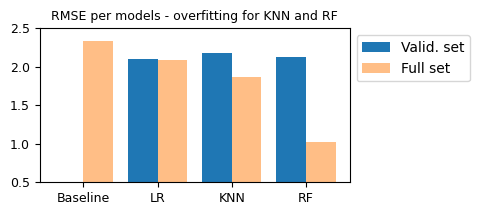

In [605]:
plt.figure(figsize=(4,2))
x = ['Baseline','LR','KNN','RF']
y = [0,linreg_valid_rmse,knn_valid_rmse,rf_valid_rmse]
y2 = [base_mid_full_rmse,linreg_full_rmse,knn_full_rmse,rf_full_rmse]
X_axis = np.arange(len(x))

plt.bar(X_axis - 0.2,y, width=0.4, label='Valid. set')
plt.bar(X_axis + 0.2,y2, width=0.4, label='Full set',alpha=0.5)

plt.xticks(X_axis, x, fontsize=9)
plt.yticks([0.5,1,1.5,2,2.5], fontsize=9)
plt.ylim(0.5,2.5)
plt.title('RMSE per models - overfitting for KNN and RF', fontsize=9)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

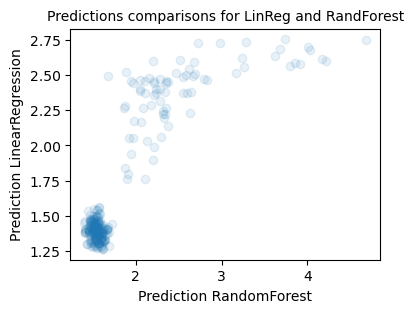

In [611]:
plt.figure(figsize=(4,3))
plt.scatter(x=rf.predict(X_va_rescaled), y=linreg_mid.predict(X_va_rescaled), alpha=0.1)
plt.xlabel('Prediction RandomForest', fontsize=10)
plt.ylabel('Prediction LinearRegression', fontsize=10)
plt.title('Predictions comparisons for LinReg and RandForest', fontsize=10)
plt.show()

### DEFENDERS <a name='model_def'/>
<a href=#top> Back to top <a>

In [261]:
df_ml_def = df_ml_encoded_type[df_ml_encoded_type['element_type_name'] == 'DEF']
df_ml_def.shape

(7952, 29)

In [262]:
df_ml_def.corr()['total_points_y'].sort_values(ascending=False).head(15)

total_points_y        1.000000
minutes               0.434178
bps                   0.419640
ict_index             0.391340
influence             0.385248
total_points_x        0.381910
total_points_max_x    0.367983
value                 0.323430
clean_sheets          0.308288
creativity            0.307114
threat                0.297140
goals_conceded        0.265259
selected              0.245553
bonus                 0.212457
cards                 0.181691
Name: total_points_y, dtype: float64

In [263]:
# data preparation
X = df_ml_def.drop(columns=['web_name','element','team_name','element_type_name','total_points_y','round']).values
# X = df_ml_def[['ict_index','minutes','total_points_x','bps','influence','creativity','threat','value','clean_sheets','selected']].values
y = df_ml_def['total_points_y']

# train_test_split
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.1, random_state=18)
# is it splitting top X rows? This could impact as we have latest gameweeks at the bottom grouped

# Standard Scaler
# scaler = StandardScaler()
scaler_def = MinMaxScaler()
X_tr_rescaled = scaler_def.fit_transform(X_tr)
X_va_rescaled = scaler_def.transform(X_va)

print('Training set:',X_tr.shape)
print('validation set:',X_va.shape)

Training set: (7156, 23)
validation set: (796, 23)


#### LinearRegression

In [264]:
# create regressor object
lr_def = LinearRegression()
lr_def.fit(X_tr_rescaled, y_tr)
print(round(lr_def.score(X_va_rescaled, y_va),5))
# R2 is very low

0.22377


In [265]:
print('LinearRegression DEF validation set - MSE: {:.2f} (full set: {:.2f})'.format(mse(y_va, lr_def.predict(X_va_rescaled)), mse(y, lr_def.predict(scaler_def.transform(X)))))
print('LinearRegression DEF validation- RMSE: {:.2f} (full set: {:.2f})'.format(np.sqrt(mse(y_va, lr_def.predict(X_va_rescaled))), np.sqrt(mse(y, lr_def.predict(scaler_def.transform(X))))))

LinearRegression DEF validation set - MSE: 4.77 (full set: 4.85)
LinearRegression DEF validation- RMSE: 2.18 (full set: 2.20)


In [266]:
lr_def.predict(scaler_def.transform(X))

array([1.96144084, 2.28002688, 1.00653796, ..., 0.34355705, 0.1528671 ,
       0.37063577])

#### RandomForest

In [267]:
# create regressor object
rf_def = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_def.fit(X_tr_rescaled, y_tr)
print(round(rf_def.score(X_va_rescaled, y_va),5))
# R2 is very low

0.18729


In [268]:
print('RandomForest DEF validation set - MSE: {:.2f} (full set: {:.2f})'.format(mse(y_va, rf_def.predict(X_va_rescaled)), mse(y, rf_def.predict(scaler_def.transform(X)))))
print('RandomForest DEF validation- RMSE: {:.2f} (full set: {:.2f})'.format(np.sqrt(mse(y_va, rf_def.predict(X_va_rescaled))), np.sqrt(mse(y, rf_def.predict(scaler_def.transform(X))))))

RandomForest DEF validation set - MSE: 5.00 (full set: 1.19)
RandomForest DEF validation- RMSE: 2.24 (full set: 1.09)


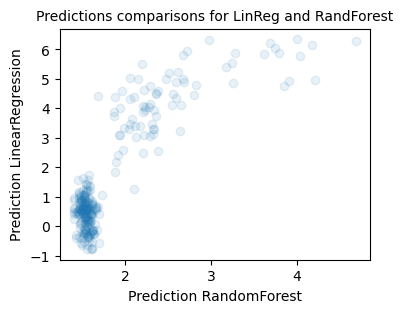

In [612]:
plt.figure(figsize=(4,3))
plt.scatter(x=rf.predict(X_va_rescaled), y=lr_def.predict(X_va_rescaled), alpha=0.1)
plt.xlabel('Prediction RandomForest', fontsize=10)
plt.ylabel('Prediction LinearRegression', fontsize=10)
plt.title('Predictions comparisons for LinReg and RandForest', fontsize=10)
plt.show()

### FORWARDS <a name='model_fwd'/>
<a href=#top> Back to top <a>

In [270]:
df_ml_fwd = df_ml_encoded_type[df_ml_encoded_type['element_type_name'] == 'FWD']
df_ml_fwd.shape

(3122, 29)

In [271]:
df_ml_fwd.corr()['total_points_y'].sort_values(ascending=False).head(15)

total_points_y        1.000000
minutes               0.468697
ict_index             0.443324
threat                0.436739
total_points_x        0.409686
creativity            0.404340
total_points_max_x    0.403642
influence             0.383177
bps                   0.376644
goals_conceded        0.363336
value                 0.338223
goals_scored          0.318281
bonus                 0.295898
selected              0.271055
clean_sheets          0.269395
Name: total_points_y, dtype: float64

In [272]:
# data preparation
X = df_ml_fwd.drop(columns=['web_name','element','team_name','element_type_name','total_points_y','round']).values
# X = df_ml_fwd[['ict_index','minutes','total_points_x','bps','influence','creativity','threat','value','clean_sheets','selected']].values
y = df_ml_fwd['total_points_y']

# train_test_split
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.1, random_state=18)
# is it splitting top X rows? This could impact as we have latest gameweeks at the bottom grouped

# Standard Scaler
# scaler = StandardScaler()
scaler_fwd = MinMaxScaler()
X_tr_rescaled = scaler_fwd.fit_transform(X_tr)
X_va_rescaled = scaler_fwd.transform(X_va)

print('Training set:',X_tr.shape)
print('validation set:',X_va.shape)

Training set: (2809, 23)
validation set: (313, 23)


#### LinearRegression

In [273]:
# create regressor object
lr_fwd = LinearRegression()
lr_fwd.fit(X_tr_rescaled, y_tr)
print(round(lr_fwd.score(X_va_rescaled, y_va),5))
# R2 is very low

0.17718


In [274]:
print('LinearRegression FWD validation set - MSE: {:.2f} (full set: {:.2f})'.format(mse(y_va, lr_fwd.predict(X_va_rescaled)), mse(y, lr_fwd.predict(scaler_fwd.transform(X)))))
print('LinearRegression FWD validation- RMSE: {:.2f} (full set: {:.2f})'.format(np.sqrt(mse(y_va, lr_fwd.predict(X_va_rescaled))), np.sqrt(mse(y, lr_fwd.predict(scaler_fwd.transform(X))))))

LinearRegression FWD validation set - MSE: 6.02 (full set: 4.57)
LinearRegression FWD validation- RMSE: 2.45 (full set: 2.14)


#### RandomForest

In [275]:
# create regressor object
rf_fwd = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_fwd.fit(X_tr_rescaled, y_tr)
print(round(rf_fwd.score(X_va_rescaled, y_va),5))
# R2 is very low

0.24367


In [276]:
print('RandomForest FWD validation set - MSE: {:.2f} (full set: {:.2f})'.format(mse(y_va, rf_fwd.predict(X_va_rescaled)), mse(y, rf_fwd.predict(scaler_fwd.transform(X)))))
print('RandomForest FWD validation set - RMSE: {:.2f} (full set: {:.2f})'.format(np.sqrt(mse(y_va, rf_fwd.predict(X_va_rescaled))), np.sqrt(mse(y, rf_fwd.predict(scaler_fwd.transform(X))))))

RandomForest FWD validation set - MSE: 5.53 (full set: 1.22)
RandomForest FWD validation set - RMSE: 2.35 (full set: 1.11)


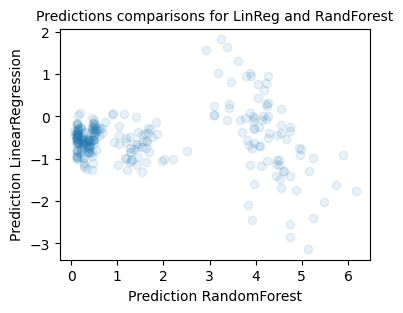

In [614]:
plt.figure(figsize=(4,3))
plt.scatter(x=rf_fwd.predict(X_va_rescaled), y=lr_fwd.predict(X_va_rescaled), alpha=0.1)
plt.xlabel('Prediction RandomForest', fontsize=10)
plt.ylabel('Prediction LinearRegression', fontsize=10)
plt.title('Predictions comparisons for LinReg and RandForest', fontsize=10)
plt.show()

### GOALKEEPERS <a name='model_gkp'/>
<a href=#top> Back to top <a>

In [278]:
df_ml_gkp = df_ml_encoded_type[df_ml_encoded_type['element_type_name'] == 'GKP']
df_ml_gkp.shape

(2694, 29)

In [279]:
df_ml_gkp.corr()['total_points_y'].sort_values(ascending=False).head(15)

total_points_y        1.000000
minutes               0.663165
bps                   0.621542
total_points_x        0.583408
total_points_max_x    0.576285
influence             0.557071
ict_index             0.554574
saves                 0.548657
value                 0.515249
goals_conceded        0.498037
selected              0.466692
clean_sheets          0.460090
bonus                 0.313478
cards                 0.252944
creativity            0.144208
Name: total_points_y, dtype: float64

In [280]:
# data preparation
X = df_ml_gkp.drop(columns=['web_name','element','team_name','element_type_name','total_points_y','round']).values
# X = df_ml_gkp[['ict_index','minutes','total_points_x','bps','influence','creativity','threat','value','clean_sheets','selected']].values
y = df_ml_gkp['total_points_y']

# train_test_split
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.1, random_state=18)
# is it splitting top X rows? This could impact as we have latest gameweeks at the bottom grouped

# Standard Scaler
# scaler = StandardScaler()
scaler_gkp = MinMaxScaler()
X_tr_rescaled = scaler_gkp.fit_transform(X_tr)
X_va_rescaled = scaler_gkp.transform(X_va)

print('Training set:',X_tr.shape)
print('validation set:',X_va.shape)

Training set: (2424, 23)
validation set: (270, 23)


#### LinearRegression

In [281]:
# create regressor object
lr_gkp = LinearRegression()
lr_gkp.fit(X_tr_rescaled, y_tr)
print(round(lr_gkp.score(X_va_rescaled, y_va),5))
# R2 is very low

0.40745


In [282]:
print('LinearRegression GKP validation set - MSE: {:.2f} (full set: {:.2f})'.format(mse(y_va, lr_gkp.predict(X_va_rescaled)), mse(y, lr_gkp.predict(scaler_gkp.transform(X)))))
print('LinearRegression GKP validation set - RMSE: {:.2f} (full set: {:.2f})'.format(np.sqrt(mse(y_va, lr_gkp.predict(X_va_rescaled))), np.sqrt(mse(y, lr_gkp.predict(scaler_gkp.transform(X))))))

LinearRegression GKP validation set - MSE: 2.23 (full set: 2.38)
LinearRegression GKP validation set - RMSE: 1.49 (full set: 1.54)


#### RandomForest

In [283]:
# create regressor object
rf_gkp = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_gkp.fit(X_tr_rescaled, y_tr)
print(round(rf_gkp.score(X_va_rescaled, y_va),5))
# R2 is very low

0.38732


In [284]:
print('RandomForest GKP validation set - MSE: {:.2f} (full set: {:.2f})'.format(mse(y_va, rf_gkp.predict(X_va_rescaled)), mse(y, rf_gkp.predict(scaler_gkp.transform(X)))))
print('RandomForest GKP validation set - RMSE: {:.2f} (full set: {:.2f})'.format(np.sqrt(mse(y_va, rf_gkp.predict(X_va_rescaled))), np.sqrt(mse(y, rf_gkp.predict(scaler_gkp.transform(X))))))

RandomForest GKP validation set - MSE: 2.30 (full set: 0.56)
RandomForest GKP validation set - RMSE: 1.52 (full set: 0.75)


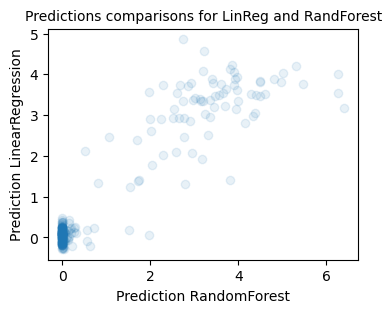

In [615]:
plt.figure(figsize=(4,3))
plt.scatter(x=rf_gkp.predict(X_va_rescaled), y=lr_gkp.predict(X_va_rescaled), alpha=0.1)
plt.xlabel('Prediction RandomForest', fontsize=10)
plt.ylabel('Prediction LinearRegression', fontsize=10)
plt.title('Predictions comparisons for LinReg and RandForest', fontsize=10)
plt.show()

***
***
## 5) Prediction for 1st half of 22/23 season (until World Cup break) <a name='pred'/>
<a href=#top> Back to top <a>

### IMPORT AND CLEAN DATA <a name='pred_data'/>

In [286]:
# Run the function and choose where to save the json file
# file = 
'https://fantasy.premierleague.com/api/entry/4292129/history/'
file_url = "https://fantasy.premierleague.com/api/bootstrap-static/"
path_url = r'C:\Users\glaurent\OneDrive - Expedia Group\Desktop\EPFL ML\fpl_moneyball_general_info_22_23'

In [287]:
# only run when importing data
file = file_url
print(file)
get_json(path_url + ".json'")
print(path_url + ".json")

https://fantasy.premierleague.com/api/bootstrap-static/
C:\Users\glaurent\OneDrive - Expedia Group\Desktop\EPFL ML\fpl_moneyball_general_info_22_23.json


In [288]:
with open(path_url + ".json'") as json_data:
            d = json.load(json_data)
            #print(list(d.keys()))
            df = json_normalize(d['teams'])
            df_teams_curr = df

In [289]:
df_teams_curr.shape

(20, 21)

In [290]:
df_teams_curr.head(5)

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1200,1270,1160,1230,1160,1240,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1090,1100,1110,1110,1070,1090,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,2,None,False,0,1050,1070,1070,1110,1040,1070,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,3,None,False,0,1100,1150,1100,1150,1140,1170,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,3,None,False,0,1140,1140,1170,1160,1150,1170,131


In [291]:
with open(path_url + ".json'") as json_data:
            d = json.load(json_data)
            #print(list(d.keys()))
            df = json_normalize(d['elements'])
            df_elements_curr = df

In [292]:
df_elements_curr.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,100.0,100.0,58822,0,0,-3,3,0,2,1.5,1.5,1,Cédric,1.0,1,False,,2022-09-16T13:30:06.551108Z,42,58822.jpg,1.0,Alves Soares,0.1,False,None,a,1,3,2,5802,145,25769,256,0.2,0.5,Cédric,28,0,0,0,0,0,0,0,0,0,0,0,5,2.4,1.6,0.0,0.4,0,0.00000,0.00979,0.00979,0.04350,425,159,388,142,477,194,431,159,NaN,,NaN,,NaN,,0.00000,0.0,0.03147,0.03147,0.13982,0.00,544,157,168,50,376,141,402,148,0.00000,0.00000
1,NaN,NaN,84450,0,0,1,-1,1,3,1.5,1.5,1,Granit,1.0,3,False,,None,51,84450.jpg,4.4,Xhaka,3.7,False,None,a,1,3,62,696201,21778,471681,40937,0.2,12.2,Xhaka,1166,3,3,6,11,0,0,0,2,0,0,7,253,291.8,278.5,228.0,79.8,14,1.49000,1.48360,2.97360,11.21090,54,21,36,28,63,38,40,29,NaN,,3.0,,NaN,,0.11501,0.0,0.11451,0.22952,0.86534,0.85,171,99,235,115,42,20,83,28,1.08062,0.46312
2,100.0,100.0,153256,0,0,-3,3,1,3,1.5,1.5,1,Mohamed,1.0,4,False,,2022-08-30T11:30:06.278675Z,42,153256.jpg,1.3,Elneny,0.7,False,None,a,1,3,4,151474,9909,207993,7670,0.2,1.0,Elneny,94,0,0,0,1,0,0,0,0,0,0,0,21,4.2,5.3,0.0,1.0,1,0.00000,0.04431,0.04431,0.83280,413,181,365,174,482,187,412,183,NaN,,NaN,,NaN,,0.00000,0.0,0.04242,0.04242,0.79736,0.96,551,284,169,87,343,150,210,69,0.95745,0.00000
3,NaN,NaN,156074,0,0,-3,3,0,2,0.5,0.5,0,Rob,0.0,5,False,,None,42,156074.jpg,1.0,Holding,0.1,False,None,a,1,3,4,5749,153,16028,296,0.0,1.0,Holding,12,0,0,0,0,0,0,0,0,0,0,0,14,2.4,0.1,0.0,0.2,0,0.00000,0.00022,0.00022,0.13740,427,161,428,161,483,198,440,163,NaN,,NaN,,NaN,,0.00000,0.0,0.00165,0.00165,1.03050,0.00,552,163,376,145,379,144,419,155,0.00000,0.00000
4,100.0,100.0,167199,0,0,-2,2,0,3,2.5,2.5,2,Thomas,2.0,6,False,,2022-09-25T09:00:06.484502Z,48,167199.jpg,3.8,Partey,0.5,False,None,a,1,3,42,79319,3274,97593,3824,0.4,8.8,Partey,959,2,0,7,6,0,0,0,1,0,0,4,191,221.0,141.3,111.0,47.4,11,1.04920,0.56573,1.61493,9.06480,105,44,111,78,150,95,113,71,NaN,,NaN,,NaN,,0.09847,0.0,0.05309,0.15156,0.85071,0.56,260,157,110,47,73,35,245,80,1.03233,0.65693


In [293]:
df_elements_curr.shape

(667, 88)

In [294]:
df_elements_curr['chance_of_playing_next_round'].value_counts()

100.0    241
0.0      129
75.0      33
50.0       1
25.0       1
Name: chance_of_playing_next_round, dtype: int64

In [295]:
# create new columns with easier to read/interpret features (e.g.: names instead of ids)
df_elements_curr['element_type_name'] = df_elements_curr['element_type'].replace({1:'GKP',2:'DEF',3:'MID',4:'FWD'})
df_elements_curr['team_name'] = df_elements_curr['team']
for t in np.arange(1,21):
    df_elements_curr['team_name'].replace(to_replace=(df_teams_curr[['id','short_name']].to_dict()['id'][t-1]), value=(df_teams_curr[['id','short_name']].to_dict()['short_name'][t-1]), inplace=True)
df_elements_curr['cost_start'] = df_elements_curr['now_cost'] - df_elements_curr['cost_change_start']

In [296]:
# Run the function and choose where to save the json file
#file = 'https://fantasy.premierleague.com/api/entry/4292129/history/'
file_url = "https://fantasy.premierleague.com/api/element-summary/"
path_url = r'C:\Users\glaurent\OneDrive - Expedia Group\Desktop\EPFL ML\Fantasy\Players\fpl_moneyball_players_21_22'
pages = np.arange(1,750)

In [297]:
# Open the json file and print a list of the keys
for page in pages:
    try:
        if page == 1:
            with open(path_url + page.astype(str) + ".json'") as json_data:
                d = json.load(json_data)
                #print(list(d.keys()))
                df = json_normalize(d['history'])
                df['player'] = page
                df_players_hist_curr = df
                continue
        with open(path_url + page.astype(str) + ".json'") as json_data:
            d = json.load(json_data)
            #print(list(d.keys()))
            df = json_normalize(d['history'])
            df['player'] = page
            df_players_hist_curr = pd.concat([df_players_hist_curr,df]).reset_index(drop=True)
    except:
        pass

In [298]:
df_players_hist_curr.head()

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,value,transfers_balance,selected,transfers_in,transfers_out,player
0,1,1,7,0,False,2022-08-05T19:00:00Z,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0.00000,0.00000,45,0,23970,0,0,1
1,1,11,10,0,True,2022-08-13T14:00:00Z,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0.00000,0.00000,44,-5169,24193,1361,6530,1
2,1,21,3,0,False,2022-08-20T16:30:00Z,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0.00000,0.00000,44,-4337,20960,879,5216,1
3,1,31,9,0,True,2022-08-27T16:30:00Z,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0.00000,0.00000,43,-2988,18825,577,3565,1
4,1,41,2,0,True,2022-08-31T18:30:00Z,2,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0.00000,0.00000,43,-1611,17790,405,2016,1


In [299]:
df_players_hist_curr.shape

(9158, 37)

In [300]:
df_elements.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [301]:
# merge data from previous (*'21/22) and current season ('22/23)
df_elements_last_curr = pd.merge(left=df_elements[['code','total_points','web_name']],\
         right=df_elements_curr[['code','web_name','team_name','element_type_name','total_points','cost_start']],\
         how='inner', left_on='code', right_on='code', suffixes=('_past','_current'))

In [302]:
df_elements_last_curr.head()

,code,total_points_past,web_name_past,web_name_current,team_name,element_type_name,total_points_current,cost_start
0,80201,10,Leno,Leno,FUL,GKP,47,45
1,47431,0,Willian,Willian,FUL,MID,28,55
2,54694,44,Aubameyang,Aubameyang,CHE,FWD,15,90
3,58822,48,Cédric,Cédric,ARS,DEF,2,45
4,84450,60,Xhaka,Xhaka,ARS,MID,62,50


In [303]:
df_elements_last_curr.shape

(454, 8)

In [304]:
# Run the function and choose where to save the json file
#file = 'https://fantasy.premierleague.com/api/entry/4292129/history/'
file_url = "https://fantasy.premierleague.com/api/fixtures/"
path_url = r'C:\Users\glaurent\OneDrive - Expedia Group\Desktop\EPFL ML\fpl_moneyball_fixture_22_23'
# pages = np.arange(1,8)

In [305]:
# only run when importing data
file = file_url
print(file)
get_json(path_url + ".json'")
# print(path_url + ".json")

https://fantasy.premierleague.com/api/fixtures/


In [306]:
with open(path_url + ".json'") as json_data:
            d = json.load(json_data)
            #print(list(d.keys()))
            #df = json_normalize(d['events'])
            df = json_normalize(d)
            df_fixture_curr = df

In [307]:
df_fixture_curr.shape

(380, 17)

In [308]:
df_fixture_curr.head()

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,team_a,team_a_score,team_h,team_h_score,stats,team_h_difficulty,team_a_difficulty,pulse_id
0,2292871,NaN,False,False,61,None,0,False,None,8,NaN,1,NaN,[],2,4,74971
1,2292870,NaN,False,False,62,None,0,False,None,5,NaN,3,NaN,[],3,2,74972
2,2292882,NaN,False,False,73,None,0,False,None,7,NaN,5,NaN,[],2,3,74983
3,2292883,NaN,False,False,74,None,0,False,None,12,NaN,6,NaN,[],4,4,74984
4,2292872,NaN,False,False,63,None,0,False,None,14,NaN,7,NaN,[],3,3,74973


***
#### LINEAR PROGRAMMING - to create best team at start based on previous season <a name='pred_lp'/>
<a href=#top> Back to top <a>

**(A) Best 15 players team which could have been picked based on previous season?**
* No Chips used (no transfer, no triple captain, no bench boost, no wildcard)
* Same captain for all Gameweeks
* Based on costs at start of the new season (22/23)
* Based on total points from previous season (21/22)
* 15 players

In [309]:
# columns used to build either contrains or objective
df_elements_last_curr[['web_name_past','team_name','element_type_name','total_points_past','cost_start']].head()

,web_name_past,team_name,element_type_name,total_points_past,cost_start
0,Leno,FUL,GKP,10,45
1,Willian,FUL,MID,0,55
2,Aubameyang,CHE,FWD,44,90
3,Cédric,ARS,DEF,48,45
4,Xhaka,ARS,MID,60,50


In [310]:
# Helper variables
POS = df_elements_last_curr['element_type_name'].unique()
CLUBS = df_elements_last_curr['team_name'].unique()
BUDGET = 1000
pos_available = {
    'DEF':5,
    'MID':5,
    'FWD':3,
    'GKP':2
}

# Initilize Variables
names = [df_elements_last_curr['web_name_past'][i] for i in df_elements_last_curr.index]
teams = [df_elements_last_curr['team_name'][i] for i in df_elements_last_curr.index]
positions = [df_elements_last_curr['element_type_name'][i] for i in df_elements_last_curr.index]
prices = [df_elements_last_curr['cost_start'][i] for i in df_elements_last_curr.index]
points = [df_elements_last_curr['total_points_past'][i] for i in df_elements_last_curr.index]
players = [LpVariable("player_" + str(i), cat="Binary") for i in df_elements_last_curr.index]

# Initialize the problem
prob_last = LpProblem("FLP_Player_Choices_last_curr", LpMaximize)

# Define the objective
prob_last += lpSum(players[i] * points[i] for i in range(len(df_elements_last_curr)))

# Build the constraints
prob_last += lpSum(players[i] * df_elements_last_curr['cost_start'][df_elements_last_curr.index[i]] for i in range(len(df_elements_last_curr))) <= BUDGET # Budget Limit

for pos in POS:
    prob_last += lpSum(players[i] for i in range(len(df_elements_last_curr)) if positions[i] == pos) <= pos_available[pos] # Position Limit
    
for club in CLUBS:
    prob_last += lpSum(players[i] for i in range(len(df_elements_last_curr)) if teams[i] == club) <= 3 # Club Limit
    
# Solve the problem
prob_last.solve()

total_cost_start = 0
total_points_last = 0
total_points_current = 0

lp_results = []

for v in prob_last.variables():
    if v.varValue != 0:
        name = df_elements_last_curr['web_name_past'][int(v.name.split("_")[1])]
        club = df_elements_last_curr['team_name'][int(v.name.split("_")[1])]
        position = df_elements_last_curr['element_type_name'][int(v.name.split("_")[1])]
        point_last = df_elements_last_curr['total_points_past'][int(v.name.split("_")[1])]
        point_current = df_elements_last_curr['total_points_current'][int(v.name.split("_")[1])]
        price_start = df_elements_last_curr['cost_start'][int(v.name.split("_")[1])]
        # print(name, position, club, point_last, point_current, price_start, sep = " | ")
        
        lp_results.append({
            'web_name':name,
            'position':position,
            'team_name':club,
            'pts_last_season':point_last,
            'pts_current_season':point_current,
            'price':price_start
        })
        
        total_cost_start = total_cost_start + price_start
        total_points_last = total_points_last + point_last
        total_points_current = total_points_current + point_current

# print('***')    
print('total costs start', total_cost_start)
print('total points last', total_points_last)
print('total points current', total_points_current)
print('***') 

# Convert results to DataFrame
df_results = pd.DataFrame(lp_results)
df_results.sort_values(by='position')

total costs start 1000
total points last 2512
total points current 715
***


,web_name,position,team_name,pts_last_season,pts_current_season,price
1,Gabriel,DEF,ARS,146,72,50
2,van Dijk,DEF,LIV,183,47,65
4,Alexander-Arnold,DEF,LIV,208,40,75
5,Cancelo,DEF,MCI,201,70,70
8,Cash,DEF,AVL,147,18,50
10,Dennis,FWD,NFO,134,19,60
13,Toney,FWD,BRE,139,83,70
14,Mbeumo,FWD,BRE,119,45,60
3,Alisson,GKP,LIV,176,65,55
7,Lloris,GKP,TOT,158,55,55


**Comments:** 
* Performing worst than expected
* Several players largely under-perfroming compare to previous seasons *(e.g.: Dallas, Bamford, Wan-Bissaka, Dunk)* - could potentially look at form or injuries at start of the season to exclude those players

**(B) Best 11 players team which could have been picked at start of the season?**
* No Chips used (no transfer, no triple captain, no bench boost, no wildcard)
* Same captain for all Gameweeks
* Based on costs at start of the season ('22/23)
* Based on points in previous season ('21/22)
* 11 players

In [311]:
df_elements_last_curr.groupby('element_type_name')[['cost_start']].min()
# => 15 players but 11 on pitch => 4*4.5 on bench, 18? => 82 on pitch?

,cost_start
element_type_name,
DEF,40
FWD,45
GKP,40
MID,45


In [312]:
df_elements_last_curr.shape

(454, 8)

In [313]:
comb = ([1,5,4,1],[1,5,3,2],[1,5,2,3],
    [1,4,5,1],[1,4,4,2],[1,4,3,3],
    [1,3,5,2],[1,3,4,3])
print('Number of 11 players combinations:',len(comb))

Number of 11 players combinations: 8


In [314]:
# Helper variables
POS = df_elements_last_curr['element_type_name'].unique()
CLUBS = df_elements_last_curr['team_name'].unique()
BUDGET = 820

lp_results_x = []

for c in comb:
    print(c)
    pos_available = {
        'GKP':c[0],
        'DEF':c[1],
        'MID':c[2],
        'FWD':c[3]
    }

    # Initilize Variables
    names = [df_elements_last_curr['web_name_past'][i] for i in df_elements_last_curr.index]
    teams = [df_elements_last_curr['team_name'][i] for i in df_elements_last_curr.index]
    positions = [df_elements_last_curr['element_type_name'][i] for i in df_elements_last_curr.index]
    prices = [df_elements_last_curr['cost_start'][i] for i in df_elements_last_curr.index]
    points = [df_elements_last_curr['total_points_past'][i] for i in df_elements_last_curr.index]
    players = [LpVariable("player_" + str(i), cat="Binary") for i in df_elements_last_curr.index]

    # Initialize the problem
    prob_x = LpProblem("FLP_Player_Choices", LpMaximize)

    # Define the objective
    prob_x += lpSum(players[i] * points[i] for i in range(len(df_elements_last_curr)))

    # Build the constraints
    prob_x += lpSum(players[i] * df_elements_last_curr['cost_start'][df_elements_last_curr.index[i]] for i in range(len(df_elements_last_curr))) <= BUDGET # Budget Limit

    for pos in POS:
        prob_x += lpSum(players[i] for i in range(len(df_elements_last_curr)) if positions[i] == pos) <= pos_available[pos] # Position Limit
    
    for club in CLUBS:
        prob_x += lpSum(players[i] for i in range(len(df_elements_last_curr)) if teams[i] == club) <= 3 # Club Limit
    
    # Solve the problem
    prob_x.solve()
    
    total_cost_start = 0
    total_points_last = 0
    total_points_current = 0

    for v in prob_x.variables():
        if v.varValue != 0:
            name = df_elements_last_curr['web_name_past'][int(v.name.split("_")[1])]
            club = df_elements_last_curr['team_name'][int(v.name.split("_")[1])]
            position = df_elements_last_curr['element_type_name'][int(v.name.split("_")[1])]
            point_last = df_elements_last_curr['total_points_past'][int(v.name.split("_")[1])]
            point_current = df_elements_last_curr['total_points_current'][int(v.name.split("_")[1])]
            price_start = df_elements_last_curr['cost_start'][int(v.name.split("_")[1])]
        
            lp_results_x.append({
                'combination':c,
                'web_name':name,
                'position':position,
                'team_name':club,
                'pts_last_season':point_last,
                'pts_current_season':point_current,
                'price':price_start
            })
        
            total_cost_start = total_cost_start + price_start
            total_points_last = total_points_last + point_last
            total_points_current = total_points_current + point_current

    # print('***')    
    print('total costs start', total_cost_start)
    print('total points last', total_points_last)
    print('total points current', total_points_current)
    print('***') 

# Convert results to DataFrame
df_results_x = pd.DataFrame(lp_results_x)
df_results_x.sort_values(by='position').head()

[1, 5, 4, 1]
total costs start 820
total points last 2060
total points current 519
***
[1, 5, 3, 2]
total costs start 820
total points last 2025
total points current 548
***
[1, 5, 2, 3]
total costs start 820
total points last 1993
total points current 612
***
[1, 4, 5, 1]
total costs start 820
total points last 2048
total points current 543
***
[1, 4, 4, 2]
total costs start 820
total points last 2025
total points current 586
***
[1, 4, 3, 3]
total costs start 820
total points last 1990
total points current 517
***
[1, 3, 5, 2]
total costs start 820
total points last 2011
total points current 578
***
[1, 3, 4, 3]
total costs start 820
total points last 1985
total points current 577
***


,combination,web_name,position,team_name,pts_last_season,pts_current_season,price
0,"[1, 5, 4, 1]",Gabriel,DEF,ARS,146,72,50
22,"[1, 5, 2, 3]",Gabriel,DEF,ARS,146,72,50
61,"[1, 4, 3, 3]",Cash,DEF,AVL,147,18,50
24,"[1, 5, 2, 3]",Robertson,DEF,LIV,186,43,70
25,"[1, 5, 2, 3]",Alexander-Arnold,DEF,LIV,208,40,75


In [315]:
df_results_x['combination'] = df_results_x[['combination']].astype(str)

In [316]:
# best performing combinations
df_results_x.groupby('combination')['pts_current_season'].sum().sort_values(ascending=False)

combination
[1, 5, 2, 3]    612
[1, 4, 4, 2]    586
[1, 3, 5, 2]    578
[1, 3, 4, 3]    577
[1, 5, 3, 2]    548
[1, 4, 5, 1]    543
[1, 5, 4, 1]    519
[1, 4, 3, 3]    517
Name: pts_current_season, dtype: int64

In [317]:
# extract best performing 11
df_results_x[df_results_x['combination'] == '[1, 5, 2, 3]'].sort_values(by='pts_current_season', ascending=False)

,combination,web_name,position,team_name,pts_last_season,pts_current_season,price
28,"[1, 5, 2, 3]",Kane,FWD,TOT,192,102,115
32,"[1, 5, 2, 3]",Toney,FWD,BRE,139,83,70
22,"[1, 5, 2, 3]",Gabriel,DEF,ARS,146,72,50
26,"[1, 5, 2, 3]",Cancelo,DEF,MCI,201,70,70
23,"[1, 5, 2, 3]",Alisson,GKP,LIV,176,65,55
29,"[1, 5, 2, 3]",Son,MID,TOT,258,53,120
31,"[1, 5, 2, 3]",Bowen,MID,WHU,206,47,85
24,"[1, 5, 2, 3]",Robertson,DEF,LIV,186,43,70
25,"[1, 5, 2, 3]",Alexander-Arnold,DEF,LIV,208,40,75
30,"[1, 5, 2, 3]",Dennis,FWD,NFO,134,19,60


In [318]:
df_results_x[df_results_x['combination'] == '[1, 5, 2, 3]'].sort_values(by='pts_current_season', ascending=False)['pts_current_season'].sum() + 53 # With Son as Captain as he had best performance in previous season
# poor performance compare to my actual (without changing team since first week - 824) - partly due to underformance of Liverpool as well as specific players (e.g.: Dennis and Cash)
# 1089 - 1st
# 1083 - 2nd

665

***
#### FEATURE ENGINEERING AND DATA PREPARATION - to apply model as of round 4 until World Cup break <a name='pred_feature'/>
<a href=#top> Back to top <a>

In [319]:
df_players_hist_curr.columns

Index(['element', 'fixture', 'opponent_team', 'total_points', 'was_home',
       'kickoff_time', 'team_h_score', 'team_a_score', 'round', 'minutes',
       'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded', 'value',
       'transfers_balance', 'selected', 'transfers_in', 'transfers_out',
       'player'],
      dtype='object')

In [320]:
df_players_hist_curr['cards'] = df_players_hist_curr['red_cards']*2 + df_players_hist_curr['yellow_cards']
df_players_hist_curr['total_points_max'] = df_players_hist_curr['total_points']

In [321]:
# augment data set with players information
df_elements_curr[['id','element_type','element_type_name','team','team_name','web_name','cost_start']].head()

,id,element_type,element_type_name,team,team_name,web_name,cost_start
0,1,2,DEF,1,ARS,Cédric,45
1,3,3,MID,1,ARS,Xhaka,50
2,4,3,MID,1,ARS,Elneny,45
3,5,2,DEF,1,ARS,Holding,45
4,6,3,MID,1,ARS,Partey,50


In [322]:
df_players_hist_curr = pd.merge(left=df_players_hist_curr, right=df_elements_curr[['id','element_type_name','team','team_name','web_name']],  how='left', left_on='element', right_on='id').rename(columns={'id':'id_player'})

In [323]:
# augment data set with team strength info
df_teams_curr.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1200,1270,1160,1230,1160,1240,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1090,1100,1110,1110,1070,1090,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,2,None,False,0,1050,1070,1070,1110,1040,1070,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,3,None,False,0,1100,1150,1100,1150,1140,1170,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,3,None,False,0,1140,1140,1170,1160,1150,1170,131


In [324]:
df_players_hist_curr.shape

(9158, 44)

In [325]:
df_players_hist_curr = pd.merge(left=df_players_hist_curr, right=df_teams_curr[['short_name','strength']], how='left', left_on='team_name', right_on='short_name')\
.rename(columns={'strength':'team_strength'}).drop(columns='short_name')

In [326]:
df_players_hist_curr.shape

(9158, 45)

In [327]:
# augment data set with fixture and teams information
df_fixture_curr[['id','team_a','team_a_difficulty','team_h','team_h_difficulty']].head()

,id,team_a,team_a_difficulty,team_h,team_h_difficulty
0,61,8,4,1,2
1,62,5,2,3,3
2,73,7,3,5,2
3,74,12,4,6,4
4,63,14,3,7,3


In [328]:
# adding fixture difficulty for team away
df_players_hist_curr = pd.merge(left=df_players_hist_curr, right=df_fixture_curr[['id','team_a','team_a_difficulty']],  how='left', left_on=['fixture','team'], right_on=['id','team_a']).rename(columns={'id':'id_fixture_a'})
# adding fixture difficulty for team home
df_players_hist_curr = pd.merge(left=df_players_hist_curr, right=df_fixture_curr[['id','team_h','team_h_difficulty']],  how='left', left_on=['fixture','team'], right_on=['id','team_h']).rename(columns={'id':'id_fixture_h'})

In [329]:
# merge both fixture difficulty columns
df_players_hist_curr['fixture_difficulty'] = df_players_hist_curr['team_h_difficulty'].fillna(0) + df_players_hist_curr['team_a_difficulty'].fillna(0)

In [330]:
# drop duplicates columns
df_players_hist_curr.drop(columns=['player','id_player','id_fixture_a','team_a','team_a_difficulty','id_fixture_h','team_h','team_h_difficulty','team'], inplace=True)

In [331]:
df_players_hist_curr[df_players_hist_curr['element'] == 200].head(10)

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,value,transfers_balance,selected,transfers_in,transfers_out,cards,total_points_max,element_type_name,team_name,web_name,team_strength,fixture_difficulty
2885,200,4,12,1,True,2022-08-06T11:30:00Z,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,3,2.0,0.0,0.0,0.2,0,0.00000,0.00000,0.00000,0.00000,50,0,6634,0,0,0,1,MID,FUL,Cairney,3,4.0
2886,200,20,20,1,False,2022-08-13T14:00:00Z,0,0,2,4,0,0,0,0,0,0,0,0,0,0,0,4,3.2,0.3,0.0,0.4,0,0.00000,0.00000,0.00000,0.00000,50,-805,6675,326,1131,0,1,MID,FUL,Cairney,3,2.0
2887,200,24,4,1,True,2022-08-20T14:00:00Z,3,2,3,13,0,0,0,0,0,0,0,0,0,0,0,7,3.2,10.8,0.0,1.4,0,0.00000,0.00000,0.00000,0.00000,49,-744,6339,405,1149,0,1,MID,FUL,Cairney,3,2.0
2888,200,31,1,1,False,2022-08-27T16:30:00Z,2,1,4,21,0,0,0,1,0,0,0,0,0,0,0,3,0.2,0.8,0.0,0.1,0,0.00000,0.00000,0.00000,0.00000,49,-815,5711,204,1019,0,1,MID,FUL,Cairney,3,4.0
2889,200,44,5,1,True,2022-08-30T18:30:00Z,2,1,5,12,0,0,0,0,0,0,0,0,0,0,0,4,0.0,1.7,4.0,0.6,0,0.00000,0.00000,0.00000,0.00000,48,-387,5506,221,608,0,1,MID,FUL,Cairney,3,3.0
2890,200,59,18,1,False,2022-09-03T14:00:00Z,2,1,6,29,0,0,0,1,0,0,0,0,0,0,0,3,4.4,12.6,18.0,3.5,0,0.00000,0.00000,0.00000,0.00000,48,-214,5463,418,632,0,1,MID,FUL,Cairney,3,4.0
2891,200,78,16,1,False,2022-09-16T19:00:00Z,2,3,8,7,0,0,0,0,0,0,0,0,0,0,0,3,1.0,1.3,0.0,0.2,0,0.00000,0.00000,0.00000,0.00000,48,-23,5730,186,209,0,1,MID,FUL,Cairney,3,2.0
2892,200,84,15,1,True,2022-10-01T14:00:00Z,1,4,9,45,0,0,0,1,0,0,0,0,0,0,0,7,7.4,1.5,1.0,1.0,0,0.00000,0.00000,0.00000,0.00000,48,-170,5384,218,388,0,1,MID,FUL,Cairney,3,3.0
2893,200,100,19,1,False,2022-10-09T13:00:00Z,3,1,10,19,0,0,0,1,0,0,0,0,0,0,0,3,1.0,1.6,22.0,2.5,0,0.00000,0.00000,0.00000,0.00000,48,-233,5216,159,392,0,1,MID,FUL,Cairney,3,3.0
2894,200,103,3,1,True,2022-10-15T14:00:00Z,2,2,11,45,0,0,0,0,0,0,0,0,0,0,0,7,7.8,22.4,12.0,4.2,0,0.00000,0.00000,0.00000,0.00000,47,-22,5253,239,261,0,1,MID,FUL,Cairney,3,2.0


In [332]:
gameweeks = 3  # rounds to avoid double gameweeks issue at this stage
features_past_gameweeks = ['total_points','goals_scored','assists','bonus','bps','minutes','clean_sheets','saves','goals_conceded','ict_index','influence','creativity','threat','penalties_saved','cards','selected','transfers_balance','value','fixture_difficulty']
features_target_gameweek = ['element','web_name','round','was_home','element_type_name','fixture_difficulty','team_name','team_strength','total_points']

In [333]:
df_players_hist_curr[features_past_gameweeks].head(3)

,total_points,goals_scored,assists,bonus,bps,minutes,clean_sheets,saves,goals_conceded,ict_index,influence,creativity,threat,penalties_saved,cards,selected,transfers_balance,value,fixture_difficulty
0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,23970,0,45,3.0
1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,24193,-5169,44,2.0
2,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,20960,-4337,44,2.0


In [334]:
df_players_hist_curr[features_target_gameweek].head(3)

,element,web_name,round,was_home,element_type_name,fixture_difficulty,team_name,team_strength,total_points
0,1,Cédric,1,False,DEF,3.0,ARS,4,0
1,1,Cédric,2,True,DEF,2.0,ARS,4,0
2,1,Cédric,3,False,DEF,2.0,ARS,4,0


In [335]:
gameweeks = 3  # rounds to avoid double gameweeks issue at this stage
features_past_gameweeks = ['total_points','goals_scored','assists','bonus','bps','minutes','clean_sheets','saves','goals_conceded','ict_index','influence','creativity','threat','penalties_saved','cards','selected','transfers_balance','value','fixture_difficulty']
features_target_gameweek = ['element','web_name','round','was_home','element_type_name','fixture_difficulty','team_name','team_strength','total_points']

loop = 0
for g in np.arange(1+gameweeks,df_players_hist_curr['round'].max()+1): # will create prediction for each gameweeks after gameweek 4 as we need 3 gameweek for input
    print('Gameweek',g)
    df_gameweeks = df_players_hist_curr[((df_players_hist_curr['round'] >= (g - gameweeks)) & (df_players_hist_curr['round'] <= g))]
    target_gameweek = df_gameweeks[df_gameweeks['round'] == g][features_target_gameweek]
    # input_gameweeks = df_gameweeks[~(df_gameweeks['round'] == g)].groupby('element')[features_past_gameweeks].mean().reset_index() # discussion on whether shall use mean or max (to better represent potential)
    input_gameweeks = df_gameweeks[~(df_gameweeks['round'] == g)].groupby('element').agg({'total_points':'mean',
                                                               'total_points_max':'max',
                                                               'goals_scored':'max',
                                                               'assists':'max',
                                                               'bonus':'max',
                                                               'bps':'max',
                                                               'minutes':'mean',
                                                               'clean_sheets':'mean',
                                                               'saves':'max',
                                                               'goals_conceded':'mean',
                                                               'ict_index':'max',
                                                               'influence':'max',
                                                               'creativity':'max',
                                                               'threat':'max',
                                                               'penalties_saved':'max',
                                                               'cards':'max',
                                                               'selected':'mean',
                                                               'transfers_balance':'mean',
                                                               'value':'max',
                                                               'fixture_difficulty':'mean'}).reset_index()
    df_ml_features = pd.merge(left=input_gameweeks, right=target_gameweek,  how='inner', on='element').rename(columns={'total_points_max':'total_points_max_x'})
    if loop == 0:
        df_ml_curr = df_ml_features
        loop = loop + 1
    elif loop > 0:
        df_ml_curr = pd.concat([df_ml_curr,df_ml_features])
    print(df_ml_curr.shape)

Gameweek 4
(592, 29)
Gameweek 5
(1193, 29)
Gameweek 6
(1801, 29)
Gameweek 7
(1801, 29)
Gameweek 8
(2234, 29)
Gameweek 9
(2865, 29)
Gameweek 10
(3503, 29)
Gameweek 11
(4144, 29)
Gameweek 12
(4727, 29)
Gameweek 13
(5372, 29)
Gameweek 14
(6020, 29)
Gameweek 15
(6676, 29)
Gameweek 16
(7337, 29)


***
#### PREDICT players points in each rounds based on models fitted in previous sections <a name='pred_rounds'/>
<a href=#top> Back to top <a>

In [336]:
df_ml_curr.head()

,element,total_points_x,total_points_max_x,goals_scored,assists,bonus,bps,minutes,clean_sheets,saves,goals_conceded,ict_index,influence,creativity,threat,penalties_saved,cards,selected,transfers_balance,value,fixture_difficulty_x,web_name,round,was_home,element_type_name,fixture_difficulty_y,team_name,team_strength,total_points_y
0,1,0.000000,0,0,0,0,0,0.0,0.000000,0,0.000000,0.0,0.0,0.0,0.0,0,0,23041.000000,-3168.666667,45,2.333333,Cédric,4,True,DEF,2.0,ARS,4,0
1,2,0.666667,2,0,0,0,15,30.0,0.000000,3,0.666667,2.6,25.8,0.0,0.0,0,0,122187.666667,-6841.000000,45,2.666667,Leno,4,False,GKP,4.0,FUL,3,3
2,3,6.666667,12,1,1,2,35,89.0,0.666667,0,0.666667,6.6,54.8,34.0,6.0,0,1,110149.000000,37137.000000,50,2.333333,Xhaka,4,True,MID,2.0,ARS,4,2
3,4,0.000000,0,0,0,0,0,0.0,0.000000,0,0.000000,0.0,0.0,0.0,0.0,0,0,101872.666667,3094.333333,45,2.333333,Elneny,4,True,MID,2.0,ARS,4,2
4,5,0.000000,0,0,0,0,0,0.0,0.000000,0,0.000000,0.0,0.0,0.0,0.0,0,0,14048.666667,-1717.333333,45,2.333333,Holding,4,True,DEF,2.0,ARS,4,1


In [337]:
df_ml_curr.shape

(7337, 29)

In [338]:
# duplicated index (would be an issue when want to re-group dataframes at the end)
df_ml_curr.index.max()

660

In [339]:
df_ml_curr.reset_index(drop=True, inplace=True)

In [340]:
df_ml_curr.index.max()

7336

In [341]:
# create same dataframe and columns order as per models fit
df_ml_curr_encoded_type = pd.get_dummies(df_ml_curr, columns=['was_home'], drop_first=True).rename(columns={'was_home_True':'was_home_1'})[df_ml_encoded_type.columns]

In [342]:
df_ml_curr_encoded_type.columns

Index(['web_name', 'element', 'team_name', 'element_type_name', 'value',
       'total_points_x', 'total_points_max_x', 'total_points_y', 'minutes',
       'goals_scored', 'assists', 'bonus', 'bps', 'clean_sheets',
       'penalties_saved', 'goals_conceded', 'saves', 'ict_index', 'influence',
       'creativity', 'threat', 'fixture_difficulty_x', 'cards', 'selected',
       'transfers_balance', 'fixture_difficulty_y', 'team_strength', 'round',
       'was_home_1'],
      dtype='object')

#### Defenders

In [343]:
df_ml_curr_def = df_ml_curr_encoded_type[df_ml_curr_encoded_type['element_type_name'] == 'DEF']
df_ml_curr_def.shape

(2623, 29)

In [344]:
df_ml_curr_def.columns

Index(['web_name', 'element', 'team_name', 'element_type_name', 'value',
       'total_points_x', 'total_points_max_x', 'total_points_y', 'minutes',
       'goals_scored', 'assists', 'bonus', 'bps', 'clean_sheets',
       'penalties_saved', 'goals_conceded', 'saves', 'ict_index', 'influence',
       'creativity', 'threat', 'fixture_difficulty_x', 'cards', 'selected',
       'transfers_balance', 'fixture_difficulty_y', 'team_strength', 'round',
       'was_home_1'],
      dtype='object')

In [345]:
# data preparation
X = df_ml_curr_def.drop(columns=['web_name','element','team_name','element_type_name','total_points_y','round']).values

y = df_ml_curr_def['total_points_y'] # set target

X_rescaled = scaler_def.transform(X) # rescale based on scaler used to fit model

print('Data set:',X.shape)

df_ml_curr_def['total_points_y_pred'] = lr_def.predict(X_rescaled) # predict target based on model fitted in previous section

df_ml_curr_def.head()

Data set: (2623, 23)


C:\Users\glaurent\AppData\Local\Temp\ipykernel_17144\624962086.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml_curr_def['total_points_y_pred'] = lr_def.predict(X_rescaled) # predict target based on model fitted in previous section


,web_name,element,team_name,element_type_name,value,total_points_x,total_points_max_x,total_points_y,minutes,goals_scored,assists,bonus,bps,clean_sheets,penalties_saved,goals_conceded,saves,ict_index,influence,creativity,threat,fixture_difficulty_x,cards,selected,transfers_balance,fixture_difficulty_y,team_strength,round,was_home_1,total_points_y_pred
0,Cédric,1,ARS,DEF,45,0.000000,0,0,0.000000,0,0,0,0,0.000000,0,0.000000,0,0.0,0.0,0.0,0.0,2.333333,0,23041.000000,-3168.666667,2.0,4,4,1,0.537623
4,Holding,5,ARS,DEF,45,0.000000,0,1,0.000000,0,0,0,0,0.000000,0,0.000000,0,0.0,0.0,0.0,0.0,2.333333,0,14048.666667,-1717.333333,2.0,4,4,1,0.538405
7,Tierney,8,ARS,DEF,50,1.000000,1,2,7.333333,0,0,0,3,0.000000,0,0.000000,0,0.6,6.0,0.7,0.0,2.333333,0,100983.333333,-9214.333333,2.0,4,4,1,1.199400
9,White,10,ARS,DEF,45,4.333333,7,1,79.333333,0,0,1,29,0.666667,0,0.666667,0,4.3,9.8,4.3,2.0,2.333333,1,544770.666667,-16548.666667,2.0,4,4,1,2.906417
13,Tomiyasu,14,ARS,DEF,45,0.333333,1,1,10.000000,0,0,0,5,0.000000,0,0.000000,0,0.4,3.8,0.4,0.0,2.333333,1,135034.666667,-22215.000000,2.0,4,4,1,0.991370


In [346]:
print('LinearRegression DEF full set 22/23 - MSE: {:.2f}'.format(mse(df_ml_curr_def['total_points_y'], df_ml_curr_def['total_points_y_pred'])))
print('LinearRegression DEF full set 22/23 - RMSE: {:.2f}'.format(np.sqrt(mse(df_ml_curr_def['total_points_y'], df_ml_curr_def['total_points_y_pred']))))

LinearRegression DEF full set 22/23 - MSE: 3.95
LinearRegression DEF full set 22/23 - RMSE: 1.99


#### Midfielders

In [347]:
df_ml_curr_mid = df_ml_curr_encoded_type[df_ml_curr_encoded_type['element_type_name'] == 'MID']
df_ml_curr_mid.shape

(3154, 29)

In [348]:
# data preparation
X = df_ml_curr_mid.drop(columns=['web_name','element','team_name','element_type_name','total_points_y','round']).values

y = df_ml_curr_mid['total_points_y']

X_rescaled = scaler_mid.transform(X)

print('Data set:',X.shape)

df_ml_curr_mid['total_points_y_pred'] = linreg_mid.predict(X_rescaled)

df_ml_curr_mid.head()

Data set: (3154, 23)


C:\Users\glaurent\AppData\Local\Temp\ipykernel_17144\3073156247.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml_curr_mid['total_points_y_pred'] = linreg_mid.predict(X_rescaled)


,web_name,element,team_name,element_type_name,value,total_points_x,total_points_max_x,total_points_y,minutes,goals_scored,assists,bonus,bps,clean_sheets,penalties_saved,goals_conceded,saves,ict_index,influence,creativity,threat,fixture_difficulty_x,cards,selected,transfers_balance,fixture_difficulty_y,team_strength,round,was_home_1,total_points_y_pred
2,Xhaka,3,ARS,MID,50,6.666667,12,2,89.000000,1,1,2,35,0.666667,0,0.666667,0,6.6,54.8,34.0,6.0,2.333333,1,1.101490e+05,37137.000000,2.0,4,4,1,2.871680
3,Elneny,4,ARS,MID,45,0.000000,0,2,0.000000,0,0,0,0,0.000000,0,0.000000,0,0.0,0.0,0.0,0.0,2.333333,0,1.018727e+05,3094.333333,2.0,4,4,1,0.279811
5,Partey,6,ARS,MID,50,2.666667,3,0,90.000000,0,0,0,17,0.666667,0,0.666667,0,4.9,5.4,4.8,39.0,2.333333,0,5.409933e+04,-492.000000,2.0,4,4,1,2.862108
6,Ødegaard,7,ARS,MID,65,7.000000,16,10,84.333333,2,0,3,47,0.666667,0,0.666667,0,3.5,7.6,8.3,42.0,2.333333,0,1.111189e+06,-89297.000000,2.0,4,4,1,3.486273
8,Pépé,9,ARS,MID,55,0.000000,0,0,0.000000,0,0,0,0,0.000000,0,0.000000,0,0.0,0.0,0.0,0.0,2.333333,0,2.988233e+04,-4511.333333,2.0,4,4,1,0.544281


In [349]:
print('LinearRegression MID full set 22/23 - MSE: {:.2f}'.format(mse(df_ml_curr_mid['total_points_y'], df_ml_curr_mid['total_points_y_pred'])))
print('LinearRegression MID full set 22/23 - RMSE: {:.2f}'.format(np.sqrt(mse(df_ml_curr_mid['total_points_y'], df_ml_curr_mid['total_points_y_pred']))))

LinearRegression MID full set 22/23 - MSE: 4.19
LinearRegression MID full set 22/23 - RMSE: 2.05


#### Forwards

In [350]:
df_ml_curr_fwd = df_ml_curr_encoded_type[df_ml_curr_encoded_type['element_type_name'] == 'FWD']
df_ml_curr_fwd.shape

(805, 29)

In [351]:
# data preparation
X = df_ml_curr_fwd.drop(columns=['web_name','element','team_name','element_type_name','total_points_y','round']).values

y = df_ml_curr_fwd['total_points_y']

X_rescaled = scaler_fwd.transform(X)

print('Data set:',X.shape)

df_ml_curr_fwd['total_points_y_pred'] = lr_fwd.predict(X_rescaled)

df_ml_curr_fwd.head()

Data set: (805, 23)


C:\Users\glaurent\AppData\Local\Temp\ipykernel_17144\689663612.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml_curr_fwd['total_points_y_pred'] = lr_fwd.predict(X_rescaled)


,web_name,element,team_name,element_type_name,value,total_points_x,total_points_max_x,total_points_y,minutes,goals_scored,assists,bonus,bps,clean_sheets,penalties_saved,goals_conceded,saves,ict_index,influence,creativity,threat,fixture_difficulty_x,cards,selected,transfers_balance,fixture_difficulty_y,team_strength,round,was_home_1,total_points_y_pred
10,Nketiah,11,ARS,FWD,70,1.000000,1,1,9.666667,0,0,0,4,0.000000,0,0.000000,0,3.3,5.4,10.9,17.0,2.333333,0,5.748633e+04,-10764.333333,2.0,4,4,1,0.968815
27,Jesus,28,ARS,FWD,81,8.333333,19,1,85.000000,2,2,3,65,0.666667,0,0.666667,0,4.9,98.6,33.7,54.0,2.333333,1,6.575561e+06,195880.000000,2.0,4,4,1,4.283488
29,Ings,30,AVL,FWD,70,2.666667,6,2,55.333333,1,0,1,23,0.333333,0,0.666667,0,8.9,31.8,12.5,47.0,2.333333,1,1.857420e+05,-3917.333333,2.0,3,4,1,2.993626
39,Watkins,40,AVL,FWD,75,6.000000,11,2,68.000000,1,2,3,27,0.000000,0,1.666667,0,5.7,40.8,4.7,45.0,2.333333,0,3.125940e+05,-6600.000000,2.0,3,4,1,3.551751
51,Davis,52,AVL,FWD,55,0.000000,0,0,0.000000,0,0,0,0,0.000000,0,0.000000,0,0.0,0.0,0.0,0.0,2.333333,0,1.201900e+04,-2927.666667,2.0,3,4,1,0.299851


In [352]:
print('LinearRegression FWD full set - MSE: {:.2f}'.format(mse(df_ml_curr_fwd['total_points_y'], df_ml_curr_fwd['total_points_y_pred'])))
print('LinearRegression FWD full set - RMSE: {:.2f}'.format(np.sqrt(mse(df_ml_curr_fwd['total_points_y'], df_ml_curr_fwd['total_points_y_pred']))))

LinearRegression FWD full set - MSE: 7.27
LinearRegression FWD full set - RMSE: 2.70


#### Goalkeepers

In [353]:
df_ml_curr_gkp = df_ml_curr_encoded_type[df_ml_curr_encoded_type['element_type_name'] == 'GKP']
df_ml_curr_gkp.shape

(755, 29)

In [354]:
# data preparation
X = df_ml_curr_gkp.drop(columns=['web_name','element','team_name','element_type_name','total_points_y','round']).values

y = df_ml_curr_gkp['total_points_y']

X_rescaled = scaler_gkp.transform(X)

print('Data set:',X.shape)

df_ml_curr_gkp['total_points_y_pred'] = lr_gkp.predict(X_rescaled)

df_ml_curr_gkp.head()

Data set: (755, 23)


C:\Users\glaurent\AppData\Local\Temp\ipykernel_17144\833492.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml_curr_gkp['total_points_y_pred'] = lr_gkp.predict(X_rescaled)


,web_name,element,team_name,element_type_name,value,total_points_x,total_points_max_x,total_points_y,minutes,goals_scored,assists,bonus,bps,clean_sheets,penalties_saved,goals_conceded,saves,ict_index,influence,creativity,threat,fixture_difficulty_x,cards,selected,transfers_balance,fixture_difficulty_y,team_strength,round,was_home_1,total_points_y_pred
1,Leno,2,FUL,GKP,45,0.666667,2,3,30.0,0,0,0,15,0.000000,0,0.666667,3,2.6,25.8,0.0,0.0,2.666667,0,1.221877e+05,-6841.000000,4.0,3,4,0,1.133726
14,Ramsdale,15,ARS,GKP,50,4.333333,6,2,90.0,0,0,0,25,0.666667,0,0.666667,2,1.9,7.6,0.0,0.0,2.333333,0,1.288050e+06,-10024.000000,2.0,4,4,1,2.590919
23,Turner,24,ARS,GKP,40,0.000000,0,0,0.0,0,0,0,0,0.000000,0,0.000000,0,0.0,0.0,0.0,0.0,2.333333,0,6.913333e+04,-3132.666667,2.0,4,4,1,0.066013
30,Martínez,31,AVL,GKP,50,4.666667,10,2,90.0,0,0,2,36,0.000000,1,2.000000,6,7.2,9.2,0.0,0.0,2.333333,0,4.887883e+05,-24233.666667,2.0,3,4,1,-2.358500
34,Olsen,35,AVL,GKP,40,0.000000,0,0,0.0,0,0,0,0,0.000000,0,0.000000,0,0.0,0.0,0.0,0.0,2.333333,0,1.733973e+05,-1457.333333,2.0,3,4,1,0.054988


In [355]:
print('LinearRegression GKP full set - MSE: {:.2f}'.format(mse(df_ml_curr_gkp['total_points_y'], df_ml_curr_gkp['total_points_y_pred'])))
print('LinearRegression GKP full set - RMSE: {:.2f}'.format(np.sqrt(mse(df_ml_curr_gkp['total_points_y'], df_ml_curr_gkp['total_points_y_pred']))))

LinearRegression GKP full set - MSE: 3.90
LinearRegression GKP full set - RMSE: 1.97


In [356]:
# merge all dataframes into one
pd.concat([df_ml_curr_def, df_ml_curr_mid, df_ml_curr_fwd, df_ml_curr_gkp]).isnull().sum().sum()

0

In [357]:
df_ml_curr_final = pd.concat([df_ml_curr_def, df_ml_curr_mid, df_ml_curr_fwd, df_ml_curr_gkp]).sort_index()
df_ml_curr_final.head()

,web_name,element,team_name,element_type_name,value,total_points_x,total_points_max_x,total_points_y,minutes,goals_scored,assists,bonus,bps,clean_sheets,penalties_saved,goals_conceded,saves,ict_index,influence,creativity,threat,fixture_difficulty_x,cards,selected,transfers_balance,fixture_difficulty_y,team_strength,round,was_home_1,total_points_y_pred
0,Cédric,1,ARS,DEF,45,0.000000,0,0,0.0,0,0,0,0,0.000000,0,0.000000,0,0.0,0.0,0.0,0.0,2.333333,0,23041.000000,-3168.666667,2.0,4,4,1,0.537623
1,Leno,2,FUL,GKP,45,0.666667,2,3,30.0,0,0,0,15,0.000000,0,0.666667,3,2.6,25.8,0.0,0.0,2.666667,0,122187.666667,-6841.000000,4.0,3,4,0,1.133726
2,Xhaka,3,ARS,MID,50,6.666667,12,2,89.0,1,1,2,35,0.666667,0,0.666667,0,6.6,54.8,34.0,6.0,2.333333,1,110149.000000,37137.000000,2.0,4,4,1,2.871680
3,Elneny,4,ARS,MID,45,0.000000,0,2,0.0,0,0,0,0,0.000000,0,0.000000,0,0.0,0.0,0.0,0.0,2.333333,0,101872.666667,3094.333333,2.0,4,4,1,0.279811
4,Holding,5,ARS,DEF,45,0.000000,0,1,0.0,0,0,0,0,0.000000,0,0.000000,0,0.0,0.0,0.0,0.0,2.333333,0,14048.666667,-1717.333333,2.0,4,4,1,0.538405


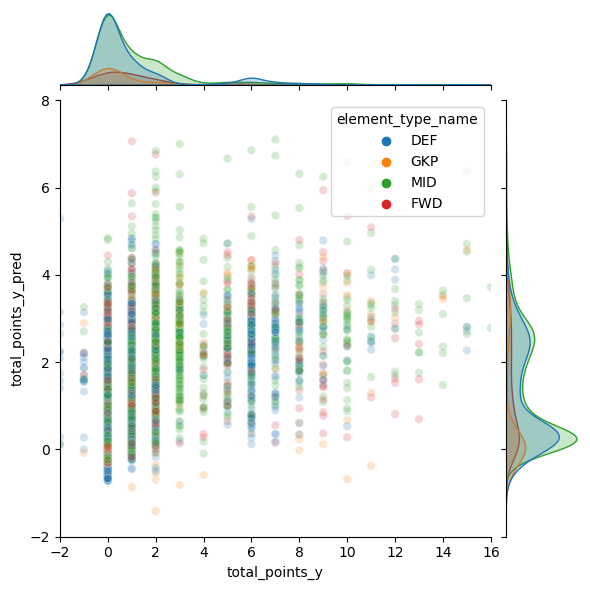

In [358]:
sns.jointplot(data=df_ml_curr_final, x='total_points_y', y='total_points_y_pred', hue='element_type_name', alpha=0.2, xlim=(-2,16), ylim=(-2,8))
plt.show()

In [359]:
# rank using window function to help filter in only best combination
df_ml_curr_final['round_rank_pred'] = df_ml_curr_final.groupby('round')['total_points_y_pred'].rank(method='first', ascending=False)
df_ml_curr_final['round_rank'] = df_ml_curr_final.groupby('round')['total_points_y'].rank(method='first', ascending=False)
# https://dfrieds.com/data-analysis/rank-method-python-pandas.html

In [360]:
df_ml_curr_final[df_ml_curr_final['round'] == 10].sort_values(by='round_rank').head(10)

,web_name,element,team_name,element_type_name,value,total_points_x,total_points_max_x,total_points_y,minutes,goals_scored,assists,bonus,bps,clean_sheets,penalties_saved,goals_conceded,saves,ict_index,influence,creativity,threat,fixture_difficulty_x,cards,selected,transfers_balance,fixture_difficulty_y,team_strength,round,was_home_1,total_points_y_pred,round_rank_pred,round_rank
3170,Cancelo,306,MCI,DEF,72,5.0,9,18,90.0,0,0,3,39,0.5,0,1.5,0,8.1,28.2,35.7,17.0,2.5,0,5429010.0,178949.5,2.0,5,10,1,4.730543,9.0,1.0
2877,Saka,13,ARS,MID,78,5.5,9,15,90.0,0,2,0,28,0.5,0,0.5,0,12.4,42.6,69.0,34.0,3.0,0,1222671.5,39307.5,4.0,4,10,1,4.528567,11.0,2.0
3238,Bruno Guimarães,374,NEW,MID,57,3.0,4,15,64.5,0,1,0,25,0.0,0,0.5,0,8.4,34.8,49.2,0.0,2.0,0,246620.0,-10429.5,2.0,3,10,1,2.643771,101.0,3.0
2883,Martinelli,19,ARS,MID,66,3.5,4,12,83.5,0,1,0,21,0.5,0,0.5,0,6.0,26.4,27.2,48.0,3.0,1,5006649.5,47254.5,4.0,4,10,1,4.360021,12.0,4.0
3006,Mount,142,CHE,MID,76,1.0,1,12,83.0,0,0,0,5,0.0,0,1.0,0,4.7,0.0,32.9,14.0,3.0,1,366167.0,7186.0,2.0,4,10,1,3.396228,30.0,5.0
3178,Foden,314,MCI,MID,80,13.5,19,11,72.5,3,0,2,64,0.5,0,0.5,0,9.6,36.2,6.9,86.0,2.5,0,810816.5,26025.5,2.0,5,10,1,4.961064,7.0,6.0
3402,Young,538,AVL,DEF,44,6.5,8,11,90.0,0,0,2,33,1.0,0,0.0,0,9.0,21.8,61.9,9.0,2.0,1,15433.5,805.5,2.0,3,10,0,3.037114,58.0,7.0
2934,Billing,70,BOU,MID,53,6.0,9,10,90.0,1,0,2,30,0.5,0,0.5,0,11.2,7.6,21.8,5.0,2.5,0,33138.5,19718.0,2.0,2,10,1,3.417996,28.0,8.0
3033,Eze,169,CRY,MID,55,2.0,2,10,73.0,0,0,0,10,0.0,0,1.0,0,1.9,1.0,2.5,15.0,3.0,0,223264.0,-8155.0,2.0,3,10,1,2.468755,118.0,9.0
3289,Lloris,425,TOT,GKP,55,2.5,3,10,90.0,0,0,0,22,0.0,0,2.5,6,3.7,37.0,0.0,0.0,3.0,0,539653.0,-16945.0,3.0,4,10,0,3.180123,45.0,10.0


#### Linear programming for each rounds (4 to 16) to select best 11 players teams <a name='pred_r_lp'/>
<a href=#top> Back to top <a>

In [361]:
comb = ([1,5,4,1],[1,5,3,2],[1,5,2,3],
    [1,4,5,1],[1,4,4,2],[1,4,3,3],
    [1,3,5,2],[1,3,4,3])
print('Number of 11 players combinations:',len(comb))

Number of 11 players combinations: 8


In [362]:
# Helper variables
POS = df_ml_curr_final['element_type_name'].unique()
CLUBS = df_ml_curr_final['team_name'].unique()
BUDGET = 820

lp_results_x = []

for r in df_ml_curr_final['round'].unique():
    df_r = df_ml_curr_final[df_ml_curr_final['round'] == r]

    for c in comb:
        print(r,c)
        # print(c)
        pos_available = {
            'GKP':c[0],
            'DEF':c[1],
            'MID':c[2],
            'FWD':c[3]
        }

        # Initilize Variables
        names = [df_r['web_name'][i] for i in df_r.index]
        teams = [df_r['team_name'][i] for i in df_r.index]
        positions = [df_r['element_type_name'][i] for i in df_r.index]
        prices = [df_r['value'][i] for i in df_r.index]
        points = [df_r['total_points_y_pred'][i] for i in df_r.index]
        players = [LpVariable("player_" + str(i), cat="Binary") for i in df_r.index]

        # Initialize the problem
        prob_x = LpProblem("FLP_Player_Choices", LpMaximize)

        # Define the objective
        prob_x += lpSum(players[i] * points[i] for i in range(len(df_r)))

        # Build the constraints
        prob_x += lpSum(players[i] * df_r['value'][df_r.index[i]] for i in range(len(df_r))) <= BUDGET # Budget Limit

        for pos in POS:
            prob_x += lpSum(players[i] for i in range(len(df_r)) if positions[i] == pos) <= pos_available[pos] # Position Limit

        for club in CLUBS:
            prob_x += lpSum(players[i] for i in range(len(df_r)) if teams[i] == club) <= 3 # Club Limit

        # Solve the problem
        prob_x.solve()

        total_cost_start = 0
        total_points_pred = 0
        total_points_actual = 0

        for v in prob_x.variables():
            if v.varValue != 0:
                name = df_r['web_name'][int(v.name.split("_")[1])]
                club = df_r['team_name'][int(v.name.split("_")[1])]
                position = df_r['element_type_name'][int(v.name.split("_")[1])]
                point_pred = df_r['total_points_y_pred'][int(v.name.split("_")[1])]
                point_actual = df_r['total_points_y'][int(v.name.split("_")[1])]
                price_start = df_r['value'][int(v.name.split("_")[1])]

                lp_results_x.append({
                    'round':r,
                    'combination':c,
                    'web_name':name,
                    'position':position,
                    'team_name':club,
                    'pts_pred':point_pred,
                    'pts_actual':point_actual,
                    'price':price_start
                })

                total_cost_start = total_cost_start + price_start
                total_points_pred = total_points_pred + point_pred
                total_points_actual = total_points_actual + point_actual

        # print('***')    
        print('total costs start: {:.2f} | total points pred: {:.2f} | total points actual: {:.2f}'.format(total_cost_start,total_points_pred,total_points_actual))
        # print('total points pred', total_points_pred)
        # print('total points actual', total_points_actual)
        print('***') 

# Convert results to DataFrame
df_results_curr_x = pd.DataFrame(lp_results_x)
df_results_curr_x.sort_values(by='position').head()

4 [1, 5, 4, 1]
total costs start: 820.00 | total points pred: 50.04 | total points actual: 48.00
***
4 [1, 5, 3, 2]
total costs start: 819.00 | total points pred: 49.85 | total points actual: 65.00
***
4 [1, 5, 2, 3]
total costs start: 819.00 | total points pred: 49.83 | total points actual: 57.00
***
4 [1, 4, 5, 1]
total costs start: 818.00 | total points pred: 49.74 | total points actual: 51.00
***
4 [1, 4, 4, 2]
total costs start: 820.00 | total points pred: 49.74 | total points actual: 72.00
***
4 [1, 4, 3, 3]
total costs start: 818.00 | total points pred: 49.65 | total points actual: 55.00
***
4 [1, 3, 5, 2]
total costs start: 820.00 | total points pred: 49.39 | total points actual: 66.00
***
4 [1, 3, 4, 3]
total costs start: 820.00 | total points pred: 49.28 | total points actual: 60.00
***
5 [1, 5, 4, 1]
total costs start: 818.00 | total points pred: 51.00 | total points actual: 42.00
***
5 [1, 5, 3, 2]
total costs start: 820.00 | total points pred: 50.63 | total points actual: 

,round,combination,web_name,position,team_name,pts_pred,pts_actual,price
527,10,"[1, 3, 4, 3]",Trippier,DEF,NEW,4.313854,7,54
323,8,"[1, 4, 3, 3]",Cancelo,DEF,MCI,4.787439,9,71
706,13,"[1, 5, 4, 1]",Saliba,DEF,ARS,3.360430,2,51
708,13,"[1, 5, 4, 1]",Van Dijk,DEF,LIV,3.935831,2,64
318,8,"[1, 4, 4, 2]",Coady,DEF,EVE,3.526807,5,49


In [363]:
df_results_curr_x['combination'] = df_results_curr_x[['combination']].astype(str)

In [364]:
df_results_curr_x.head(15)
# selected players

,round,combination,web_name,position,team_name,pts_pred,pts_actual,price
0,4,"[1, 5, 4, 1]",Saka,MID,ARS,4.392367,5,80
1,4,"[1, 5, 4, 1]",James,DEF,CHE,3.816052,7,61
2,4,"[1, 5, 4, 1]",Mendy,GKP,CHE,4.493592,3,50
3,4,"[1, 5, 4, 1]",Martinelli,MID,ARS,4.214343,2,63
4,4,"[1, 5, 4, 1]",Mitrović,FWD,FUL,3.792695,7,66
5,4,"[1, 5, 4, 1]",Salah,MID,LIV,7.000133,3,130
6,4,"[1, 5, 4, 1]",Alexander-Arnold,DEF,LIV,4.596735,17,75
7,4,"[1, 5, 4, 1]",Walker,DEF,MCI,3.524105,1,51
8,4,"[1, 5, 4, 1]",De Bruyne,MID,MCI,5.620218,2,121
9,4,"[1, 5, 4, 1]",Cancelo,DEF,MCI,4.843603,1,71


In [365]:
df_results_curr_x.groupby('combination')['pts_actual','pts_pred','price'].sum().sort_values(by='pts_pred',ascending=False)
# total points for each combination for reounds 4 to 16

C:\Users\glaurent\AppData\Local\Temp\ipykernel_17144\1770269010.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_results_curr_x.groupby('combination')['pts_actual','pts_pred','price'].sum().sort_values(by='pts_pred',ascending=False)


,pts_actual,pts_pred,price
combination,,,
"[1, 4, 5, 1]",585,606.095307,9783
"[1, 3, 5, 2]",581,604.306180,9809
"[1, 4, 4, 2]",620,603.762448,9761
"[1, 5, 4, 1]",574,602.953246,9723
"[1, 3, 4, 3]",590,598.991183,9818
"[1, 5, 3, 2]",614,598.979083,9737
"[1, 4, 3, 3]",615,596.877908,9763
"[1, 5, 2, 3]",601,590.208594,9729


In [366]:
df_results_curr_agg = df_results_curr_x.groupby(['combination','round'])['pts_actual','pts_pred','price'].sum().reset_index()
df_results_curr_agg['round_rank_pred'] = df_results_curr_agg.groupby('round')['pts_pred'].rank(method='first', ascending=False)
df_results_curr_agg[df_results_curr_agg['round_rank_pred'] == 1.0].sort_values(by='round')

C:\Users\glaurent\AppData\Local\Temp\ipykernel_17144\1537764055.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_results_curr_agg = df_results_curr_x.groupby(['combination','round'])['pts_actual','pts_pred','price'].sum().reset_index()


,combination,round,pts_actual,pts_pred,price,round_rank_pred
84,"[1, 5, 4, 1]",4,48,50.044354,820,1.0
85,"[1, 5, 4, 1]",5,42,50.995983,818,1.0
74,"[1, 5, 3, 2]",6,35,51.652668,819,1.0
15,"[1, 3, 5, 2]",8,69,48.412323,820,1.0
16,"[1, 3, 5, 2]",9,35,53.320993,809,1.0
53,"[1, 4, 5, 1]",10,60,52.735683,818,1.0
54,"[1, 4, 5, 1]",11,47,48.789962,820,1.0
19,"[1, 3, 5, 2]",12,58,46.570698,819,1.0
56,"[1, 4, 5, 1]",13,30,49.537200,819,1.0
93,"[1, 5, 4, 1]",14,72,51.976447,814,1.0


In [367]:
df_results_curr_x2 = pd.merge(left=df_results_curr_x, right=df_results_curr_agg[['combination','round','round_rank_pred']], how='left', left_on=['combination','round'], right_on=['combination','round'])
df_results_curr_x2.head()

,round,combination,web_name,position,team_name,pts_pred,pts_actual,price,round_rank_pred
0,4,"[1, 5, 4, 1]",Saka,MID,ARS,4.392367,5,80,1.0
1,4,"[1, 5, 4, 1]",James,DEF,CHE,3.816052,7,61,1.0
2,4,"[1, 5, 4, 1]",Mendy,GKP,CHE,4.493592,3,50,1.0
3,4,"[1, 5, 4, 1]",Martinelli,MID,ARS,4.214343,2,63,1.0
4,4,"[1, 5, 4, 1]",Mitrović,FWD,FUL,3.792695,7,66,1.0


In [368]:
df_results_curr_x2[(df_results_curr_x2['round'] == 16) & (df_results_curr_x2['round_rank_pred'] == 1.0)]

,round,combination,web_name,position,team_name,pts_pred,pts_actual,price,round_rank_pred
968,16,"[1, 5, 4, 1]",Martinelli,MID,ARS,4.888012,6,68,1.0
969,16,"[1, 5, 4, 1]",Van Dijk,DEF,LIV,4.193670,2,65,1.0
970,16,"[1, 5, 4, 1]",Salah,MID,LIV,5.925615,2,128,1.0
971,16,"[1, 5, 4, 1]",Alexander-Arnold,DEF,LIV,4.583408,2,72,1.0
972,16,"[1, 5, 4, 1]",De Bruyne,MID,MCI,6.842682,2,125,1.0
973,16,"[1, 5, 4, 1]",Cancelo,DEF,MCI,4.688449,1,74,1.0
974,16,"[1, 5, 4, 1]",Wilson,FWD,NEW,4.386864,1,75,1.0
975,16,"[1, 5, 4, 1]",Trippier,DEF,NEW,4.113173,7,59,1.0
976,16,"[1, 5, 4, 1]",Almirón,MID,NEW,4.214809,6,57,1.0
977,16,"[1, 5, 4, 1]",Henderson,GKP,NFO,4.138619,6,47,1.0


In [369]:
df_results_curr_final = df_results_curr_x2[df_results_curr_x2['round_rank_pred'] == 1.0]
df_results_curr_final.shape

(132, 9)

In [370]:
df_results_curr_final['round'].value_counts()
# cross check number of players is correct

4     11
5     11
6     11
8     11
9     11
10    11
11    11
12    11
13    11
14    11
15    11
16    11
Name: round, dtype: int64

In [371]:
df_results_curr_final.head()

,round,combination,web_name,position,team_name,pts_pred,pts_actual,price,round_rank_pred
0,4,"[1, 5, 4, 1]",Saka,MID,ARS,4.392367,5,80,1.0
1,4,"[1, 5, 4, 1]",James,DEF,CHE,3.816052,7,61,1.0
2,4,"[1, 5, 4, 1]",Mendy,GKP,CHE,4.493592,3,50,1.0
3,4,"[1, 5, 4, 1]",Martinelli,MID,ARS,4.214343,2,63,1.0
4,4,"[1, 5, 4, 1]",Mitrović,FWD,FUL,3.792695,7,66,1.0


#### Add players points for rounds 1 to 3 based on previous season selection

In [372]:
# team for first 3 rounds
df_results_x[df_results_x['combination'] == '[1, 5, 2, 3]'].sort_values(by='pts_current_season', ascending=False)

,combination,web_name,position,team_name,pts_last_season,pts_current_season,price
28,"[1, 5, 2, 3]",Kane,FWD,TOT,192,102,115
32,"[1, 5, 2, 3]",Toney,FWD,BRE,139,83,70
22,"[1, 5, 2, 3]",Gabriel,DEF,ARS,146,72,50
26,"[1, 5, 2, 3]",Cancelo,DEF,MCI,201,70,70
23,"[1, 5, 2, 3]",Alisson,GKP,LIV,176,65,55
29,"[1, 5, 2, 3]",Son,MID,TOT,258,53,120
31,"[1, 5, 2, 3]",Bowen,MID,WHU,206,47,85
24,"[1, 5, 2, 3]",Robertson,DEF,LIV,186,43,70
25,"[1, 5, 2, 3]",Alexander-Arnold,DEF,LIV,208,40,75
30,"[1, 5, 2, 3]",Dennis,FWD,NFO,134,19,60


In [373]:
df_players_hist_curr.head()

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,value,transfers_balance,selected,transfers_in,transfers_out,cards,total_points_max,element_type_name,team_name,web_name,team_strength,fixture_difficulty
0,1,1,7,0,False,2022-08-05T19:00:00Z,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0.00000,0.00000,45,0,23970,0,0,0,0,DEF,ARS,Cédric,4,3.0
1,1,11,10,0,True,2022-08-13T14:00:00Z,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0.00000,0.00000,44,-5169,24193,1361,6530,0,0,DEF,ARS,Cédric,4,2.0
2,1,21,3,0,False,2022-08-20T16:30:00Z,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0.00000,0.00000,44,-4337,20960,879,5216,0,0,DEF,ARS,Cédric,4,2.0
3,1,31,9,0,True,2022-08-27T16:30:00Z,2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0.00000,0.00000,43,-2988,18825,577,3565,0,0,DEF,ARS,Cédric,4,2.0
4,1,41,2,0,True,2022-08-31T18:30:00Z,2,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0.00000,0.00000,43,-1611,17790,405,2016,0,0,DEF,ARS,Cédric,4,2.0


In [374]:
final_results = []
for w in df_results_x[df_results_x['combination'] == '[1, 5, 2, 3]'].sort_values(by='pts_current_season', ascending=False)['web_name'].unique():
    print(w)
    for r in [1,2,3]:
        df_f = df_players_hist_curr[(df_players_hist_curr['web_name'] == w) & (df_players_hist_curr['round'] == r)]
        
        final_results.append({
            'round':r,
            'combination':'[1, 5, 2, 3]',
            'web_name':w,
            'position': df_f['element_type_name'].sum(),
            'team_name': df_f['team_name'].sum(),
            'pts_pred':0,
            'pts_actual':df_f['total_points'].sum(),
            'price':df_f['value'].sum(),
            'round_rank_pred':1.0
        })
        
# Convert results to DataFrame
df_results_final = pd.DataFrame(final_results)
df_results_final.head()

Kane
Toney
Gabriel
Cancelo
Alisson
Son
Bowen
Robertson
Alexander-Arnold
Dennis
Cash


,round,combination,web_name,position,team_name,pts_pred,pts_actual,price,round_rank_pred
0,1,"[1, 5, 2, 3]",Kane,FWD,TOT,0,2,115,1.0
1,2,"[1, 5, 2, 3]",Kane,FWD,TOT,0,8,114,1.0
2,3,"[1, 5, 2, 3]",Kane,FWD,TOT,0,6,114,1.0
3,1,"[1, 5, 2, 3]",Toney,FWD,BRE,0,8,70,1.0
4,2,"[1, 5, 2, 3]",Toney,FWD,BRE,0,9,70,1.0


In [375]:
df_pred_final = pd.concat([df_results_final, df_results_curr_final]).sort_values(by=['round','pts_actual'], ascending=[True,False])
df_pred_final.head()

,round,combination,web_name,position,team_name,pts_pred,pts_actual,price,round_rank_pred
3,1,"[1, 5, 2, 3]",Toney,FWD,BRE,0.0,8,70,1.0
6,1,"[1, 5, 2, 3]",Gabriel,DEF,ARS,0.0,7,50,1.0
9,1,"[1, 5, 2, 3]",Cancelo,DEF,MCI,0.0,7,70,1.0
15,1,"[1, 5, 2, 3]",Son,MID,TOT,0.0,5,120,1.0
0,1,"[1, 5, 2, 3]",Kane,FWD,TOT,0.0,2,115,1.0


#### FINAL RESULTS <a name='pred_final'/>
<a href=#top> Back to top <a>

In [376]:
df_pred_final['pts_actual'].sum()
# points for rounds 1 to 16 - much worst than exepcted - underperforming current team

692

In [377]:
df_pred_final[['round','combination','web_name','position','team_name']].nunique()
# many different players selected which will mean more costs of transfers (potentially covered by captain pts not considered above)

round          15
combination     5
web_name       63
position        5
team_name      20
dtype: int64

In [378]:
df_ml_curr_final.shape

(7337, 32)

In [379]:
df_pred_final[df_pred_final['round'] > 3].sort_values(by='pts_pred').head()
# lowest points predicted in team

,round,combination,web_name,position,team_name,pts_pred,pts_actual,price,round_rank_pred
747,13,"[1, 4, 5, 1]",Kehrer,DEF,WHU,3.174792,6,45,1.0
571,11,"[1, 4, 5, 1]",Kehrer,DEF,WHU,3.225494,3,45,1.0
339,8,"[1, 3, 5, 2]",Dier,DEF,TOT,3.300952,7,50,1.0
478,10,"[1, 4, 5, 1]",Daka,FWD,LEI,3.310948,6,57,1.0
740,13,"[1, 4, 5, 1]",Solanke,FWD,BOU,3.345709,1,58,1.0


In [380]:
df_pred_final[df_pred_final['round'] > 3].sort_values(by='pts_pred', ascending=False).head()
# highest points predicted in team

,round,combination,web_name,position,team_name,pts_pred,pts_actual,price,round_rank_pred
950,15,"[1, 3, 5, 2]",De Bruyne,MID,MCI,7.102612,7,124,1.0
188,6,"[1, 5, 3, 2]",Firmino,FWD,LIV,7.056988,1,80,1.0
5,4,"[1, 5, 4, 1]",Salah,MID,LIV,7.000133,3,130,1.0
480,10,"[1, 4, 5, 1]",De Bruyne,MID,MCI,6.855174,6,123,1.0
972,16,"[1, 5, 4, 1]",De Bruyne,MID,MCI,6.842682,2,125,1.0


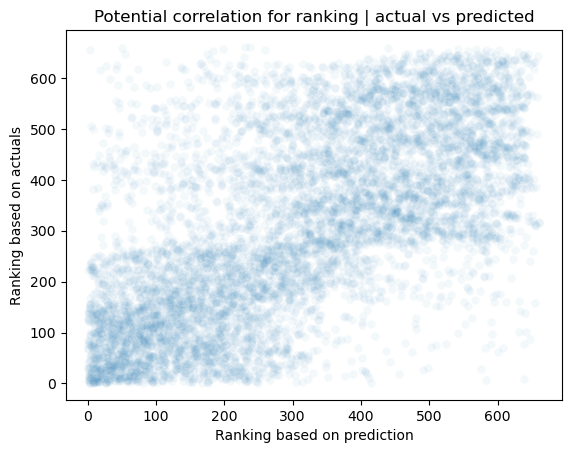

In [381]:
sns.scatterplot(data=df_ml_curr_final, x='round_rank_pred', y='round_rank', alpha=0.05)
plt.title('Potential correlation for ranking | actual vs predicted')
plt.xlabel('Ranking based on prediction')
plt.ylabel('Ranking based on actuals')
plt.show()

***
***
## 6) Annex <a name='annex'/>
<a href=#top> Back to top <a>
* FPL Rankings
* Notes
* Dictionnary
* Ressources

### FPL Rankings
##### Season 21/22
(1) Jamie Pigott - 2844
<br>(2) Suvanish Singh - 2832
<br>(3) Brett Taylor - 2830
<br>(5) Damien Ruigrok - 2815
<br>(2'881'751) Grégoire Laurent - 1990 *(no transfers or team changes since GW1)*
<br> https://www.fantasyfootballscout.co.uk/2022/05/22/jamie-pigott-crowned-2021-22-fpl-champion/

##### Season 22/23 (as of round 16)
(1) Sanad 23{LY}🇱🇾• - 1089
<br>(2) Peter Lougheed - 1083
<br>(3) Yaqoob 17 🇦🇪 - 1075
<br>(4) Петър Матански - 1063
<br>(5) Wael Badawi - 1059
<br>(3'430'874) Grégoire Laurent - 824 *(no transfers or team changes since GW1)*


### Notes
##### General
* Used General information in 'bootstrap-static' for data exploration 
* Used Fixtures, Teams and other datasets to enhance Players dataset
* Used Players historical dataset to build model
##### Improvement opportunities
* Improve feature engineering and deal better with low cardinality features
* Consider removing outliers
* Consider othter method for selection of only subset of features
* Augment data with external data (e.g.: Twitter comments)
* Think of how to better predict more extreme performance
* Do more Grid Search to tune hyper parameters, as well as fantasy parameters (# gameweeks ton consider, max vs. mean, ...)
* Shall learn to rank players score instead of predict exact score. Maybe yes but then optimization fonction wouldn't work, or would need to minimize Rank and assume there is no important difference in term of delta between ranks. Would probably also need to define a composition ahead.
##### Main Features
* Predict weekly score of players:
    * Players:
        * points (target)
        * position (GK,DF,MD,FW)
        * ict_index (influence, creativity, thread)
        * minutes
        * goals_scored
        * bonus (incl. bps)
        * assists
        * cards (yellow or red)
        * goals_conceded
        * clean_sheets
        * saves (and penalties_saved)
    * Fixture:
        * Difficulty
        * Teams strength
        * Home/Away


### Dictionary
* **bps** = Bonus Point System: used to devised and allocate Bonus points post-match
* **ict_index** = Influence, Creativity and Thread index. All threebelow scores are combined to create an overall ICT Index score (https://www.premierleague.com/news/65567)
    * Influence: evaluates the degree to which a player has made an impact on a single match or throughout the season.
    * Creativity: assesses player performance in terms of producing goalscoring opportunities for others. It can be used as a guide to identify the players most likely to supply assists.
    * Threat: is a value that examines a player's threat on goal. It gauges the individuals most likely to score goals.
* **FDR** = Fixture Difficulty Rating: a set of formulas process key Opta data variables, along with each team's home and away form for the past six matches, to generate a rank for the perceived difficulty of each Gameweek opponent (https://fantasy.premierleague.com/fixtures/fdr)
* **ep_next** & **ep_this** = estimated points: FPL prediction of points for this and next gameweek
* **value** = points / now_cost
    * value_season = total_points_season / now_cost
    * value_form = form / now_cost
* **form** a player’s average score per match, calculated from all matches played by his club in the last 30 days.

### Ressources

https://medium.com/@frenzelts/fantasy-premier-league-api-endpoints-a-detailed-guide-acbd5598eb19
<br> https://allaboutfpl.com/2021/07/fpl-price-changes-explained-fpl-guide/
<br>**Linear programming**
<br> https://medium.com/@jooramos_37651/playing-fantasy-premier-league-with-linear-programming-and-genetic-algorithms-92ce4bb5b3
<br> https://towardsdatascience.com/how-to-build-a-fantasy-premier-league-team-with-data-science-f01283281236
<br> https://stephen-young.me.uk/2020/04/25/fantasy-premier-league-model-statsbomb-data-and-linear-programming.html
<br> https://gavinflood.com/writing/using-linear-programming-to-get-better-at-fantasy-premier-league
<br> https://medium.com/@joseph.m.oconnor.88/linearly-optimising-fantasy-premier-league-teams-3b76e9694877
<br> Other football projects
<br> https://andrewwoods1.github.io/